# Init

4


In [5]:
random

<module 'random' from '/home/dzack/gitclones/sage/local/var/lib/sage/venv-python3.11.1/lib/python3.11/random.py'>

# Lattices

In [7]:
L_18_2_0 = U_2 @ E8**2 # 19-dim
L_18_0_0 = U @ E8**2 # 22-dim
L_18_0_0

Lattice of degree 18 and rank 18 over Integer Ring
Decomposition: U ⊕ E8(-1)^2
Gram matrix:
[ 0  1| 0  0  0  0  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 1  0| 0  0  0  0  0  0  0  0| 0  0  0  0  0  0  0  0]
[-----+-----------------------+-----------------------]
[ 0  0|-2  0  1  0  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0 -2  0  1  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 1  0 -2  1  0  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  1  1 -2  1  0  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0  0  1 -2  1  0  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0  0  0  1 -2  1  0| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0  0  0  0  1 -2  1| 0  0  0  0  0  0  0  0]
[ 0  0| 0  0  0  0  0  0  1 -2| 0  0  0  0  0  0  0  0]
[-----+-----------------------+-----------------------]
[ 0  0| 0  0  0  0  0  0  0  0|-2  0  1  0  0  0  0  0]
[ 0  0| 0  0  0  0  0  0  0  0| 0 -2  0  1  0  0  0  0]
[ 0  0| 0  0  0  0  0  0  0  0| 1  0 -2  1  0  0  0  0]
[ 0  0| 0  0  0  0  0  0  0  0| 0  1  1 -2  1  0  0  0]
[ 0  0| 0  0

In [8]:
Z = IntegralLattice( Matrix(ZZ, [1] ) )
Z2 = Z.twist(2)

H = IntegralLattice("H")
U = H

H_2 = H.twist(2)
U_2 = H_2

A1 = IntegralLattice("A1").twist(-1)
A2 = IntegralLattice("A2").twist(-1)
A3 = IntegralLattice("A3").twist(-1)
A4 = IntegralLattice("A4").twist(-1)
A5 = IntegralLattice("A5").twist(-1)
A6 = IntegralLattice("A6").twist(-1)


D4 = IntegralLattice("D4").twist(-1)
D5 = IntegralLattice("D5").twist(-1)
D6 = IntegralLattice("D6").twist(-1)
D7 = IntegralLattice("D7").twist(-1)
D8 = IntegralLattice("D8").twist(-1)
D16 = IntegralLattice("D16").twist(-1)
D17 = IntegralLattice("D17").twist(-1)
D19 = IntegralLattice("D19").twist(-1)


E6 = IntegralLattice("E6").twist(-1)
E7 = IntegralLattice("E7").twist(-1)
E8 = IntegralLattice("E8").twist(-1)

E8_2 = E8.twist(2)

E10 = E8.direct_sum(U)
E10_2 = E10.twist(2)

A1_7 = A1.direct_sum(A1).direct_sum(A1).direct_sum(A1).direct_sum(A1).direct_sum(A1).direct_sum(A1)
A1_8 = A1.direct_sum(A1).direct_sum(A1).direct_sum(A1).direct_sum(A1).direct_sum(A1).direct_sum(A1).direct_sum(A1)

def Ipq(p, q):
    return reduce(lambda a, b: a.direct_sum(b),
        ([Z] * p) 
        + ([Z.twist(-1)] * q)
    )

In [6]:
#old_lattice_repr = 
from sage.modules.free_quadratic_module_integer_symmetric import FreeQuadraticModule_integer_symmetric, FreeQuadraticModule_submodule_with_basis_pid    

old_lattice_repr = getattr( 
    sage.modules.free_quadratic_module_integer_symmetric.FreeQuadraticModule_integer_symmetric,
    "__repr__"
)
old_lattice_repr

<method '__repr__' of 'sage.structure.sage_object.SageObject' objects>

In [7]:
from sage.modules.free_quadratic_module_integer_symmetric import FreeQuadraticModule_integer_symmetric, FreeQuadraticModule_submodule_with_basis_pid    
from sage.modules.torsion_quadratic_module import TorsionQuadraticModule

common_files = "/home/dzack/Dropbox/Projects/polyhedral_common/CI_tests/common.g"

def getOrbitRepresentatives(L, Xnorm, debug=False):
    eProg = "INDEF_FORM_GetOrbitRepresentative"
    eGram =  L.gram_matrix() #U_2.gram_matrix()
    gap.eval(f'eProg:="{eProg}"')
    gap.eval(f'Read("{common_files}");')
    FileM = gap.eval('FileM:=Filename(DirectoryTemporary(), "Mat.in");')
    gap.eval('FileOut:=Filename(DirectoryTemporary(), "Test.out");');
    gap.function_call('WriteMatrixFile', [FileM, eGram] )
    if debug: print(gap('FileM'))
    if debug: print(gap('FileOut'))
    gap.eval(f'TheCommand:=Concatenation(eProg, " gmp ", FileM, " ", String({Xnorm}), " GAP ", FileOut)')
    if debug: print(gap('TheCommand'))
    gap.eval('Exec(TheCommand)')
    gap_orbs = gap('ReadAsFunction(FileOut)();')
    orbs = [ vector(ZZ, list(x)) for x in list(gap_orbs)]
    isotrops = [ (v, L.q(v)) for v in orbs]
    return isotrops

setattr(
    sage.modules.free_quadratic_module_integer_symmetric.FreeQuadraticModule_integer_symmetric,
    "getOrbitRepresentatives",
    lambda self, Xnorm: getOrbitRepresentatives(self, Xnorm, debug=False)
)

def vinberg_algorithm(self):
    A = VinAl(self.gram_matrix(), output=None)
    A.FindRoots()
    return A.roots

setattr(
    sage.modules.free_quadratic_module_integer_symmetric.FreeQuadraticModule_integer_symmetric,
    "vinberg_algorithm",
    lambda self: vinberg_algorithm(self)
)

U = IntegralLattice('U')

In [8]:
from sage.modules.lattices_common import *

In [ ]:

L = U @ U_2
show( INDEF_FORM_AutomorphismGroup(L) )

In [ ]:
U = IntegralLattice("U")

L1 = U_2**2
L2 = U @ U_2
rand_M = random_matrix(ZZ,L1.rank(),L1.rank(), algorithm = 'unimodular')
rand_sym_M = rand_M + rand_M.T

show( INDEF_FORM_TestEquivalence(L1, L2) )
#show( INDEF_FORM_TestEquivalence(L1, IntegralLattice( rand_sym_M * L1.gram_matrix() * rand_sym_M)) )

In [ ]:
U = IntegralLattice('U')

L = U @ E8
show( INDEF_FORM_GetOrbitRepresentative(L, 0) )

In [ ]:
L = U @ U @ E7
show( INDEF_FORM_GetOrbit_IsotropicKplane(L, 2) )
#show( GetNrOrbitIsotropic(L, 2) )

In [ ]:
show( INDEF_FORM_GetOrbit_IsotropicKplane(U @ E8_2, 1) )

In [ ]:
show( INDEF_FORM_GetOrbitRepresentative(U @ E8, 0) )

In [ ]:
show( INDEF_FORM_GetOrbit_IsotropicKplane(U_2 @ E8_2, 1) )


In [ ]:
L1 = E10
A = Matrix([
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -2, 0, 0, 0, 0, 0, -1, 0],
    [0, 0, 0, -2, 1, 0, 1, -1, 0, -1],
    [0, 0, 0, 1, -2, -1, 0, 0, 0, 1],
    [0, 0, 0, 0, -1, -2, 0, 0, -1, 1],
    [0, 0, 0, 1, 0, 0, -2, 1, -1, 1],
    [0, 0, 0, -1, 0, 0, 1, -2, 0, 0],
    [0, 0, -1, 0, 0, -1, -1, 0, -2, 1],
    [0, 0, 0, -1, 1, 1, 1, 0, 1, -2]
])
L = IntegralLattice(A)
out2 = LORENTZ_FundDomain_AllcockEdgewalk(L)
out2

In [ ]:
display( out2["simple_roots"] )
display( lmap(lambda x: x[0], out2["vertices"]) )

L.sub_gram_matrix(lmap(lambda x: x[0], out2["simple_roots"]))

In [ ]:
M = TEn.sublattices["Sterk_1"].twist(-1).gram_matrix()
rs = Vinberg_Julia(M)
rs

In [ ]:
#[arith] [QFile] [PlaneFile] [choice]

from sage.modules.lattices_common import *

L.<e,f,ep,fp> = U @ U_2 @ E8
out = INDEF_FORM_StabilizerIsotropicPlane(L, [e, ep] )
out

In [ ]:
# INDEF_FORM_InvariantIsotropicPlane [arith] [QFile] [PlaneFile] [choice] [OutFormat] [OutFile]
# INDEF_FORM_TestEquivalenceVector [arith] [FileM] [FileV1] [FileV2] [OutFormat] [OutFile]
# INDEF_ApproximateOrbitRepresentative [arith] [MatFile] [X] [OutFormat] [OutFile]
# ? GRP_RuntimeOrbitSplitting after GRP_LinearSpace_Stabilizer_DoubleCoset?
# ? LATT_FindIsotropic (eProg, " rational ", FileIn, " GAP ", FileOut);
# TestCase_LinearSpace_Stabilizer_DoubleCoset in ProcessExamples?
# INDEF_FORM_StabilizerVector

In [ ]:
from sage.modules.lattices_common import *

L.<e,f,ep,fp,a1,...,a8> = U @ U_2 @ E8_2
show( INDEF_FORM_TestEquivalenceVector(L, e, f)[0] )
show( INDEF_FORM_TestEquivalenceVector(L, ep, f)[0] )

show( INDEF_FORM_TestEquivalenceVector(L, e, fp)[0] )
show( INDEF_FORM_TestEquivalenceVector(L, ep, fp)[0] )


In [ ]:
# INDEF_FORM_StabilizerVector

from sage.modules.lattices_common import *

L.<e,f,ep,fp,a1,...,a8> = U @ U_2 @ E8_2
out = INDEF_FORM_TestStabilizerVector(L, e)
out

In [ ]:

L = Z.twist(-2) @ U**2 @ E8**2

#show(L.gram_matrix())

#show( INDEF_FORM_GetOrbitRepresentative(L, 0) )
show( INDEF_FORM_GetOrbit_IsotropicKplane(L, 1) )
show( INDEF_FORM_GetOrbit_IsotropicKplane(L, 2) )

In [ ]:
show( INDEF_FORM_GetOrbit_IsotropicKplane(L, 2) )

In [ ]:
from sage.modules.lattices_common import *

L.<e,f,ep,fp,a1,...,a8> = U @ U_2 @ E8_2

Lat = L
vec = e

eGram = Lat.gram_matrix()
vec = libgap(vec)
eProg = "INDEF_FORM_TestStabilizerVector"
FileM = gap.eval('FileM:=Filename(DirectoryTemporary(), "Mat.in");')
FileV = gap.eval('FileM:=Filename(DirectoryTemporary(), "Vec.in");')
FileOut = gap.eval('FileOut:=Filename(DirectoryTemporary(), "Test.out");');
eGram
str( gap( FileM) )
gap.function_call('WriteMatrixFile', [FileM, eGram] )
# gap.function_call('WriteVector', [FileV, vec] )
# cmds = [eProg, "gmp", str(gap(FileM)), str(gap(FileV)), "GAP", str( gap(FileOut)) ]
# f = open("logs.txt", "w")
# subprocess.run(cmds, stdout = f, stderr = f)
# print( ' '.join(cmds) )
# U = ReadAsFunction2("/tmp/gaptempdirMLZmTi/Test.out")
# #U = gap('ReadAsFunction(FileOut)();')
# stab_v_subgroup = GL(Lat.rank(), ZZ).subgroup(U)

In [ ]:
#outs = ReadAsFunction2("/tmp/gaptempdirMLZmTi/Test.out")
[x.T for x in outs ]

In [ ]:
GL(12, ZZ).subgroup(outs)

In [ ]:
L.<e,f, ep, fp> = U @ U
G = L.gram_matrix()
v = vector(SR, e+f)
O = L.orthogonal_group()
gens = [matrix(g) for g in O.gens()]
var([f'x{i}' for i in range(len(gens))])
xs = [eval(f'x{i}') for i in range(len(gens))]
varmat = sum( [xs[i] * gens[i] for i in range(len(gens)) ] )
eqs1 = list(varmat * v - v)
eqs2 = (varmat * G * varmat.T - G).coefficients()
#show(eqs1 + eqs2)

solns = solve(eqs1 + eqs2, xs, solution_dict=True)

#subgp_gens = [ varmat.subs(si) for si in solns ]
# H = O.subgroup(subgp_gens)
# all( [h * v == v for h in H] )

In [ ]:
vms = [ (x, varmat.subs(x)) for x in solns ]
real_vms = [v for v in vms if "I" not in map(str, v[1].coefficients()) and v[1] in GL(4, SR) ]
[r for r in real_vms]

In [ ]:
subgp_gens = []

for r in real_vms:
    SD = r[0]
    
    SD_r = {SD[x] : x  for x in SD.keys()}
    #SD_r
    
    solution_list = [SD[x] for x in SD.keys()]
    #solution_list
    
    subbed_solns = [ a.subs(SD_r) for a in solution_list ]
    #subbed_solns
    
    #vector(subbed_solns)
    vec_gens = [ vector( [s.coefficient(t) for s in subbed_solns] ) for t in xs ]

    ms = [matrix(ZZ, x) for x in [ sum( [ v[i] * gens[i] for i in range( len(v)) ] ) for v in vec_gens ]]
    [m.set_immutable() for m in ms]

    subgp_gens += ms
    subgp_gens = list(uniq(subgp_gens))

display(subgp_gens)

#H = O.subgroup(subgp_gens)
#H

In [ ]:
vec_gens = [ vector( [s.coefficient(t) for s in subbed_solns] ) for t in xs ]
vec_gens

In [ ]:
ms = [matrix(ZZ, x) for x in [ sum( [ v[i] * gens[i] for i in range( len(v)) ] ) for v in vec_gens ]]
[m.set_immutable() for m in ms]
#print( gens[0] )
ms

subgp_gens += ms
subgp_gens = list(uniq(subgp_gens))
subgp_gens

In [ ]:

mmm = sum( [xs[i] * gens[i] for i in range(len(gens))]) - subgp_gens[0]
for p in solve( mmm.coefficients(), xs):
    print(p)

In [ ]:

      sage: G = SymmetricGroup(3); G.rename('S3')
      sage: M = FreeModule(ZZ, [1,2,3], prefix='M'); M.rename('M')
      sage: action = lambda g, x: M.term(g(x))
      sage: I = M.invariant_module(G, action_on_basis=action); I
      (S3)-invariant submodule of M
      sage: I.basis()
      Finite family {0: B[0]}
      sage: [I.lift(b) for b in I.basis()]
      [M[1] + M[2] + M[3]]

gap.eval("""
A:=FullMatrixAlgebra(ZZ, 2)
M := [[1,1],[0,1]];
C:=FullMatrixAlgebraCentralizer(Rationals, [ M ]);
GeneratorsOfAlgebra(C);

vs:=[ [ 0, 0, 0, 0 ], [ 0, 0, 0, 1 ], [ 0, 0, 1, 0 ], [ 0, 0, 1, 1 ], [ 0, 1, 0, 0 ], [ 0, 1, 0, 1 ], [ 0, 1, 1, 0 ], [ 0, 1, 1, 1 ], [ 1, 0, 0, 0 ], [ 1, 0, 0, 1 ], [ 1, 0, 1, 0 ], [ 1, 0, 1, 1 ], [ 1, 1, 0, 0 ], [ 1, 1, 0, 1 ], [ 1, 1, 1, 0 ], [ 1, 1, 1, 1 ] ]
v1 = v[1]

Gs := ....
G := Group(G);
H:=Stabilizer(G, v1);
H;
OrbitsDomain(G, vs);


"""

In [ ]:
L.<e,f> = IntegralLattice("U")
#L.<e, f> = IntegralLattice('U')
#L.variable_names()
#?L.gens
#L._defining_names()
show( L.gens_dict() )
show( L._defining_names() )
show( L.variable_names() )
show( L.gens() )

In [ ]:
L.<e1, f1, e2, f2> = U @ U
Mee = get_Eichler_matrix(L, e2, e1)
Mee

In [ ]:
G = SL(2, ZZ)
H = GL(2, ZZ)
P = Hom(G, H)
gen1 = [g.gap() for g in G.gens()]
gen2 = [H(g).gap() for g in G.gens()]
phi = G.gap().GroupHomomorphismByImagesNC(H,gen1, gen2)
phi2 = P.element_class(P,phi)
phi2(G.gen(0))

In [ ]:
L = IntegralLattice('A5')
O_L = L.orthogonal_group()
O_L_bar = L.AL().orthogonal_group( O_L.gens() )
phi = O_L.hom( O_L_bar.gens() )
phi.kernel().order()


In [ ]:
#import subprocess

R.<x,y> = PolynomialRing(ZZ)

show( R.gens_dict() )
show( R._defining_names() )
show( R.variable_names() )
show( R.gens() )


#(U_2 @ U_2).getOrbitRepresentatives(0)

In [ ]:
m1 = E8.get_reflection_matrix(a1)
show(m1)
show(m1 * a1)
show(m1 * a2)
show(m1 * a3)
show(m1 * a4)

In [ ]:
m1 * U_2.gram_matrix() * m1.T == U_2.gram_matrix()

In [ ]:
Ten = U.direct_sum(U.twist(2)).direct_sum(E8.twist(2))
Tco = Z2.direct_sum(U.twist(2)).direct_sum(E8.twist(2))
TdP = U.direct_sum(U_2).direct_sum(E8).direct_sum(E8)
Lk3 = U.direct_sum(U).direct_sum(U).direct_sum(E8).direct_sum(E8)

In [ ]:
#test_set = [g for g in G][0:10]
from tempfile import NamedTemporaryFile
with NamedTemporaryFile(suffix=".sobj") as t:
    G.save(t.name)
    display(t.name)
G[0]

In [ ]:
S = Set([ Set([M(v) for M in O_Aen]) for v in isotrops])
for s in S:
    display(s)

In [ ]:
G = GO(4, GF(2), 1); 
display(G.cardinality())
display(O_Aen.cardinality())
# display(G.random_element())
# while true:
#     g = G.random_element()
#     if g in O_Aen:
#         display(g)
#         break
Set(O_Aen)[0] in G
Matrix(QQ, 4, [1,0,0,0, 0,1,0,0, 0,0,1,0, 0,0,0,1]) in O_Aen
g = O_Aen.random_element()
matrix(GF(2), 4, g.matrix()) in G
quad_Aen(g(a1)) == quad_Aen(a1)
g = G[1]
gp = g * vector(a1)
display(gp)
quad_Aen(vector(QQ, gp))
Ls = [g for g in G if quad_Aen(vector(QQ, g * vector(a1))) == quad_Aen(a1)]
len(Ls)

In [ ]:
G = SO(10, GF(2), 1); G

v1
a1
while True:
    g = G.random_element()
    v1 = vector(QQ, matrix(g) * vector(a1) )
    if quad_Aen(v1) == quad_Aen(a1):
        display(a1)
        display(v1)
        display(g)
        break


In [ ]:
TdP.signature_pair()
U_2.direct_sum(E8_2).signature_pair()
U_2.signature_pair()
#rad(Lk3)

In [ ]:
Sco = Z2.twist(-1).direct_sum(U.twist(2)).direct_sum(E8.twist(2))
ASco = Sco.discriminant_group()
len( ASco.gens() )
Sco.genus()

In [ ]:
e,f, ep, fp, a1, a2, a3, a4, a5, a6, a7, a8, b1, b2, b3, b4, b5, b6, b7, b8 = TdP.gens()
dot_dP = lambda x,y : x * TdP.gram_matrix() * y
nm_dP = lambda x: dot_dP(x, x)

def divisibility(v, L):
    dot_L = lambda x,y : x * L.gram_matrix() * y
    nm_L = lambda x: dot_L(x, x)
    dots = [ abs( dot_L(v, x) ) for x in L.gens() ]
    #print(dots)
    nonzero_dots = [abs(l) for l in dots if l != 0]
    return ( min(nonzero_dots), dots)

w = 2*e + 2*f + a1 + a2 + b1 + b2

dots = [ abs( dot_dP(w, x) ) for x in TdP.gens() ]
print(dots)
nonzero_dots = [l for l in dots if l != 0]
min(nonzero_dots)

divisibility(w, TdP)

In [ ]:
def rad(L):
    r = L.rank()

    D_L = L.discriminant_group()
    a = len( list( filter( lambda x: x == 2, list( D_L.invariants() ) ) ) )

    MQ = D_L.gram_matrix_quadratic()
    MQ_diag = [ MQ[z, z] for z in range(MQ.nrows()) ]
    diags_are_integers = list( map(lambda x: x.is_integer(), [ MQ[z, z] for z in range(MQ.nrows()) ] ) )
    if False in diags_are_integers:
        delta = 1
    else:
        delta = 0
    return (r,a, delta)

In [ ]:
# Sterk vectors
s1 = te
s2 = tep
s3 = tep + tfp + ta1
s4 = 2*tep + tfp + 2*ta1b
s5 = 2*te + 2*tf + 2*ta1b
[nm_en(x) for x in [s1, s2, s3, s4, s5] ]

In [ ]:
h, ep, fp, a1, a2, a3, a4, a5, a6, a7, a8 = Tco.basis()

dot_co = lambda x,y : x * Tco.gram_matrix() * y
nm_co = lambda x: dot_co(x, x)

coble_isotropics = [
    ep,
    fp,
    2*h + a1 + a2,
    ep + fp + a1, 
    # 2*e + f + 2*a1b,
    # e + 2*f + 2*a1b,
    2*h - fp - a1 - a6 - a7 - a8,
    8*ep + fp + a4 - 2*a5 - a8,
    2*h + ep - a1 - a2,
    2*h + ep - a2 - a3,
    2*h - a1 + a2 - a3,
    2*ep + fp - a1 - a8,
    5*ep + fp + a2 + 2*a3,
    2*h + a1 - a4,
    2*h + a2 - a5,
    2*h + a3 - a6,
    2*h + a4 - a7,
    2*h + a5 - a8,
    2*h - a6 - a8
]

display( [nm_co(x) for x in coble_isotropics ] )

display( [divisibility(x, Tco) for x in coble_isotropics] )

In [ ]:
Ten = U.direct_sum(U.twist(2)).direct_sum(E8.twist(2))
e, f, ep, fp, a1, a2, a3, a4, a5, a6, a7, a8 = Ten.basis()

dot_en = lambda x,y : x * Ten.gram_matrix() * y
nm_en = lambda x: dot_en(x, x)

enriques_isotropics = [
    ep,
    fp,
    2*(e+f) + a1 + a2,
    ep + fp + a1, 
    # 2*e + f + 2*a1b,
    # e + 2*f + 2*a1b,
    2*(e+f) - fp - a1 - a6 - a7 - a8,
    8*ep + fp + a4 - 2*a5 - a8,
    2*(e+f) + ep - a1 - a2,
    2*(e+f) + ep - a2 - a3,
    2*(e+f) - a1 + a2 - a3,
    2*ep + fp - a1 - a8,
    5*ep + fp + a2 + 2*a3,
    2*(e+f) + a1 - a4,
    2*(e+f) + a2 - a5,
    2*(e+f) + a3 - a6,
    2*(e+f) + a4 - a7,
    2*(e+f) + a5 - a8,
    2*(e+f) - a6 - a8
]

display( [nm_en(x) for x in enriques_isotropics ] )

display( [divisibility(x, Ten) for x in enriques_isotropics] )

In [ ]:
e, f, ep, fp, a1, a2, a3, a4, a5, a6, a7, a8, b1, b2, b3, b4, b5, b6, b7, b8 = TdP.gens()
dot_dP = lambda x,y : x * TdP.gram_matrix() * y
nm_dP = lambda x: dot_dP(x, x)

dp_isotropics = [
    ep,
    fp,
    2*(e+f) + (a1+b1) + (a2+b2),
    ep + fp + (a1+b1), 
    # 2*e + f + 2*a1b,
    # e + 2*f + 2*a1b,
    2*(e+f) - fp - (a1+b1) - (a6+b6) - (a7+b7) - (a8+b8),
    8*ep + fp + (a4+b4) - 2*(a5+b5) - (a8+b8),
    2*(e+f) + ep - (a1+b1) - (a2+b2),
    2*(e+f) + ep - (a2+b2) - (a3+b3),
    2*(e+f) - (a1+b1) + (a2+b2) - (a3+b3),
    2*ep + fp - (a1+b1) - (a8+b8),
    5*ep + fp + (a2+b2) + 2*(a3+b3),
    2*(e+f) + (a1+b1) - (a4+b4),
    2*(e+f) + (a2+b2) - (a5+b5),
    2*(e+f) + (a3+b3) - (a6+b6),
    2*(e+f) + (a4+b4) - (a7+b7),
    2*(e+f) + (a5+b5) - (a8+b8),
    2*(e+f) - (a6+b6) - (a8+b8)
]

display( [nm_dP(x) for x in dp_isotropics ] )

display( [divisibility(x, TdP) for x in dp_isotropics] )

In [ ]:
i = 0
isotrops = []
for i in range(10000):
    v = Tco.random_element()
    nm = nm_co(v)
    if nm == 0 and len([x for x in v if x==0]) > 7:
        isotrops.append(v)
isotrops

In [ ]:
# U \leq V is a subspace
# A has columns that span U, and B has columns that span V
# Row-reduce the augmented matrix [A | B], locate pivots
# The pivots among the a_i span U
# The pivots among the b_i span V/U
A = Matrix(ZZ, 1, [e]).T
B = Matrix(ZZ, 2, [e,f]).T
MAug = A.augment(B)
display( A, "---------")
display( B, "---------" )
display( MAug, "----------" )
display( MAug.rref(), "-------------" )
display( MAug.pivots() )
# Pivot 0 => U = <e>
# Pivot 2 => V/U = <f>... this only computes the complement in the standard lattice Z^n

In [ ]:
Sterk2Vectors = [
    vector([-1, 2]),
    vector([0, 1]),
    vector([-1, 4]),
    vector([-1, 3]),
    vector([-2, 5]),
    vector([-1, 2]),
    vector([-2, 3]),
    vector([-1, 1]),
    vector([-2, 1]),
    vector([-1, 0]),
    vector([-2,-1]),
    vector([-1, -1]),
    vector([-2, -3]),
    vector([-1, -2]),
    vector([-2, -5]),
    vector([-1, -3]),
    vector([-1, -4]),
    vector([0, -1]),
    vector([1, 2]),
]

In [ ]:
len(Sterk2Vectors)

In [ ]:
l = [0, 1, 0,0,0,0,0,0,0, 2, 0,0,0,0,0,0,0, 1, 0]

In [ ]:
N = lambda x1,y1,x2: Matrix(ZZ, 2, [x1, x2, -x2, 2*y1])
qN = lambda m: 2*m.det()
bN = lambda m,n: 1/2 * (qM(m+n) - qM(m) - qM(n))
e = M(1,0,0,0)
f = M(0,1,0,0)
ep = M(0,0,1,0)
fp = M(0,0,0,1)
[qM(e), qM(f), qM(ep), qM(fp)]

# IAS Examples

(23, 0) and (20, 3).


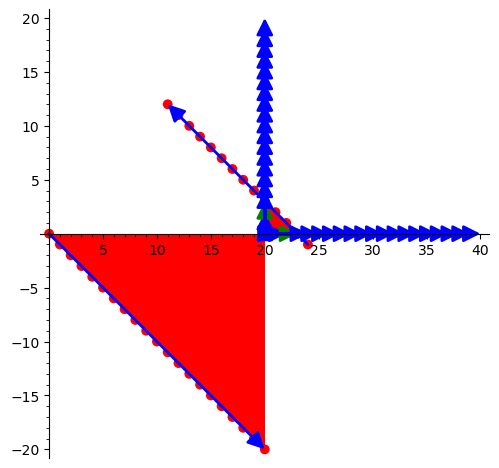

In [27]:
num_start_points

1

l1   l2   l3   l4   l5   l6   l7   l8   l9   l10   l11   l12   l13   l14   l15   l16   l17   l18   l19
  4    1    2    1    0    1    0    0    2    1     2     0     0     1     0     1     2     1     4

Aut(P) = C2, order 2 with 1 generators:


[-1  0]
[ 0  1]

a0   a1   a2   a3   a4   a5   a6   a7   a8   a9
  2    1    1    1    0    1    0    0    1    1

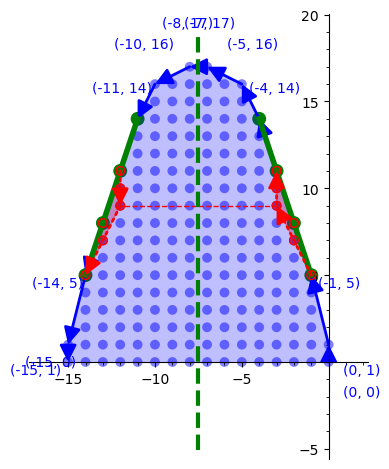

l0   l1   l2   l3   l4   l5   l6   l7   l8   l9   l10   l11   l12   l13   l14   l15   l16   l17   l18   l19
  2    2    2    2    2    2    2    4    2    4    2     2     2     2     2     2     24    6     30    6

Aut(P) = C2, order 2 with 1 generators:


[0 1]
[1 0]

(23, 0) and (12, 11).


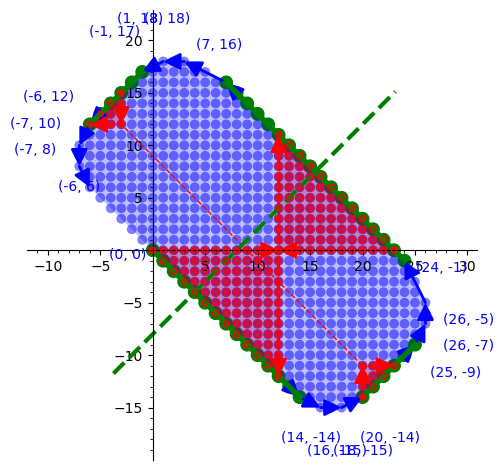

In [32]:
# 18_2_0
L_20_2_0 = U.direct_sum(U_2).direct_sum(E8).direct_sum(E8)

e,f ,ep,fp, a1,a2,a3,a4,a5,a6,a7,a8, a1t,a2t,a3t,a4t,a5t,a6t,a7t,a8t = L_20_2_0.gens()
eb,fb, epb,fpb, w1,w2,w3,w4,w5,w6,w7,w8, w1t,w2t,w3t,w4t,w5t,w6t,w7t,w8t = ((L_20_2_0.gram_matrix()).inverse()).columns()

v1 = a8t
v2 = ep + fp + w1 + w8t
v3 = a1 
v4 = a3
v5 = a4
v6 = a5
v7 = a6
v8 = a7
v9 = a8
v10 = ep + fp + w8 + w1t
v11 = a1t
v12 = a3t
v13 = a4t
v14 = a5t
v15 = a6t
v16 = a7t

v17 = ep + w8t
v18 = a2
v19 = ep + w8
v20 = a2t

v21 = fp - ep
v22 = 5 ep + 3 fp + 2 w2 + 2 w2t


G_18_2_0 = L_20_2_0.sub_gram_matrix([
    v1, v2, v3, v4, v5, v6, v7, v8, 
    v9, v10, v11, v12, v13, v14, v15, v16, 
    v17, v18, v19, v20, v21, v22
])

#show( G_18_2_0 )
V = [v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22]

M = L_20_2_0.ambient_module().base_extend(QQ)
r1, r2, r3, r4 = M.linear_dependence([
    v1, v2, v3, v4, v5, v6, v7, v8, 
    v9, v10, v11, v12, v13, v14, v15, v16, 
    v17, v18, 
    v19, v20, 
    v21, v22
], zeros="right")

show(
    table([ [f"$v_{{{i+1}}}$" for i in range(22)], list(r1), list(r2), list(r3), list(r4) ])
)

t19  = -1 * ( sum( [ r1[i] * V[i] for i in range(len(r1)) ] ) - v19)
t20  = -1 * ( sum( [ r1[i] * V[i] for i in range(len(r1)) ] ) - v20)
t21  = -1 * ( sum( [ r1[i] * V[i] for i in range(len(r1)) ] ) - v21)
t22  = -1 * ( sum( [ r1[i] * V[i] for i in range(len(r1)) ] ) - v22)

#table(rows=[ list(t19), list(v19)])
print( t19 == v19, t20 == v20, t21 == v21, t22 == v22)

$v_{1}$   $v_{2}$   $v_{3}$   $v_{4}$   $v_{5}$   $v_{6}$   $v_{7}$   $v_{8}$   $v_{9}$   $v_{10}$   $v_{11}$   $v_{12}$   $v_{13}$   $v_{14}$   $v_{15}$   $v_{16}$   $v_{17}$   $v_{18}$   $v_{19}$   $v_{20}$   $v_{21}$   $v_{22}$
  -2        -3/2      -1        -1/2      0         1/2       1         3/2       2         3/2        1          1/2        0          -1/2       -1         -3/2       -1         0          1          0          0          0
  0         -1/2      -1        -3/2      -2        -3/2      -1        -1/2      0         1/2        1          3/2        2          3/2        1          1/2        0          -1         0          1          0          0
  2         1/2       -1        -5/2      -4        -7/2      -3        -5/2      -2        -3/2       -1         -1/2       0          1/2        1          3/2        2          -2         0          0          1          0
  -4        -5/2      -1        1/2       2         3/2       1         1/2       0         -1/2       -1         -3/2       -2         -5/2       -3         -7/2       -2         2          0          0          0          1

True True True True


In [33]:
S = L_20_2_0.submodule_with_basis([
    v1, v2, v3, v4, v5, v6, v7, v8, 
    v9, v10, v11, v12, v13, v14, v15, v16, 
    v17, v18
]).base_extend(QQ)
S.linear_combination_of_basis
print(S.rank())
w1,...,w18 = S.gens()
W = list(S.gens())

w19 = sum([ W[i] * r1[i+2] for i in range(18) ])
w20 = sum([ W[i] * r2[i+2] for i in range(18) ])
w21 = sum([ W[i] * r3[i+2] for i in range(18) ])
w22 = sum([ W[i] * r4[i+2] for i in range(18) ])

F = S.hom([ 
    S(v9), S(v10), S(v11), S(v12), S(v13), S(v14), S(v15), S(v16), 
    S(v1), S(v2), S(v3), S(v4), S(v5), S(v6), S(v7), S(v8), 
    S(v19), S(v20)
])
F
Es = F.eigenspaces()
Es1 = [e for e in Es if e[0] == 1][0][1]
Es1
#Es1.basis()
#Es

18


Quadratic space of degree 20 and dimension 10 over Rational Field
Basis matrix:
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
Inner product matrix:
20 x 20 dense matrix over Rational Field

In [34]:
U = IntegralLattice("U")
L_20_2_0 = U.direct_sum(U_2).direct_sum(E8).direct_sum(E8)



[   1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0]
[   0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0]
[   0    0    1    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0]
[   0    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0]
[   0    0    0    0    1    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    1    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0 -1/2]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    1    0    0]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0 -1/2]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    1]

(20, 12) 10


[   4    3    2    1    0    0    0    0    0    2]
[   2  3/2    1  1/2    0 -1/2   -1 -3/2   -2    1]

a0   a1     a2     a3     a4   a5     a6     a7     a8   a9
  1    1      1      1      1    1      1      1      1    1
  a0   4*a1   2*a2   4*a3   a4   4*a5   2*a6   4*a7   a8   a9
  1    4      2      4      1    4      2      4      1    1
  a0   a1     a2     a3     a4   a5     a6     a7     a8   a9
  1    4      2      4      1    4      2      4      1    1

l0    a0                  1
  l1    a1                  4
  l2    a2                  2
  l3    a3                  4
  l4    a4                  1
  l5    a5                  4
  l6    a6                  2
  l7    a7                  4
  l8    a8                  1
  l9    a7                  4
  l10   a6                  2
  l11   a5                  4
  l12   a4                  1
  l13   a3                  4
  l14   a2                  2
  l15   a1                  4
  l16   a9                  1
  l17   a10                 26
  l18   a11                 1
  l19   a10                 26
  l20   0                   0
  l21   -1/2*a9 - 1/2*a11   -1

AssertionError: 

In [ ]:
L_20_2_0

KeyboardInterrupt: 

In [ ]:
A = target_root_matrix.T * source_root_matrix.T.pseudoinverse()
show( A.dimensions() )
for i, (source, target) in enumerate( VertFlipMap.items() ):
    assert source == W[i]
    assert source_root_matrix.row(i) == source
    assert target_root_matrix.row(i) == target
    assert A * source_root_matrix.row(i) == target_root_matrix.row(i)
    assert A * source_root_matrix.row(i) == target
    assert A * source == target

A * (W[0] + W[12]) == (W[0] + W[12] )

In [561]:
I = identity_matrix(QQ, 22)
A = target_root_matrix * source_root_matrix.pseudoinverse()
invariant_root_space = (A - I).right_kernel()
print( invariant_root_space )
print( invariant_root_space.basis_matrix().dimensions() )

# invariant_roots = [
#     sum(c[i] * W[i] for i in range(22))
#     for c in invariant_root_space.basis()
# ]


# coefficients = [R_roots.T.pseudoinverse() * v for v in invariant_roots]
# show( matrix(coefficients) )
# show( matrix(coefficients).dimensions() )

# [var(f"e{i}") for i in range(30)]
# ls = vector( [eval(f"e{i}") for i in range(30)] )

# table( columns = [range(22), matrix(coefficients) * ls[0:22] ] )


Vector space of degree 22 and dimension 10 over Rational Field
Basis matrix:
[ 1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  2  2  0  2  2]
[ 0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  2  2]
[ 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  2  2]
[ 0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0 -1 -1  0  2  2]
[ 0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0 -2 -2  0  2  2]
[ 0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0 -2 -2  0  2  2]
[ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0 -1 -1  0  1  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  2  2  0  2  2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  0  1  1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  0  0]
(10, 22)


# New Experiments

In [104]:
U = IntegralLattice("U")
L_20_2_0 = U.direct_sum(U_2).direct_sum(E8).direct_sum(E8)

e,f ,ep,fp, a1,a2,a3,a4,a5,a6,a7,a8, a1t,a2t,a3t,a4t,a5t,a6t,a7t,a8t = L_20_2_0.gens()
eb,fb, epb,fpb, w1,w2,w3,w4,w5,w6,w7,w8, w1t,w2t,w3t,w4t,w5t,w6t,w7t,w8t = ((L_20_2_0.gram_matrix()).inverse()).columns()

v1 = a8t
v2 = ep + fp + w1 + w8t
v3 = a1 
v4 = a3
v5 = a4
v6 = a5
v7 = a6
v8 = a7
v9 = a8
v10 = ep + fp + w8 + w1t
v11 = a1t
v12 = a3t
v13 = a4t
v14 = a5t
v15 = a6t
v16 = a7t

v17 = ep + w8t
v18 = a2
v19 = ep + w8
v20 = a2t

v21 = fp - ep
v22 = 5 ep + 3 fp + 2 w2 + 2 w2t

w0 = v13
w1 = v12
w2 = v11
w3 = v10
w4 = v9
w5 = v8
w6 = v7
w7 = v6
w8 = v5
w9 = v4
w10 = v3
w11 = v2
w12 = v1
w13 = v16
w14 = v15
w15 = v14

w16 = v20
w17 = v19
w18 = v18
w19 = v17

w20 = v22
w21 = v21



22 x 20 dense matrix over Rational Field (use the '.str()' method to see the entries)

In [107]:
def e(i):
    v = vector( [0] * 22 )
    v[i] = 1
    return v



[ 1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
[ 0  1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
[ 0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1]
[ 1  1  0 -1 -1 -1  0  0  1  0  0  0 -1  0  0  1  1 -1  1 -1  0 -1]
[ 1  1  1  1  1  1  0  0 -1 -1 -1 -1 -1  0  0  1  0  0 -1 -1  0  0]

(14, 22)


(4, 14)


[  1   0   0   0  -1   0  -1   1   1   0  -1 1/2   1  -1]
[  0   1   0  -1   0   0   0   2   0  -1  -1  -1  -2  -2]
[  0   0   1   2   2   0   2  -3   0   2   3   0   1   5]
[  0   0   0   0   0   1   0   1   0  -1  -1   0   0  -2]

l0    -3*b0 + 1/2*b1 - b2 - 3/2*b3 - b4 - 3/2*b5 - b6 + 1/2*b7 - b8 + b9
  l1    2*b0 - 3/2*b1 + 2*b2 + 3/2*b3 + b4 + 3/2*b5 + b6 + 1/2*b7 + b8
  l2    b1 - 2*b2 + b3
  l3    -b0 - 1/2*b1 - 7/2*b3 - 3/2*b5 - b6 - 1/2*b7 - b8
  l4    3*b0 + 3/2*b1 + b2 + 3/2*b3 - 3*b4 + 1/2*b5 - b6 + 5/2*b7 + 3*b8 + b9
  l5    -b2 - 2*b3 - b4 - 5*b5 - b6 + b9
  l6    b2 + 2*b3 + 2*b4 + 5*b5 - b9
  l7    -b2 - 2*b3 - b4 - 5*b5 - b6 + b9
  l8    3*b0 + 3/2*b1 + b2 + 3/2*b3 - 3*b4 + 1/2*b5 - b6 + 5/2*b7 + 3*b8 + b9
  l9    -b0 - 1/2*b1 - 7/2*b3 - 3/2*b5 - b6 - 1/2*b7 - b8
  l10   b1 - 2*b2 + b3
  l11   2*b0 - 3/2*b1 + 2*b2 + 3/2*b3 + b4 + 3/2*b5 + b6 + 1/2*b7 + b8
  l12   -3*b0 + 1/2*b1 - b2 - 3/2*b3 - b4 - 3/2*b5 - b6 + 1/2*b7 - b8 + b9
  l13   3*b0 + b1 + b2 + b3 - b7 + 3*b8 + b9
  l14   -2*b0 - b1 - b2 - b3 + b7 - 4*b8 - b9
  l15   3*b0 + b1 + b2 + b3 - b7 + 3*b8 + b9
  l16   5*b0 + 4*b1 + 5*b2 + 6*b3 + 6*b4 + 7*b5 + 6*b6 + 4*b7 + 4*b8 - 3*b9
  l17   2*b1 + 5*b2 + 8*b3 + 11*b4 + 11*b5 + 10*b6 - 3*b9
  l18   2*b1 + 5*b2 + 8*b3 + 11*b4 + 11*b5 + 10*b6 - 3*b9
  l19   5*b0 + 4*b1 + 5*b2 + 6*b3 + 6*b4 + 7*b5 + 6*b6 + 4*b7 + 4*b8 - 3*b9
  l20   6*b0 + 3*b1 - 3*b3 - 6*b4 - 7*b5 - 6*b6 + 5*b7 + 6*b8 + 6*b9
  l21   6*b0 + 3*b1 - 3*b3 - 6*b4 - 7*b5 - 6*b6 + 5*b7 + 6*b8 + 6*b9

$I_{1}$    -3*b0 + 1/2*b1 - b2 - 3/2*b3 - b4 - 3/2*b5 - b6 + 1/2*b7 - b8 + b9
  $I_{2}$    2*b0 - 3/2*b1 + 2*b2 + 3/2*b3 + b4 + 3/2*b5 + b6 + 1/2*b7 + b8
  $I_{3}$    b1 - 2*b2 + b3
  $I_{4}$    -b0 - 1/2*b1 - 7/2*b3 - 3/2*b5 - b6 - 1/2*b7 - b8
  $I_{5}$    3*b0 + 3/2*b1 + b2 + 3/2*b3 - 3*b4 + 1/2*b5 - b6 + 5/2*b7 + 3*b8 + b9
  $I_{6}$    -b2 - 2*b3 - b4 - 5*b5 - b6 + b9
  $I_{7}$    b2 + 2*b3 + 2*b4 + 5*b5 - b9
  $I_{8}$    3*b0 + b1 + b2 + b3 - b7 + 3*b8 + b9
  $I_{9}$    -2*b0 - b1 - b2 - b3 + b7 - 4*b8 - b9
  $I_{10}$   5*b0 + 4*b1 + 5*b2 + 6*b3 + 6*b4 + 7*b5 + 6*b6 + 4*b7 + 4*b8 - 3*b9
  $I_{11}$   2*b1 + 5*b2 + 8*b3 + 11*b4 + 11*b5 + 10*b6 - 3*b9
  $I_{12}$   6*b0 + 3*b1 - 3*b3 - 6*b4 - 7*b5 - 6*b6 + 5*b7 + 6*b8 + 6*b9

In [201]:
def intersection_gram_matrix_from_roots(rs, rs_gram):
    n = len(rs)
    G = matrix(ZZ, n)
    for i in [0,..,n-1]:
        for j in [0,..,n-1]:
            ri = rs[i]
            rj = rs[j]
            G[i,j] = ri * rs_gram * rj
    return G
    
def coxeter_matrix(roots, G, tol=1e-6):
    n = len(roots)
    C = Matrix(SR, n, n)
    for i in range(n):
        for j in range(n):
            if i == j:
                C[i, j] = 1
            else:
                ri = roots[i]
                rj = roots[j]
                num = - (ri * G * rj)
                denom = sqrt((ri * G * ri) * (rj * G * rj))
                c = RR(num / denom)
                if c < -1 - tol or c > 1 + tol:
                    C[i, j] = Infinity
                else:
                    for m in [2..10]:
                        if abs(cos(pi/m) - c) < tol:
                            C[i, j] = m
                            break
                    else:
                        C[i, j] = Infinity
    return C

def schlafli_matrix(M):
    """
    Given a Coxeter matrix M (entries are integers ≥ 1 or oo), returns
    the corresponding Schläfli matrix C with entries:
      - C[i,i] = 1
      - C[i,j] = -cos(pi / M[i,j]) for finite M[i,j] ≥ 2
      - C[i,j] = -1 if M[i,j] = oo
    Works in SR to allow symbolic entries.
    """
    n = M.nrows()
    C = Matrix(SR, n)
    for i in range(n):
        for j in range(n):
            if i == j:
                C[i, j] = 1
            elif M[i, j] == oo:
                C[i, j] = -1
            else:
                m = M[i, j]
                # Ensure symbolic division and cosine
                C[i, j] = -cos(pi / m)
    return C

def coxeter_graph(M):
    """
    Given a Coxeter matrix M, return its Coxeter diagram as an undirected graph.
    - Vertices are 0 through n-1
    - Edges are added if M[i,j] > 2
    - Edge labels are m_ij (as integers or oo)
    - M[i,j] == 2 means no edge (orthogonal)
    """
    G = Graph(multiedges=False, loops=False)
    n = M.nrows()
    G.add_vertices(range(n))
    for i in range(n):
        for j in range(i + 1, n):
            mij = M[i, j]
            if mij > 2:
                G.add_edge(i, j, label=mij)
    return G

def intersection_gram_matrix(roots, G):
    """
    Given:
      - roots: a list of root vectors (as lists or vectors)
      - G: Gram matrix of the ambient inner product space
    Returns:
      - Matrix M where M[i,j] = roots[i]ᵗ * G * roots[j]
    """
    n = len(roots)
    M = Matrix(SR, n)
    for i in range(n):
        vi = vector(SR, roots[i])
        for j in range(n):
            vj = vector(SR, roots[j])
            M[i, j] = (vi * G * vj).simplify_full()
    return M

def coxeter_infinity_matrix_encode(M):
    M_finite = M.apply_map(lambda x: -1 if x == Infinity else x )

    M_finite = Matrix(QQ, M_finite)

    return M_finite

def coxeter_group_from_matrix_with_infinity(M):
    """
    Input:
        M -- square matrix or nested list with integer entries
             and possibly `infinity` (or `Infinity`) representing infinite Coxeter entries.
    
    Returns:
        CoxeterGroup constructed from the matrix with infinities replaced by -1.
    """
    # Replace infinity by -1
    M_finite = coxeter_infinity_matrix_encode(M)
    
    # Construct CoxeterMatrix from this
    CM = CoxeterMatrix(M_finite)
    
    # Build CoxeterGroup
    W = CoxeterGroup(CM)
    return W

def coxeter_fp_group_from_matrix(CM):
    n = CM.nrows()
    F = FreeGroup(n, names=[f"s{i}" for i in range(n)])
    gens = F.gens()
    rels = []
    
    # s_i^2 = 1 relations
    for i in range(n):
        rels.append(gens[i]^2)
    
    # (s_i s_j)^{m_ij} = 1 for finite m_ij >= 2
    for i in range(n):
        for j in range(i+1, n):
            m = CM[i,j]
            if m != -1 and m != oo:  # -1 or oo means infinity / no relation
                rels.append((gens[i]*gens[j])^m)
    
    G = F / rels
    return G

def prim_roots_from_rows(root_row_mat, gram_mat):
    norms = []
    roots_as = set()
    roots_vs = set()
    root_row_mat_prims = []
    for a in list(uniq(root_row_mat.rows())):
        denom = lcm([x.denominator() for x in a])
        a_lat = denom * a
        gcd_a = gcd(list(a_lat))
        a_prim = a_lat / gcd_a
        root_row_mat_prims.append(a_prim)
        v = gram_mat * a_prim
        norm = v * Gram10 * v 
        if norm in [-1]:
            v = 2 * v
            a = 2 * a
            norm = v * Gram10 * v
        if norm in [-2, -4]:
            v.set_immutable()
            a.set_immutable()
            roots_as.add(a)
            roots_vs.add(v)
        norms.append(norm)

    return norms, list(roots_as), list(roots_vs), root_row_mat_prims

from sage.plot.colors import Color

seaborn_palette = [
    "#4c72b0",  # muted blue
    "#55a868",  # muted green
    "#c44e52",  # red
    "#8172b2",  # purple
    "#ccb974",  # yellow/brown
    "#64b5cd",  # cyan
    "#8c8c8c",  # gray
]

def plot_coxeter_diagram_gram_mat(root_gram, labels=None, show_labels=True):

    n = len( root_gram.rows() )
    G = Graph(loops=True)

    if labels is None:
        labels = [f"r{i}" for i in range(n)]

    # Create correct format for vertex_colors
    color_dict = {
        seaborn_palette[2]: [], 
        seaborn_palette[0]: [], 
        seaborn_palette[-1]: []
    }

    for i in range(n):
        q = root_gram[i,i]
        label = labels[i]
        if q == -2:
            color_dict[seaborn_palette[0]].append(label)
        elif q == -4:
            color_dict[seaborn_palette[2]].append(label)
        else:
            color_dict[seaborn_palette[-1]].append(label)
        G.add_vertex(label)


    for i in [0,..,n-1]:
        for j in [i,..,n-1]:
            if i == j: continue
            if root_gram[i, j] == 0:
                continue
            else:
                G.add_edge( labels[i], labels[j], root_gram[i,j])

    G.labels = [ root_gram[i,i] for i in [0,..,n-1] ]

    return G.plot(vertex_colors=color_dict, 
                  vertex_labels = {f"r{i}": root_gram[i,i] for i in [0,..,n-1] }, 
                  edge_labels=True,
                  vertex_size=400
                 )

def plot_coxeter_diagram_root_lattice(roots, L, labels=None, show_labels=True, only_negative=True):
    """
    Plot the Coxeter diagram of a set of roots.
    
    Arguments:
    - roots: list of vectors (elements of a lattice or vector space).
    - G: Gram matrix (optional, inferred from parent lattice if not given).
    - labels: list of labels for the nodes (optional).
    - show_labels: whether to label edges with inner products (default: True).
    - only_negative: if True, only draw edges for negative inner products (typical for Coxeter diagrams).
    """
    n = len(roots)

    root_gram = matrix(ZZ, n)
    for i in [0,..,n-1]:
        for j in [0,..,n-1]:
            ri = roots[i]
            rj = roots[j]
            root_gram[i,j] = Lp.b(ri, rj)

    return plot_coxeter_diagram_gram_mat(root_gram)

[-4  0  0  0  0  0  2  0  0  0  0]
[ 0 -4  0  2  0  2  0  0  0  0  0]
[ 0  0 -4  2  0  0  0  0  0  0  0]
[ 0  2  2 -4  0  0  0  0  2  0  0]
[ 0  0  0  0 -4  2  2  0  0  0  0]
[ 0  2  0  0  2 -4  0  0  0  0  0]
[ 2  0  0  0  2  0 -4  0  0  2  0]
[ 0  0  0  0  0  0  0 -2  2  0  0]
[ 0  0  0  2  0  0  0  2 -4  0  0]
[ 0  0  0  0  0  0  2  0  0 -4  2]
[ 0  0  0  0  0  0  0  0  0  2 -2]

[-4, -4, -4, -4, -4, -4, -2, -4, -2, -4, -4, 0]

Counter({-4: 9, -2: 2, 0: 1})

'11 roots in roots_vs.'

[        1         2         2         2         2         2 +Infinity         2         2         2         2]
[        2         1         2 +Infinity         2 +Infinity         2         2         2         2         2]
[        2         2         1 +Infinity         2         2         2         2         2         2         2]
[        2 +Infinity +Infinity         1         2         2         2         2 +Infinity         2         2]
[        2         2         2         2         1 +Infinity +Infinity         2         2         2         2]
[        2 +Infinity         2         2 +Infinity         1         2         2         2         2         2]
[+Infinity         2         2         2 +Infinity         2         1         2         2 +Infinity         2]
[        2         2         2         2         2         2         2         1 +Infinity         2         2]
[        2         2         2 +Infinity         2         2         2 +Infinity         1         2         2]
[        2         2         2         2         2         2 +Infinity         2         2         1 +Infinity]
[        2         2         2         2         2         2         2         2         2 +Infinity         1] (11, 11)

[ 1  0  0  0  0  0 -1  0  0  0  0]
[ 0  1  0 -1  0 -1  0  0  0  0  0]
[ 0  0  1 -1  0  0  0  0  0  0  0]
[ 0 -1 -1  1  0  0  0  0 -1  0  0]
[ 0  0  0  0  1 -1 -1  0  0  0  0]
[ 0 -1  0  0 -1  1  0  0  0  0  0]
[-1  0  0  0 -1  0  1  0  0 -1  0]
[ 0  0  0  0  0  0  0  1 -1  0  0]
[ 0  0  0 -1  0  0  0 -1  1  0  0]
[ 0  0  0  0  0  0 -1  0  0  1 -1]
[ 0  0  0  0  0  0  0  0  0 -1  1] (11, 11)

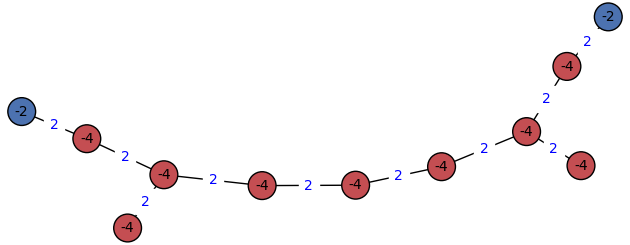

[-4  0  0  0  0  0  2  0  0  0  0]
[ 0 -4  0  2  0  2  0  0  0  0  0]
[ 0  0 -4  2  0  0  0  0  0  0  0]
[ 0  2  2 -4  0  0  0  0  2  0  0]
[ 0  0  0  0 -4  2  2  0  0  0  0]
[ 0  2  0  0  2 -4  0  0  0  0  0]
[ 2  0  0  0  2  0 -4  0  0  2  0]
[ 0  0  0  0  0  0  0 -2  2  0  0]
[ 0  0  0  2  0  0  0  2 -4  0  0]
[ 0  0  0  0  0  0  2  0  0 -4  2]
[ 0  0  0  0  0  0  0  0  0  2 -2]
Coxeter group over Universal Cyclotomic Field with Coxeter matrix:
[ 1  2  2  2  2  2 -1  2  2  2  2]
[ 2  1  2 -1  2 -1  2  2  2  2  2]
[ 2  2  1 -1  2  2  2  2  2  2  2]
[ 2 -1 -1  1  2  2  2  2 -1  2  2]
[ 2  2  2  2  1 -1 -1  2  2  2  2]
[ 2 -1  2  2 -1  1  2  2  2  2  2]
[-1  2  2  2 -1  2  1  2  2 -1  2]
[ 2  2  2  2  2  2  2  1 -1  2  2]
[ 2  2  2 -1  2  2  2 -1  1  2  2]
[ 2  2  2  2  2  2 -1  2  2  1 -1]
[ 2  2  2  2  2  2  2  2  2 -1  1]


In [220]:
B = ((nice_basis * source_root_matrix).T) * M14_10
Gram10 = B.T * LGram * B

Gr = IntegralLattice(Gram10).gram_matrix()

norms, roots_as, roots_vs, A3_prims = prim_roots_from_rows(A3, Gram10.inverse())

roots_gram_11 = intersection_gram_matrix_from_roots(roots_vs, Gram10)
show( roots_gram_11 )

for i, vi in enumerate( roots_vs ):
    assert vi * Gram10 * vi in [-2, -4]
    assert vi * Gram10 * vi == roots_gram_11[i,i]

    
show( norms )
show( Counter(norms) )
show( f"{len(roots_vs)} roots in roots_vs.")

GCox10 = coxeter_matrix(roots_vs, Gram10)
show( GCox10, GCox10.dimensions() )

SchCox10 = schlafli_matrix(GCox10)
show( SchCox10, SchCox10.dimensions() )

# show( coxeter_graph(GCox10) )

show( plot_coxeter_diagram_gram_mat(roots_gram_11) )

print( intersection_gram_matrix(roots_vs, Gram10) )

GrpCox10 = coxeter_group_from_matrix_with_infinity(GCox10)
print(GrpCox10)

#G = coxeter_fp_group_from_matrix( coxeter_infinity_matrix_encode( GCox10 ))
#print(G.abelianization_map().codomain().structure_description())

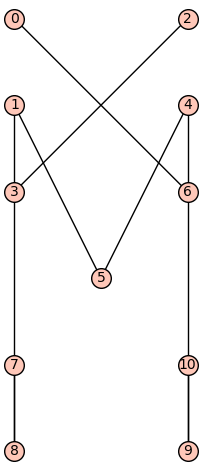

In [261]:
graphCox10 = coxeter_graph(GCox10)

autgrp_graphCox10 = graphCox10.automorphism_group()

#autgrp_graphCox10 = PermutationGroup( autgrp_graphCox10.gens() )

autgrp_graphCox10.orbits()

def reflection_symmetric_layout(autgrp, center=(0, 0), spacing=1.0):
    # Place vertices symmetrically with respect to vertical axis
    pos = {}
    x_fixed, y_fixed = center
    orbits = autgrp.orbits()

    y = y_fixed
    for orbit in sorted(orbits, key=lambda o: min(o)):
        o = sorted(list(orbit))
        if len(o) == 1:
            pos[o[0]] = (x_fixed, y)
        elif len(o) == 2:
            pos[o[0]] = (-spacing, y)
            pos[o[1]] = (spacing, y)
        else:
            raise ValueError(f"Orbit of size {len(o)} not supported yet: {o}")
        y -= spacing
    return pos

autgrp = graphCox10.automorphism_group()
pos = reflection_symmetric_layout(autgrp)
graphCox10.plot(pos=pos).show()

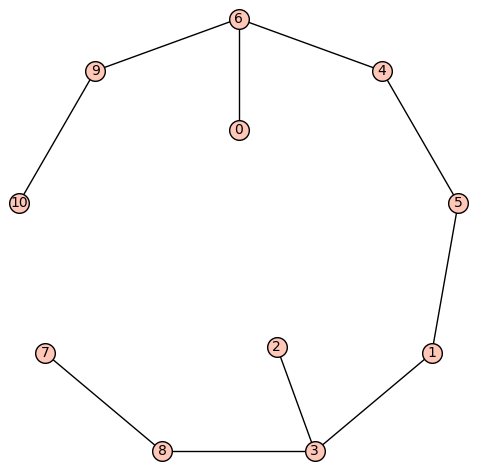

In [289]:
def regular_ngon_layout(vertices, center=(0, 0), radius=1.0,
                        inward_nodes=None, inward_sources=None, inward_fraction=0.5):
    """
    Places given vertices at the positions of a regular n-gon.
    Optionally places inward-pointing nodes toward the polygon centroid.

    Parameters:
        vertices: list of node labels to be arranged on the polygon.
        center: (x, y) tuple for the center of the polygon.
        radius: distance from center to each polygon vertex.
        inward_nodes: list of extra nodes to be placed inward (e.g., [0, 2]).
        inward_sources: list of polygon node labels they point from (e.g., [6, 3]).
        inward_fraction: how far from the source to the centroid to place the node (0–1).

    Returns:
        dict mapping each vertex to a 2D position (x, y).
    """
    from math import atan2

    n = len(vertices)
    polygon = polytopes.regular_polygon(n)
    polygon_positions = [tuple(v) for v in polygon.vertex_generator()]

    # Sort by angle to ensure counterclockwise ordering around center
    polygon_positions.sort(key=lambda p: atan2(p[1] - center[1], p[0] - center[0]))
    pos_ngon = {v: polygon_positions[i] for i, v in enumerate(vertices)}

    # Compute centroid of the polygon
    cx = sum(x for x, y in polygon_positions) / n
    cy = sum(y for x, y in polygon_positions) / n
    centroid = (cx, cy)

    pos_extra = {}
    if inward_nodes and inward_sources:
        for node, source in zip(inward_nodes, inward_sources):
            sx, sy = pos_ngon[source]
            x = sx + inward_fraction * (centroid[0] - sx)
            y = sy + inward_fraction * (centroid[1] - sy)
            pos_extra[node] = (x, y)

    return {**pos_ngon, **pos_extra}



ngon_nodes = [7,8,3,1,5,4,6,9,10]
inward_nodes = [0, 2]
inward_sources = [6, 3]

pos = regular_ngon_layout(
    vertices=ngon_nodes,
    center=(0, 0),
    radius=3.0,
    inward_nodes=inward_nodes,
    inward_sources=inward_sources,
    inward_fraction=0.5
)

graphCox10.plot(pos=pos).show()


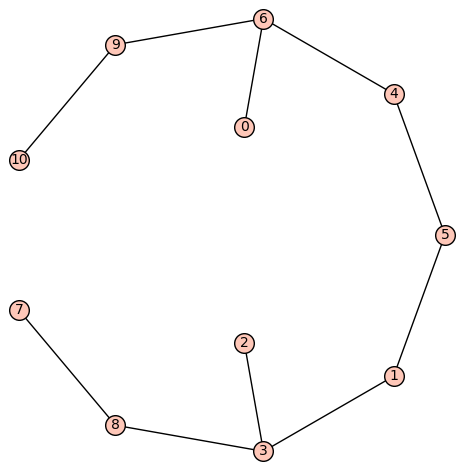

In [396]:
def assign_positions_with_involution(ngon_nodes, inward_nodes, inward_sources, involution, scale=1/2):
    """
    Assign positions on the complex unit circle to nodes using a given involution.
    
    Parameters:
    - ngon_nodes: list of nodes on the unit circle, in CCW order.
    - inward_nodes: list of inward nodes (not on circle).
    - inward_sources: source nodes on the circle corresponding to inward_nodes.
    - involution: dict representing an involutive automorphism (self-inverse).
    - scale: scalar multiple for inward nodes (default = 1/2).
    
    Returns:
    - positions: dict mapping each vertex to a complex number in CyclotomicField.
    """
    from sage.all import CyclotomicField

    n = len(ngon_nodes)
    if n % 2 == 0:
        raise ValueError("ngon_nodes list must have odd length to have a central fixed point")

    K = CyclotomicField(n)
    zeta = K.gen()

    # Assign symmetric exponents: [-m, ..., 0, ..., +m]
    mid = n // 2
    k_vals = [i - mid for i in range(n)]

    # Assign positions to ngon_nodes
    positions = {}
    for v, k in zip(ngon_nodes, k_vals):
        positions[v] = zeta**k

    # Assign positions to inward_nodes
    for v_new, v_base in zip(inward_nodes, inward_sources):
        positions[v_new] = scale * positions[v_base]

    # Enforce involution: v ↔ w ⇒ pos(w) = conjugate(pos(v))
    for v, w in involution.items():
        if v not in positions and w in positions:
            positions[v] = positions[w].conjugate()
        elif w not in positions and v in positions:
            positions[w] = positions[v].conjugate()
        elif v in positions and w in positions:
            # Verify conjugate consistency
            assert positions[w] == positions[v].conjugate(), f"Involution mismatch: {v} ↔ {w}"
        # else both are not in positions yet — OK

    return positions
    
ngon_nodes = [7,8,3,1,5,4,6,9,10]
inward_nodes = [0, 2]
inward_sources = [6, 3]
involution = {
    0: 2, 1: 4, 3: 6, 7: 10, 8: 9, 5: 5
}

positions = assign_positions_with_involution(ngon_nodes, inward_nodes, inward_sources, involution)

# # Example usage:
# chain = [7,8,3,1,5,4,6,9,10]
# sigma = graphCox10.automorphism_group().gens()[0]
# pos_complex = assign_chain_positions_with_conjugation_and_rotation(
#     chain, sigma, 18
# )

# print( pos_complex )

pos_real = {v: (complex(z).real, complex(z).imag) for v, z in positions.items()}
pos_real

graphCox10.plot(pos=pos_real).show()


ngon_nodes: [7, 8, 3, 1, 5, 4, 6, 9, 10]
involution_dict: {0: 2, 2: 0, 1: 4, 4: 1, 3: 6, 6: 3, 7: 10, 10: 7, 8: 9, 9: 8}
inward_nodes: [2, 0]
inward_sources: [3, 6]


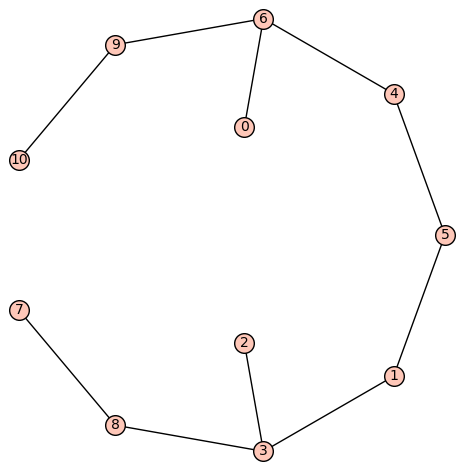

In [402]:
def extract_ngon_and_inward_data(G):
    """
    Given a Sage graph G with involutive symmetry, compute:
    - ngon_nodes: a longest simple path in G (for placing on the unit circle),
    - involution_dict: involution as a dictionary,
    - inward_nodes: nodes adjacent to ngon_nodes but not in it,
    - inward_sources: attachment points on ngon_nodes.
    """
    # Step 1: Compute automorphism group and pick one involution
    aut_group = G.automorphism_group()
    gens = aut_group.gens()
    if not gens:
        raise ValueError("Graph has trivial automorphism group.")
    
    invol = gens[0]  # assume it's an involution
    if invol.order() != 2:
        raise ValueError("First generator is not an involution.")
    
    # Make the involution dictionary symmetric
    involution_dict = {}
    for v in G.vertices():
        w = invol(v)
        if v != w:
            involution_dict[v] = w
            involution_dict[w] = v

    # Step 2: Find a longest simple path in G (DFS-based search)
    def longest_simple_path_from(v):
        visited = set()
        max_path = []

        def dfs(u, path):
            nonlocal max_path
            visited.add(u)
            path.append(u)
            if len(path) > len(max_path):
                max_path = path[:]
            for n in G.neighbors(u):
                if n not in path:
                    dfs(n, path)
            path.pop()
            visited.remove(u)

        dfs(v, [])
        return max_path

    longest_path = []
    for v in G.vertices():
        path = longest_simple_path_from(v)
        if len(path) > len(longest_path):
            longest_path = path

    ngon_nodes = longest_path
    ngon_set = set(ngon_nodes)

    # Step 3: Identify inward nodes and their attachment points
    inward_nodes = []
    inward_sources = []
    for v in ngon_nodes:
        for n in G.neighbors(v):
            if n not in ngon_set and n not in inward_nodes:
                inward_nodes.append(n)
                inward_sources.append(v)

    return ngon_nodes, involution_dict, inward_nodes, inward_sources

ngon_nodes, involution, inward_nodes, inward_sources = extract_ngon_and_inward_data(graphCox10)
print("ngon_nodes:", ngon)
print("involution_dict:", invol)
print("inward_nodes:", inward)
print("inward_sources:", sources)

positions = assign_positions_with_involution(
    ngon_nodes, 
    inward_nodes, 
    inward_sources, 
    involution
)

def do_plot(G):
    ngon_nodes, involution, inward_nodes, inward_sources = extract_ngon_and_inward_data(G)
    positions = assign_positions_with_involution(
        ngon_nodes, 
        inward_nodes, 
        inward_sources, 
        involution
    )
    pos_real = {v: (complex(z).real, complex(z).imag) for v, z in positions.items()}
    return G.plot(pos=pos_real)


do_plot(graphCox10).show()

In [414]:
G = Graph()

n = 16
for i in range(n):
    G.add_edge(i, (i+1) % n)

G.automorphism_group().gens()
#G.plot()
#do_plot(G)

((1,15)(2,14)(3,13)(4,12)(5,11)(6,10)(7,9),
 (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))

In [429]:
def rotation_character(G):
    A = G.automorphism_group()
    for g in A.gens():
        if g.order() > 2:
            r = g
            break
    else:
        raise ValueError("No cyclic generator found")

    # Try to find an involution i such that i*r*i = r^-1
    for h in A:
        if h.order() == 2 and h * r * h == ~r:
            iota = h
            break
    else:
        raise ValueError("No compatible involution found")

    # Define character: powers of r go to roots of unity
    order = r.order()
    zeta = exp(2 * pi * I / order)
    def chi(f):
        # Express f as r^k or iota*r^k
        for k in range(order):
            if f == r**k:
                return zeta^k
            if f == iota * r**k:
                return zeta^(-k)  # conjugate action
        return 1  # fallback (e.g., identity)
    
    return chi, r, iota, zeta


chi, r, iota, zeta = rotation_character(G)

print( chi, r, iota, zeta)

<function rotation_character.<locals>.chi at 0x7dbdda5f47c0> (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15) (0,2)(3,15)(4,14)(5,13)(6,12)(7,11)(8,10) 1/2*sqrt(sqrt(2) + 2) + 1/2*I*sqrt(-sqrt(2) + 2)


In [449]:
def cyclic_equivariant_mu_n_map(G):
    """
    Given a graph G with a cyclic symmetry of order n,
    find a homomorphism phi: Aut(G) -> Aut(mu_n),
    and an equivariant map f: V(G) -> mu_n.
    
    Returns:
        - n: order of the root of unity used
        - zeta: the primitive nth root of unity
        - phi: dict mapping generators of Aut(G) to powers of zeta
        - f: dict mapping vertices of G to values in mu_n
    """
    A = G.automorphism_group()
    gens = A.gens()
    
    # Find a generator of a cyclic subgroup of Aut(G) acting transitively (or nearly so)
    r = None
    for g in gens:
        orbit = g.orbit(0)
        if len(orbit) == G.num_verts():
            r = g
            break
    if r is None:
        raise ValueError("No cyclic generator acting transitively found.")
    
    n = r.order()
    zeta = exp(2 * pi * I / n)
    
    # Define phi: send r ↦ (ζ ↦ ζ^k), here k = 1
    phi = {r: 1}  # Exponent k acting as ζ ↦ ζ^k
    
    # Define f: map vertex v_i to ζ^i where r^i(v0) = v_i
    v0 = 0
    f = {}
    for i in range(n):
        v = (r^i)(v0)
        f[v] = zeta^i
    
    return n, zeta, phi, f

def build_positions(G, n, zeta, phi, f):
    """
    Given graph G, integer n, root of unity zeta, 
    homomorphism phi, and vertex map f from V(G) -> mu_n (symbolic),
    return a dictionary {v: complex_position} for plotting.
    """
    pos = {}
    for v in G.vertices():
        if v in f:
            # Convert symbolic zeta^k to numerical complex number on unit circle
            pos[v] = complex(f[v].n())
        else:
            # For vertices not in f (not on main cycle), place at origin for now
            pos[v] = 0 + 0j  

    pos_real = {v: (complex(z).real, complex(z).imag) for v, z in pos.items()}

    return pos_real

G = Graph()
n = 8
for i in range(n-1):
    G.add_edge(i, (i+1)%n)
    
n, zeta, phi, f = cyclic_equivariant_mu_n_map(G)
pos = build_positions(G, n, zeta, phi, f)
G.plot(pos=pos)

ValueError: No cyclic generator acting transitively found.

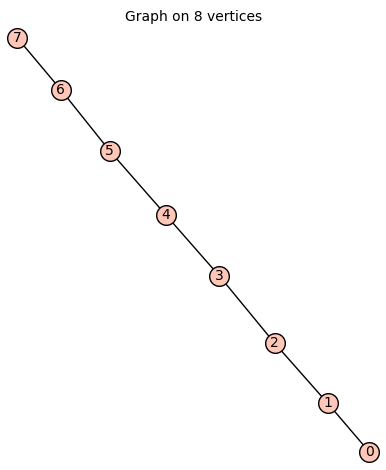

In [454]:
G.automorphism_group()
G

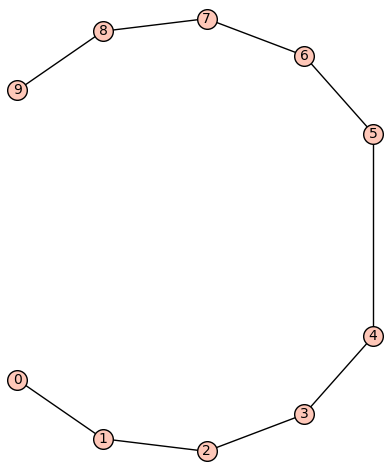

In [520]:
def involution_equivariant_map_from_path(G):
    A = G.automorphism_group()
    invol = next((g for g in A.gens() if g.order() == 2), None)
    if invol is None:
        raise ValueError("No involution found")

    # Get the longest path
    P = list(G.longest_path())
    N = len(P) 
    if N % 2 == 1:
        raise ValueError("Path has odd length; expected even length for no fixed point")

    m = N // 2  # center index

    zeta = exp(2 * pi * I / (2 * (m + 1) + 1))  # total steps = m+1, we want enough spacing

    f = {}

    for k in range(N - m):
        vk = P[m + k]                # start at midpoint and move forward
        sig_vk = invol(vk)
        f[vk] = zeta**(k + 1)
        f[sig_vk] = zeta**(-(k + 1))

    return zeta, f

G = Graph()
n = 10
for i in range(n-1):
    G.add_edge(i, (i+1)%n)
    
zeta, f = involution_equivariant_map_from_path(G)
pos = build_positions(G, n, zeta, phi, f)
G.plot(pos=pos)

# for v in G.vertices():
#     sv = invol(v)
#     lhs = f[sv]
#     rhs = f[v]**phi[invol]
#     assert lhs == rhs, f"Equivariance fails at vertex {v}"

In [515]:
type( G.longest_path() )

<class 'sage.graphs.graph.Graph'>

In [489]:
G.automorphism_group()

Permutation Group with generators [(0,9)(1,8)(2,7)(3,6)(4,5)]

In [460]:
def orbits_of_element(perm, points):
    """
    Compute orbits of a single permutation element acting on a set of points.
    Works for any order permutation, but especially simple for involutions.
    """
    seen = set()
    orbits = []
    for p in points:
        if p not in seen:
            orbit = set()
            # Build orbit by repeated application until cycle closes
            current = p
            while current not in orbit:
                orbit.add(current)
                current = perm(current)
            orbits.append(list(orbit))
            seen.update(orbit)
    return orbits

A = G.automorphism_group()
gens = A.gens()
invol = None
for g in gens:
    if g.order() == 2:
        invol = g
        break

vertex_set = G.vertices()
orbits = orbits_of_element(invol, vertex_set)
print(orbits)

# A = G.automorphism_group()
# gens = A.gens()
# sigma = gens[0]
# sigma
# sigma.orbit()

[[0, 7], [1, 6], [2, 5], [3, 4]]


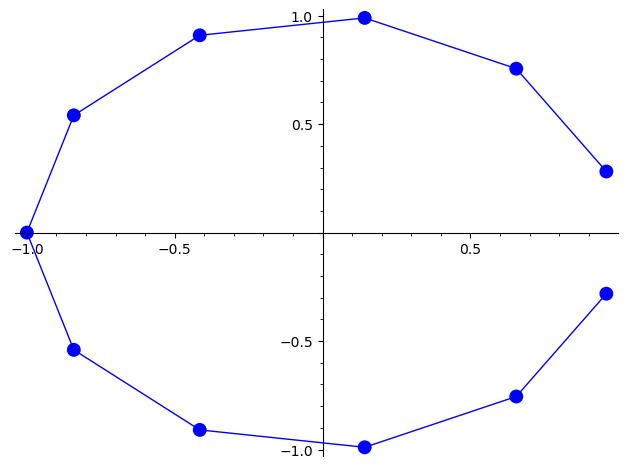

In [618]:
n = 11
z = exp(2*pi*I / n)

ps = [exp(I pi / n ) * z^k for k in [0,..,n-1]]

edges = [ 
    [ (complex(ps[i]).real, complex(ps[i]).imag), 
      (complex(ps[ (i+1) % n]).real, complex(ps[(i+1) % n]).imag)] for i in [0,..,n-2] 
]

lines = sum( [line( seg ) for seg in edges] )
list_plot( ps[0:n], size=100) + lines.plot()

In [678]:
G = Graph()

G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,0)
G.automorphism_group().structure_description()

'S3'

In [681]:
grp = Pt.restricted_automorphism_group()
grp.structure_description()

DihedralGroup(4).subgroups()

[Subgroup generated by [()] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(1,3)(2,4)] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(2,4)] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(1,3)] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(1,2)(3,4)] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(1,4)(2,3)] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(1,3)(2,4), (2,4)] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(1,3)(2,4), (1,2,3,4)] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(1,3)(2,4), (1,2)(3,4)] of (Dihedral group of order 8 as a permutation group),
 Subgroup generated by [(1,3)(2,4), (2,4), (1,2,3,4)] of (Dihedral group of order 8 as a permutation group)]

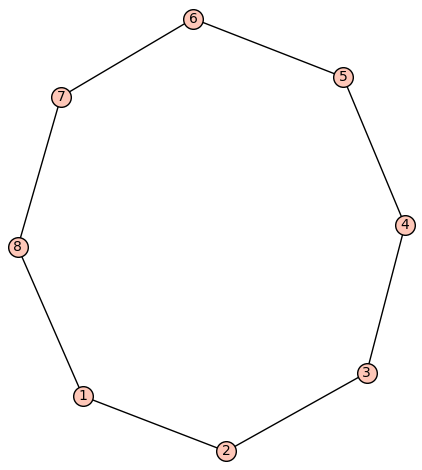

Failed to find a suitable polytope.


In [928]:
def embed_graph_into_polytope(
    input_graph, 
    num_tries=100
):
    """
    Try to embed `input_graph` into a polytope P so that:
    - Aut(input_graph) embeds into Aut(P)
    - Vertex set V(G) embeds equivariantly into V(P)
    
    Arguments:
        input_graph: a Sage graph
        num_tries: how many polytopes to try before giving up
        get_polytope: a function returning a candidate Polyhedron P
        
    Returns:
        (P, H, phi, f) where:
        - P is the polytope,
        - H is the subgroup of Aut(P) isomorphic to Aut(G),
        - phi: Aut(G) → H is an isomorphism,
        - f: equivariant injection from V(G) to V(P)
        
        Returns None if unsuccessful.
    """
    G = input_graph.automorphism_group()
    G_order = G.order()
    X = input_graph.vertices()

    polytope_generator =  get_some_polytope()
    for _ in range(num_tries):
        P = next( polytope_generator )
        AutP = P.restricted_automorphism_group()
        
        if AutP.order() < G_order or G_order % AutP.order() != 0:
            continue
        
        # Filter to subgroups H ≤ Aut(P) isomorphic to G
        candidate_subgroups = [H for H in AutP.subgroups() if H.is_isomorphic(G)]
        if not candidate_subgroups:
            continue
        
        for H in candidate_subgroups:
            try:
                phi = G.isomorphism_to(H)
            except ValueError:
                continue  # just to be safe

            Y = list(H.domain())

            # Heuristic filter: discard fixed points
            Y = [y for y in Y if not H.stabilizer(y).is_isomorphic(H)]

            if len(Y) < len(X):
                continue

            # Try to find equivariant injection X → Y
            f = find_equivariant_bijection(G, H, phi, X, Y)
            if f is not None:
                return (P, H, phi, f)
    
    return None

def regular_ngon_exact(n, scale = 1):
    """
    Return exact vertices of a regular n-gon in the complex plane,
    embedded in R^2 as a list of (Re, Im) pairs.
    """
    K = CyclotomicField(n)
    zeta = scale * K.gen()
    return [ ( QQbar(zeta^k).real(), QQbar(zeta^k).imag()) for k in range(n) ]
    
def get_some_polytope():
    """
    Generator yielding integral 2D convex polygons in R^2 with increasing symmetry/scale.
    Polygons include triangles, squares, pentagons, hexagons, etc.
    Vertices are rounded to nearest integers to lie in Z^2.
    """
    from sage.geometry.polyhedron.constructor import Polyhedron
    from math import cos, sin, pi
    from itertools import count

    def regular_ngon(n, radius):
        """Return vertices of an approximate regular n-gon with integer coordinates."""
        return [
            (round(radius * cos(2 * pi * k / n)), round(radius * sin(2 * pi * k / n)))
            for k in range(n)
        ]

    def rectangle(w, h):
        return [(0, 0), (w, 0), (w, h), (0, h)]

    def triangle(scale):
        return [(0, 0), (scale, 0), (scale // 2, scale)]

    shapes = [
        lambda s: Polyhedron(vertices=triangle(s)),
        lambda s: Polyhedron(vertices=regular_ngon_exact(4, s)),   # square
        lambda s: Polyhedron(vertices=regular_ngon_exact(5, s)),   # pentagon
        lambda s: Polyhedron(vertices=regular_ngon_exact(6, s)),   # hexagon
        lambda s: Polyhedron(vertices=rectangle(s, s + 1)),  # rectangle
    ]

    shape_count = len(shapes)
    for i in count(start=1):
        s = 1 + (i // shape_count)  # slowly increase scale
        yield shapes[i % shape_count](s)

G = Graph()
n = 8
for i in [1,..,n-1]:
    G.add_edge(i, i+1)
G.add_edge(n, 1)

result = embed_graph_into_polytope(G, num_tries = 10^3)
if result:
    P, H, phi, f = result
    print("Polytope found with vertices:", P.vertices())
    print("Equivariant map f:", f)
    pos = dict(zip( 
        G.vertices(), 
        [ vector( P.vertices()[ f(v) - 1] ) for v in G.vertices() ]
    ))
    G.plot(pos=pos).show()
else:
    G.plot().show()
    print("Failed to find a suitable polytope.")

In [961]:
from sage.matrix.constructor import Matrix
from sage.modules.free_module_element import vector
from sage.groups.perm_gps.permgroup_named import SymmetricGroup



pts = [vector([0,0]), vector([1,0]), vector([1,1]), vector([0,1])]
G, aff_gens = affine_symmetry_group(pts)
print(G.order())                        # should be 8
print(G.structure_description())        # should be "Dihedral group of o

4
C4


In [964]:
P = Polyhedron( pts )
P.restricted_automorphism_group().structure_description()

'D4'

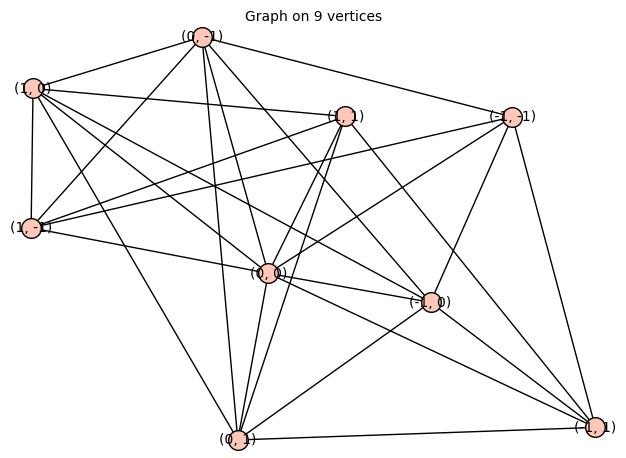

In [1203]:
def lattice_graph_in_polytope(P):
    pts = P.integral_points()
    G_P = Graph()
    G_P.add_vertices(pts)
    for i in range(len(pts)):
        for j in range(i+1, len(pts)):
            if adjacency_test(pts[i], pts[j]):
                G_P.add_edge(pts[i], pts[j])
    return G_P, pts

def find_realizations_with_symmetry(G, G_P, pts):
    embeddings = G_P.subgraph_search_iterator(G, induced=False)
    for H in embeddings:
        vertex_positions = H.vertices()
        # Find permutation of vertices matching G
        pos_to_index = {p: i for i, p in enumerate(vertex_positions)}
        G_embed = Graph()
        G_embed.add_vertices(range(len(vertex_positions)))
        for u, v in G.edges():
            G_embed.add_edge(pos_to_index[H.vertex_iterator()[u]], pos_to_index[H.vertex_iterator()[v]])

        # Check symmetry
        aff_syms = find_affine_symmetries(vertex_positions)
        G_aut = G.automorphism_group()
        if is_group_compatible(G_aut, aff_syms):
            yield vertex_positions

def find_realizations_with_symmetry(G, G_P, pts):
    vertex_to_index = {v: i for i, v in enumerate(G_P.vertices())}
    embeddings = G_P.subgraph_search_iterator(
        G, 
        induced=False, 
        return_graphs=False
    )
    iso = next(embeddings)  # iso is now a dict: G vertex → G_P vertex    
    realization = [iso[v] for v in G.vertices()]
    return realization
        
G = Graph()
for i in [1,..,7]:
    G.add_edge(i, i+1)
G.add_edge(8, 1)
P = Polyhedron( [ (-1,-1), (1,-1), (1,1), (-1,1) ] )

def adjacency_test(v1, v2):
    return (vector(v1) - vector(v2)).norm() <= 2
lattice_graph_in_polytope(P)[0]


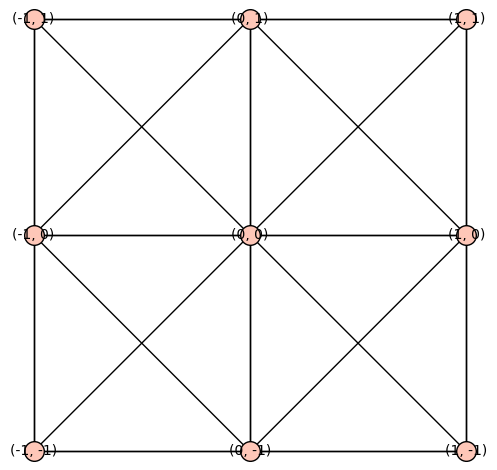

1


[]

In [1218]:
def find_symmetric_lattice_realizations(G, P):
    AutG = G.automorphism_group()

    AutP_mat, AutP_perm, phi_mat_perm = isomorphism_matrix_to_permutation(P)

    iso_subgroups = [ H for H in AutP_perm.subgroups() if H.is_isomorphic(AutG) ]
    print( len( iso_subgroups ) )
    G_P, pts = lattice_graph_in_polytope(P)
    vertex_to_index = {v: i for i, v in enumerate(G_P.vertices())}

    for H in iso_subgroups:
        phi = AutG.isomorphism_to(H)
        H_matrices = {g: phi_mat_perm.lift( phi(g) ) for g in AutG}

        for subG in G_P.subgraph_search_iterator(G, induced=False):
            is_iso, f_i = G.is_isomorphic( subG, certificate=True)
            assert is_iso
            if all(
                apply_affine_matrix(H_matrices[g], f_i[v]) == f_i[g(v)] for g in AutG for v in G.vertices()):
                yield f_i


G = graphs.CycleGraph(4) 
P = Polyhedron([(-1,-1), (1,-1), (1,1), (-1,1)])
P_graph = lattice_graph_in_polytope(P)[0]
pos_dict =  dict(zip( P_graph.vertices(), P_graph.vertices() ) )
P_graph.plot(
    pos = pos_dict
).show()

list( find_symmetric_lattice_realizations(G, P) )

[(0, (-1, -1)), (1, (-1, 0)), (2, (-1, 1)), (3, (0, -1)), (4, (0, 0)), (5, (0, 1)), (6, (1, -1)), (7, (1, 0)), (8, (1, 1))]


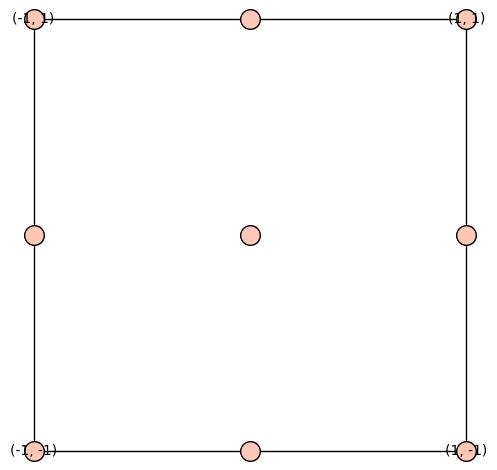

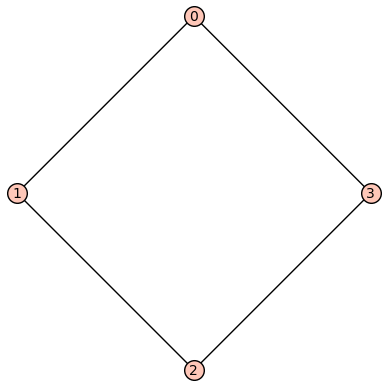

In [1223]:
pvs = P_graph.vertices()
print( list(zip([0,..,len(pvs)], pvs )))
gps = P_graph.subgraph( [ pvs[i] for i in [0, 6, 8, 2 ] ] )

gps.plot(pos=pos_dict).show()
show(G)

In [1316]:
ds = dict(zip(G_P.vertices(), range(100) ))

def v(a,b):
    vv = vector(QQ, [a,b])
    vv.set_immutable()
    return vv
    
ds[ v(-1,-1) ]

v(-1,-1) in G_P.vertices()

edge_verts = [
    v(-1,-1),
    v(1,-1),
    v(1,1),
    v(-1,1)
]

H = [ H for H in subG_isos if all([ x in H.vertices() for x in edge_verts ]) ][0]


H.plot(pos=pos_dict)

subG = [ H for H in subG_isos if all([ x in H.vertices() for x in edge_verts ]) ][0]

subG.plot(pos=pos_dict)

subG.vertices()

ds = dict(zip(G_P.vertices(), range(100) ))
ds

{(-1, -1): 0,
 (-1, 0): 1,
 (-1, 1): 2,
 (0, -1): 3,
 (0, 0): 4,
 (0, 1): 5,
 (1, -1): 6,
 (1, 0): 7,
 (1, 1): 8}

1


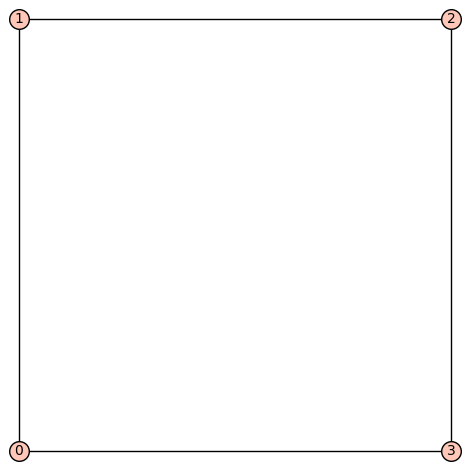

{0: (-1, -1), 1: (-1, 1), 2: (1, 1), 3: (1, -1)}


()           ()           (x, y)
  (1,3)        (2,3)        (y, x)
  (0,1)(2,3)   (1,2)(3,4)   (x, -y)
  (0,1,2,3)    (1,3,4,2)    (y, -x)
  (0,2)        (2,3)        (y, x)
  (0,2)(1,3)   (1,4)(2,3)   (-x, -y)
  (0,3,2,1)    (1,2,4,3)    (-y, x)
  (0,3)(1,2)   (1,3)(2,4)   (-x, y)

In [1301]:
AutG = G.automorphism_group()
G_P, pts = lattice_graph_in_polytope(P)
AutP_mat, AutP_perm, phi_mat_perm = isomorphism_matrix_to_permutation(P)

iso_subgroups = [ H for H in AutP_perm.subgroups() if H.is_isomorphic(AutG) ]
print( len(iso_subgroups) )

H = iso_subgroups[0]
phi = AutG.isomorphism_to(H)
H_matrices = {g: phi_mat_perm.lift( phi(g) ) for g in AutG}

subG = [ H for H in subG_isos if all([ x in H.vertices() for x in edge_verts ]) ][0]
is_iso, f_i = G.is_isomorphic( subG, certificate=True)

assert AutG.is_isomorphic( subG.automorphism_group() )

G.plot(pos = f_i).show()

#pts = matrix(ZZ, f_i.values()).T
#show( pts )

print( f_i )

#for x in [(g, matrix(phi_mat_perm.lift( phi(g) ))[0:2, 0:2] ) for g in AutG]:

var("x, y")
vxy = vector(SR, [x,y])
show(table(columns=[
    AutG,
    map(phi, AutG),
    map(lambda x: matrix(x)[0:2, 0:2] * vxy, map(phi_mat_perm.lift, map(phi, AutG)))
]))

# AutG ->phi H_perm ->phi_mat^(-1) H_mat
#AutG_mats = [ (g, phi_mat_perm.lift( phi(g) )) for g in AutG]
#[ apply_affine_matrix(M, f_i[v0]) == f_i[ g(v0) ] for g,M_g in AutG_mats]

# v = G.vertices()[0]
# assert v == 0

# matrix( [ f_i[v] for v in G.vertices() ] ).T

# apply_affine_matrix

# if all(
# apply_affine_matrix(H_matrices[g], f_i[v]) == f_i[g(v)] for g in AutG for v in G.vertices()):
# yield f_i

## subG2 = copy(subG)
subG2.relabel(ds)

subG2.plot(
    pos={ds[value]:key for i, (key, value) in enumerate(pos_dict.items())}
    
)

In [1196]:
AutG = G.automorphism_group()

AutP_mat, AutP_perm, phi_mat_perm = isomorphism_matrix_to_permutation(P)

iso_subgroups = [ H for H in AutP_perm.subgroups() if H.is_isomorphic(AutG) ]
print( len( iso_subgroups ) )
G_P, pts = lattice_graph_in_polytope(P)
vertex_to_index = {v: i for i, v in enumerate(G_P.vertices())}

H = iso_subgroups[0]
phi = AutG.isomorphism_to(H)

g = AutG[1]
phi_mat_perm.lift( phi(g) )
# for H in iso_subgroups:
#     phi = AutG.isomorphism_to(H)
#     H_matrices = {g: phi_mat_perm( phi(g) ) for g in AutG}

v = vector(ZZ, (1,0) )

isinstance(v, sage.structure.element.Vector)

#sage

1


True

In [1199]:
def apply_affine_matrix(M, X):
    """
    Applies a 3x3 affine matrix M to a 2 x m matrix X of 2D column vectors.
    Returns a 2 x m matrix of transformed vectors.
    """
    is_vector = False
    if isinstance(X, sage.structure.element.Vector):
        is_vector = True
        X = matrix(QQ, X).T
    if X.nrows() != 2:
        raise ValueError("Input matrix X must be 2 x m, where columns are 2D vectors.")
    
    m = X.ncols()
    # Convert to 3 x m matrix by adding a row of 1s (homogenize)
    X_homog = block_matrix([[X], [matrix(QQ, [1]*m)]])
    
    Y = M * X_homog  # Apply affine transformation: result is 3 x m
    
    # Normalize by the 3rd row (homogeneous coordinate)
    if any(y == 0 for y in Y.row(2)):
        raise ZeroDivisionError("Affine transformation sent some point(s) to infinity.")
    
    Y_normalized = matrix(QQ, [
        [Y[0, j] / Y[2, j] for j in range(m)],
        [Y[1, j] / Y[2, j] for j in range(m)]
    ])
    if is_vector:
        Y_normalized = vector(QQ, Y_normalized.column(0) )
    return Y_normalized
    
def isomorphism_matrix_to_permutation(P):
    """
    Returns the triple (G1, G2, psi) where:
    - G1 is the group of affine automorphisms (matrices),
    - G2 is the permutation group acting on the vertices,
    - psi: G1 → G2 is a group isomorphism.

    This works by comparing the image of vertices under matrices with permutations.
    """
    G1 = P.restricted_automorphism_group("matrix")  # matrix group
    G2 = P.restricted_automorphism_group()          # permutation group

    F = Hom(G1, G2).natural_map()
    assert F.image( G1 ).is_isomorphic( G2 )
    assert F.kernel().is_trivial()

    return G1, G2, F



isomorphism_matrix_to_permutation(P)

(Matrix group over Rational Field with 3 generators (
 [0 1 0]  [ 1  0  0]  [ 0 -1  0]
 [1 0 0]  [ 0 -1  0]  [-1  0  0]
 [0 0 1], [ 0  0  1], [ 0  0  1]
 ),
 Permutation Group with generators [(2,3), (1,2)(3,4), (1,4)],
 Group morphism:
   From: Matrix group over Rational Field with 3 generators (
 [0 1 0]  [ 1  0  0]  [ 0 -1  0]
 [1 0 0]  [ 0 -1  0]  [-1  0  0]
 [0 0 1], [ 0  0  1], [ 0  0  1]
 )
   To:   Permutation Group with generators [(2,3), (1,2)(3,4), (1,4)])

In [1110]:
vertices = P.vertices()
V_mat = matrix(QQ, [v.vector() for v in vertices]).transpose()  #

aut1 = P.restricted_automorphism_group("matrix").gens()[1]
aut1
print( V_mat )
print("-")
print( apply_affine_matrix( aut1, V_mat ) )

[-1 -1  1  1]
[-1  1 -1  1]
-
[-1 -1  1  1]
[ 1 -1  1 -1]


In [1163]:
G1 = P.restricted_automorphism_group("matrix")  # matrix group
G2 = P.restricted_automorphism_group()          # permutation group

vertices = P.vertices()
V_mat = matrix(QQ, [v.vector() for v in vertices]).transpose()  # d × n matrix

gens1 = G1.gens()
gens2 = G2.gens()

#psi = G1.Hom( gens2, G2)
#psi.kernel().is_isomorphic( PermutationGroup([]) )
#psi.image()

F = Hom(G1, G2).natural_map()
assert F.image( G1 ).is_isomorphic( G2 )
assert F.kernel().is_trivial()
F.
#G2.is_trivial()

NotImplementedError: <class 'sage.groups.libgap_morphism.GroupHomset_libgap_with_category.element_class'>

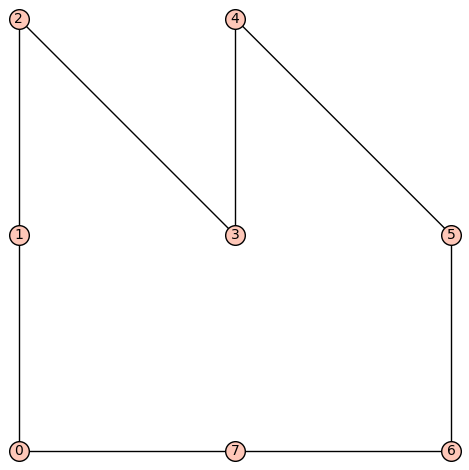

{0: (-1, -1),
 1: (-1, 0),
 2: (-1, 1),
 3: (0, 0),
 4: (0, 1),
 5: (1, 0),
 6: (1, -1),
 7: (0, -1)}

In [1048]:
G = graphs.CycleGraph(8)  # or your own cycle

# G = Graph()
# n = 8
# for i in [1,..,n-1]:
#     G.add_edge(i, i+1)
# G.add_edge(n, 1)

# Step 1: Fix a polytope P (say, square of side 2 centered at origin)
P = Polyhedron([(-1,-1), (1,-1), (1,1), (-1,1)])

# Step 2: Build lattice graph in P
G_P, pts = lattice_graph_in_polytope(P)

# show(G)
# show(P)
# show(G_P)

# Step 3: Search for subgraphs of G_P isomorphic to G
vertex_to_index = {v: i for i, v in enumerate(G_P.vertices())}

realizations =  find_realizations_with_symmetry(G, G_P, pts)
pos = {i: vector(realizations[i]) for i in range(len(realizations))}
G.plot(pos=pos).show()

realizations[0]
#list( realizations )

pos

In [1018]:
vertex_to_index

{(-1, -1): 0,
 (-1, 0): 1,
 (-1, 1): 2,
 (0, -1): 3,
 (0, 0): 4,
 (0, 1): 5,
 (1, -1): 6,
 (1, 0): 7,
 (1, 1): 8}

In [842]:
from itertools import permutations

def find_equivariant_bijection(G, H, phi, X, Y):
    """
    Given an isomorphism phi: G → H and sets X, Y with G and H acting respectively,
    returns a G-equivariant bijection f: X → Y, i.e., f(g·x) = phi(g)·f(x)
    """

    if len(X) != len(Y):
        return None  # no bijection possible
    
    # Try all bijections f: X → Y
    for y_perm in permutations(Y):
        f = dict(zip(X, y_perm))  # candidate bijection f: X → Y
        equivariant = True

        for g in G:
            for x in X:
                gx = g(x)               # G acts on X
                fx = f[x]
                phig_fx = phi(g)(fx)    # H acts on Y
                if f[gx] != phig_fx:
                    equivariant = False
                    break
            if not equivariant:
                break

        if equivariant:
            from sage.categories.morphism import SetMorphism
            homsets = Hom(ZZ, ZZ, Sets())
            f_equiv = SetMorphism( homsets, lambda i: ZZ(f[i]) )
            return f_equiv  # found a valid G-equivariant bijection

    return None  # none found

G = SymmetricGroup(3)

H = [H for H in AutP.subgroups() if H.is_isomorphic( G ) ][0]
assert G.is_isomorphic(H)
phi = G.isomorphism_to( H )

X = [1,2,3]
Y = list( set(H.domain()).difference(
    set( [x for x in [1,2,3,4] if H.stabilizer(x).is_isomorphic(H) ])
))

f = find_equivariant_bijection(G, H, phi, X, Y) 
[ (x, f(x)) for x in [1,2,3] ]

[(1, 2), (2, 3), (3, 4)]

In [839]:
set1 = set([1,2,3])
set1
from sage.categories.morphism import SetMorphism
homsets = Hom(ZZ, ZZ, Sets())
f = SetMorphism( homsets, lambda i: ZZ(f_equiv[i]) )
[ f(x) for x in [1,2,3] ]

[2, 3, 4]

In [778]:
for y_perm in permutations(Y):
    f = dict(zip(X, y_perm))  # candidate bijection f: X → Y
    print(f)
    equivariant = True

    for g in G:
        for x in X:
            gx = g(x)               # G acts on X
            fx = f[x]
            phig_fx = phi(g)(fx)    # H acts on Y
            print( f[ g(x) ], phi(g)( f[x] ) )
            if f[gx] != phig_fx:
                equivariant = False
                break
        if not equivariant:
            break

{1: 2, 2: 3, 3: 4}
2 2
3 3
4 4
4 1
{1: 2, 2: 4, 3: 3}
2 2
4 4
3 3
3 1
{1: 3, 2: 2, 3: 4}
3 3
2 2
4 4
4 2
{1: 3, 2: 4, 3: 2}
3 3
4 4
2 2
2 2
3 4
{1: 4, 2: 2, 3: 3}
4 4
2 2
3 3
3 4
{1: 4, 2: 3, 3: 2}
4 4
3 3
2 2
2 4


In [694]:

G = CyclicPermutationGroup(4)
H = DihedralGroup(4)
phi = PermutationGroupMorphism_im_gens(G, H, map(H, G.gens())); phi

g0 = G.gens()[0]
H(g0)
#list( map(H, G.gens() ) )

(1,2,3,4)

In [677]:
pts_images = dict( [ (label, vector( (gen * vector(ZZ, [p[0], p[1], 1] ) )[0:2]) ) for _, (label, p) in enumerate( pts.items() ) ] )
pts_images

pts_perms = dict(zip([0,..,8], [ list( pts.values() ).index(j) for j in pts_images.values() ] ))
pts_perms

perms_fix = dict([ (lab+1, val+1) for _, (lab, val) in enumerate(pts_perms.items()) ])
m_perm = Permutation( list(perms_fix.values()) ).to_matrix()


[1 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0]
[0 1 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 1 0]
[0 0 1 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 1]

In [204]:
roots_as_list = list(roots_as)
root_basis = set()
for i in range(len(roots_as)):
    for j in range(len(roots_as)):
        ai = roots_as_list[i]
        aj = roots_as_list[j]
        norm_i = ai * Gram10.inverse() * ai
        norm_j = aj * Gram10.inverse() * aj
        if norm_i == -1:
            ai = 2 * ai
            norm_i = ai * Gram10.inverse() * ai
            assert norm_i == -4
        if norm_j == -1:
            aj = 2 * aj
            norm_j = aj * Gram10.inverse() * aj
            assert norm_j == -4
        assert norm_i in [-2,-4] and norm_j in [-2,-4]
        ai.set_immutable()
        aj.set_immutable()
        root_basis.add(ai)
        root_basis.add(aj)

root_basis_list = list(root_basis)
root_basis_matrix_11 = matrix(ZZ, root_basis_list)

print(root_basis_matrix_11)
print( root_basis_matrix_11.dimensions() )

roots_Gram11 = matrix(ZZ, root_basis_matrix_11 * Gram10.inverse() * root_basis_matrix_11.T)
for i in [0,..,10]:
    for j in [0,..,10]:
        ri = root_basis_list[i]
        rj = root_basis_list[j]
        gij = ri * Gram10.inverse() * rj
        assert gij == roots_Gram11[i,j] == gij

r0 = root_basis_list[0]

assert r0 * Gram10.inverse() * r0 == -4
assert Gram_roots[0,0] == -4
print( roots_Gram11 )
print( roots_Gram11.dimensions() )

best_indices = [0,1,2,3,4,5,6,7,8,9]
root_basis_L = [r for i, r in enumerate( root_basis_list ) if i in best_indices ]
root_basis_matrix_10 = matrix(ZZ, root_basis_L)
roots_Gram10 = matrix(ZZ, root_basis_matrix_10 * Gram10.inverse() * root_basis_matrix_10.T)

L = IntegralLattice(roots_Gram10)

assert L.gram_matrix() == roots_Gram10

for i, r in enumerate( root_basis_L ):
    ei = vector( [0] * 10 )
    ei[i] = 1
    assert ei * L.gram_matrix() * ei in [-2,-4]
    assert r * Gram10.inverse() * r in [-2,-4]
    assert r * Gram10.inverse() * r == ei * best_Gram * ei
    assert ei * L.gram_matrix() * ei == roots_Gram11[i, i] #Okay for 0<= i <= 9, even though this is 11x11



[ -2  -1   0  -7   0  -3  -2  -1  -2   0]
[  0   4  10  16  22  22  20   0   0  -6]
[ -6   1  -2  -3  -2  -3  -2   1  -2   2]
[  0   2  -4   2   0   0   0   0   0   0]
[  0   0   1   2   2   5   0   0   0  -1]
[  4  -3   4   3   2   3   2   1   2   0]
[  6   3   2   3  -6   1  -2   5   6   2]
[  6   2   2   2   0   0   0  -2   6   2]
[  0   0  -2  -4  -2 -10  -2   0   0   2]
[ -2  -1  -1  -1   0   0   0   1  -4  -1]
[ 10   8  10  12  12  14  12   8   8  -6]
(11, 10)


NameError: name 'Gram_roots' is not defined

In [184]:
L_basis = L.gens()

for i, r in enumerate( root_basis_list[0:10] ):
    assert( root_basis_matrix_10.inverse().T * r == L_basis[i] )

for r in list(root_basis):
    assert r * Gram10.inverse() * r in [-2, -4]

r10 = vector(QQ, root_basis_list[10] )  # r10

assert r10 * Gram10.inverse() * r10 == -4

r10_in_L = root_basis_matrix_10.inverse().T * r10 # Much better than solve_right(r10).

assert r10_in_L * L.gram_matrix() * r10_in_L in [-2,-4]
assert r10_in_L * L.gram_matrix() * r10_in_L == r10 * Gram10.inverse() * r10

print( r10_in_L )

AttributeError: 'list' object has no attribute 'gens'

In [176]:
L

[l0,
 l1,
 l2,
 l3,
 l4,
 l5,
 l6,
 l7,
 l8,
 l9,
 l10,
 l11,
 l12,
 l13,
 l14,
 l15,
 l16,
 l17,
 l18,
 l19,
 l20,
 l21]

In [1484]:
assert root_basis_matrix_10.dimensions() == (10,10)
assert root_basis_matrix_11.dimensions() == (11,10)
assert A3.dimensions() == (22,10)
assert matrix( list(uniq(A3.rows())) ).dimensions() == (12, 10)
change_basis.inverse().T.dimensions()
assert change_basis.dimensions() == (10,10)

# change_basis.inverse().T * ei == r, r in roots_in_Lp

(10, 10)

In [1463]:
A3 # (22, 10)
root_basis_matrix_11 # (11,10)
root_basis_matrix_10.inverse().T # (10,10) r_i in Z^10 -> ei in L
change_basis.inverse().T #(10,10),

10

In [1309]:
from itertools import combinations

best = None
best_det = None
candidates = []

for indices in combinations(range(11), 10):
    Gsub = Gram_roots.matrix_from_rows_and_columns(indices, indices)
    d = Gsub.det()
    if d != 0:
        # Optional: pick the “smallest” Gram matrix
        size = max(abs(x) for x in Gsub.list())
        candidates.append((size, abs(d), indices, Gsub))
        
# Sort candidates by smallest entries and determinant
candidates.sort()
_, _, best_indices, best_Gram = candidates[0]

print("Best 10 root indices:", best_indices)
print("10×10 Gram matrix:\n", best_Gram)

L = IntegralLattice(best_Gram)
print(L)

#print( L.is_isometric(Lp)  )
print( L.rad() )


root_basis_L = [r for i, r in enumerate(list(root_basis)) if i in best_indices ]
show(len( root_basis_L))

Best 10 root indices: (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
10×10 Gram matrix:
 [-4  0  0  0  0  2  0  0  0  2]
[ 0 -4  0  0  0  2  0  0  0  0]
[ 0  0 -2  0  0  0  0  2  0  0]
[ 0  0  0 -4  0  0  2  0  0  2]
[ 0  0  0  0 -2  0  0  0  2  0]
[ 2  2  0  0  0 -4  0  0  2  0]
[ 0  0  0  2  0  0 -4  2  0  0]
[ 0  0  2  0  0  0  2 -4  0  0]
[ 0  0  0  0  2  2  0  0 -4  0]
[ 2  0  0  2  0  0  0  0  0 -4]
Lattice of degree 10 and rank 10 over Integer Ring
Gram matrix:
[-4  0  0  0  0  2  0  0  0  2]
[ 0 -4  0  0  0  2  0  0  0  0]
[ 0  0 -2  0  0  0  0  2  0  0]
[ 0  0  0 -4  0  0  2  0  0  2]
[ 0  0  0  0 -2  0  0  0  2  0]
[ 2  2  0  0  0 -4  0  0  2  0]
[ 0  0  0  2  0  0 -4  2  0  0]
[ 0  0  2  0  0  0  2 -4  0  0]
[ 0  0  0  0  2  2  0  0 -4  0]
[ 2  0  0  2  0  0  0  0  0 -4]
Signature: (1, 9), Index: -8, Discriminant: 2^10, 
Even, Non-unimodular, p-elementary, Length: 10, 
A_L: Multiplicative Abelian group isomorphic to C2^10, 

(10, 10, 1)


10

In [929]:
Lp = Z.twist(2) @ Z.twist(-2) @ E8.twist(2)
print( Lp )
print( Lp.rad() )

assert L.signature() == Lp.signature() and L.rad() == Lp.rad() and L.discriminant() == Lp.discriminant() and L.is_even() == Lp.is_even() and get_delta(L) == get_delta(Lp)

Lattice of degree 10 and rank 10 over Integer Ring
Decomposition: L1(2) ⊕ L1(-2) ⊕ E8(-1)(2)
Gram matrix:
[ 2| 0| 0  0  0  0  0  0  0  0]
[--+--+-----------------------]
[ 0|-2| 0  0  0  0  0  0  0  0]
[--+--+-----------------------]
[ 0| 0|-4  0  2  0  0  0  0  0]
[ 0| 0| 0 -4  0  2  0  0  0  0]
[ 0| 0| 2  0 -4  2  0  0  0  0]
[ 0| 0| 0  2  2 -4  2  0  0  0]
[ 0| 0| 0  0  0  2 -4  2  0  0]
[ 0| 0| 0  0  0  0  2 -4  2  0]
[ 0| 0| 0  0  0  0  0  2 -4  2]
[ 0| 0| 0  0  0  0  0  0  2 -4]
Signature: (1, 9), Index: -8, Discriminant: 2^10, 
Even, Non-unimodular, p-elementary, Length: 10, 
A_L: Multiplicative Abelian group isomorphic to C2^10, 

(10, 10, 1)


In [1427]:
from itertools import combinations_with_replacement, product

def is_coeven(L):
    """Return True if L is coeven (i.e., δ = 0)"""
    return L.rad()[2] == 0
    
TwoElementaryBuildingBlocks = {
    "A_1": (A1.rad(), A1), 
    "D_4": (D4.rad(), D4), 
    "D_6": (D6.rad(), D6), 
    "D_8": (D8.rad(), D8), 
    "E_7": (E7.rad(), E7), 
    "E_8": (E8.rad(), E8), 
    "E_8(2)": (E8_2.rad(), E8_2), 
    "<2>": (IPQ(2, 0).rad(), IPQ(2, 0)), 
    "U": (U.rad(), U), 
    "U(2)": (U_2.rad(), U_2)
}

from itertools import combinations_with_replacement
from functools import reduce
from copy import copy

def implies(p, q):
    return (not p) or q

def group_isometric_lattices(candidates):
    """
    Groups candidate lattices into isometry classes.
    
    Input:
        candidates — list of (name_tuple, lattice) pairs
        
    Output:
        dict where keys are "Class i" and values are lists of lattices (with names) in that class
    """
    classes = {}  # will hold the result
    reps = []     # representatives for each class (just the lattices)
    
    class_index = 0
    for lat in candidates:
        found = False
        for i, rep in enumerate(reps):
            if lat.is_isometric(rep, return_matrix=False):
                classes[f"Class {i}"].append(lat)
                found = True
                break
        if not found:
            reps.append(lat)
            classes[f"Class {class_index}"] = [lat]
            class_index += 1
    
    return classes

def candidates_for_rad(target_rad, TwoElementaryBuildingBlocks):
    """
    Given a target (r,a,delta), return all candidate direct sums of building blocks
    from TwoElementaryBuildingBlocks that match this triple exactly.
    
    TwoElementaryBuildingBlocks must be a dict: name -> ((r,a,delta), lattice)
    """
    target_r, target_a, target_delta = target_rad
    candidates = []

    # Step 1: Filter building blocks that could possibly contribute
    filtered_blocks = [
        (name, rad, lattice)
        for name, (rad, lattice) in TwoElementaryBuildingBlocks.items()
        if rad[0] <= target_r
        and rad[1] <= target_a
        and implies(target_delta == 0, rad[2] == 0) # if coeven, all summands must be coeven
    ]

    names_and_lattices = [(name, rad, lattice) for name, rad, lattice in filtered_blocks]

    # Step 2: Try all combinations up to max_summands
    max_summands = target_r
    total_checked = 0

    for n in range(1, max_summands + 1):
        print(f"Trying {n} summands...")
        for combo in combinations_with_replacement(names_and_lattices, n):
            total_checked += 1
            names, rad_list, lattices = zip(*combo)

            # Early r and a pruning
            r_sum = sum(rad[0] for rad in rad_list)
            a_sum = sum(rad[1] for rad in rad_list)
            if r_sum != target_r or a_sum > target_a:
                continue
            # Construct direct sum
            L = reduce(lambda x, y: x.direct_sum(y), lattices)
            if L.length() != target_a:
                continue
            if L.rad()[2] != target_delta:
                continue
            # candidates.append((names, L))
            candidates.append(L)
            if total_checked % 100 == 0:
                print(f"{total_checked} checked...", end="")

    print(f"\nTotal combinations checked: {total_checked}. Candidates found: {len(candidates)}.")
    classes = group_isometric_lattices(candidates)

    return classes

cands = candidates_for_rad( (10,10,1), TwoElementaryBuildingBlocks)


Trying 1 summands...
Trying 2 summands...
Trying 3 summands...
Trying 4 summands...
Trying 5 summands...
Trying 6 summands...
Trying 7 summands...
Trying 8 summands...
Trying 9 summands...
Trying 10 summands...

Total combinations checked: 184755. Candidates found: 6.
Looking for an isometry...
INDEF_FORM_TestEquivalence gmp /tmp/gaptempdircJDeHr/Mat1.in /tmp/gaptempdirnfQZBy/Mat2.in GAP /tmp/gaptempdirYg2Z1G/Test.out


In [1436]:
Lp = None
for lat_class in cands:
    rep_lat = cands[lat_class][0]
    if L.is_isometric(rep_lat, return_matrix = False):
        #print("Isometry found:")
        #print(rep_lat)
        Lp = rep_lat
        break

change_basis = matrix(ZZ, L.is_isometric(Lp)[1] )
print(Lp)
print(change_basis)
assert change_basis * L.gram_matrix() * change_basis.T == Lp.gram_matrix()

Looking for an isometry...
INDEF_FORM_TestEquivalence gmp /tmp/gaptempdiraugTEf/Mat1.in /tmp/gaptempdirr5VtFG/Mat2.in GAP /tmp/gaptempdirfCb7qC/Test.out
Looking for an isometry...
INDEF_FORM_TestEquivalence gmp /tmp/gaptempdirhoRrWq/Mat1.in /tmp/gaptempdir3WhZEi/Mat2.in GAP /tmp/gaptempdirMDHLz9/Test.out
Lattice of degree 10 and rank 10 over Integer Ring
Decomposition: A1(-1)^8 ⊕ U(2)
Gram matrix:
[-2| 0| 0| 0| 0| 0| 0| 0| 0  0]
[--+--+--+--+--+--+--+--+-----]
[ 0|-2| 0| 0| 0| 0| 0| 0| 0  0]
[--+--+--+--+--+--+--+--+-----]
[ 0| 0|-2| 0| 0| 0| 0| 0| 0  0]
[--+--+--+--+--+--+--+--+-----]
[ 0| 0| 0|-2| 0| 0| 0| 0| 0  0]
[--+--+--+--+--+--+--+--+-----]
[ 0| 0| 0| 0|-2| 0| 0| 0| 0  0]
[--+--+--+--+--+--+--+--+-----]
[ 0| 0| 0| 0| 0|-2| 0| 0| 0  0]
[--+--+--+--+--+--+--+--+-----]
[ 0| 0| 0| 0| 0| 0|-2| 0| 0  0]
[--+--+--+--+--+--+--+--+-----]
[ 0| 0| 0| 0| 0| 0| 0|-2| 0  0]
[--+--+--+--+--+--+--+--+-----]
[ 0| 0| 0| 0| 0| 0| 0| 0| 0  2]
[ 0| 0| 0| 0| 0| 0| 0| 0| 2  0]
Signature: (1, 9), Inde

In [1430]:
change_basis.inverse().rows()

[(1, 0, 0, 0, 0, 0, -1, 0, 0, 0),
 (0, -1, 0, 0, 0, 0, 0, -1, 0, 0),
 (1, -1, 0, 0, -1, -1, 1, 1, 2, 1),
 (-1, 0, 0, 0, 0, -1, 0, 0, 0, 0),
 (0, 0, 0, 1, 0, 0, 0, 0, 0, 0),
 (0, 0, -1, 0, 0, 1, 0, 0, 0, 0),
 (0, 1, 0, 0, 0, 0, 1, 0, 0, 0),
 (-1, 1, 1, 0, 0, 1, -1, -1, -2, -1),
 (-1, 0, 1, -1, 1, 1, -1, 0, -2, -1),
 (0, 0, 0, 0, 1, 0, 0, 0, -1, 0)]

In [1486]:
b0,...,b9 = Lp.gens()
Bp = [b0, b1, b2, b3, b4, b5, b6, b7, b8, b9]

[var(f"b_{i}") for i in range(10)]
b_sym = vector( [eval(f"b_{i}") for i in range(10)] )

roots_in_Lp = change_basis.inverse().rows()
for i, r in enumerate( roots_in_Lp ):
    assert r * Lp.gram_matrix() * r in [-2,-4]
    ei = L.gens()[i]
    assert ei * L.gram_matrix() * ei in [-2, -4]
    assert r * Lp.gram_matrix() * r == ei * L.gram_matrix() * ei
    assert change_basis.inverse().T * ei == r
    #print( root_basis_list[i] * L.gram_matrix() * root_basis_list[i]) #in [-2,-4]

r10_in_Lp = change_basis.inverse().T * r10_in_L
print( r10_in_Lp * b_sym ) # == "-b_0 + b_1 + b_2 + 2*b_4 + b_5 - b_6 - b_7 - 2*b_8 - 2*b_9"\
print( r10_in_Lp)
assert r10_in_Lp == (-b0 + b1 + b2 + 2*b4 + b5 - b6 - b7 - 2*b8 - 2*b9 )

print( r10_in_Lp * Lp.gram_matrix() * r10_in_Lp  )
assert  r10_in_Lp * Lp.gram_matrix() * r10_in_Lp in [-2, -4]
assert (r10_in_Lp * Lp.gram_matrix() * r10_in_Lp) == (r10_in_L * L.gram_matrix() * r10_in_L)

roots_in_Lp.append(r10_in_Lp)
assert len(roots_in_Lp) == 11

# [var(f"b{i}") for i in range(10)]
# b_sym = vector( [eval(f"b{i}") for i in range(10)] )

# table(columns = [ change_basis.inverse() * b_sym ] )

-b_0 + b_1 + b_2 + 2*b_4 + b_5 - b_6 - b_7 - 2*b_8 - 2*b_9
(-1, 1, 1, 0, 2, 1, -1, -1, -2, -2)
-4


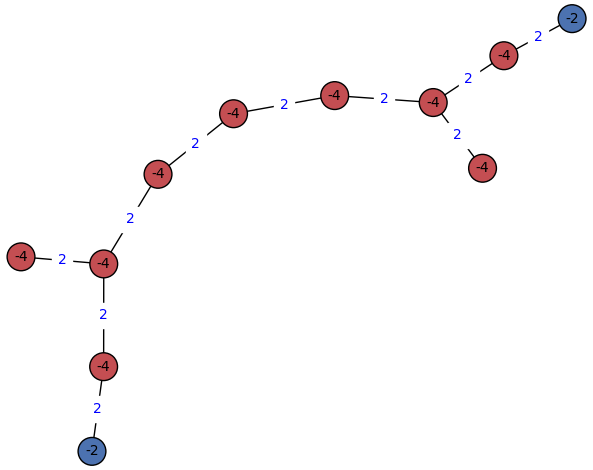

In [1487]:




graph = plot_coxeter_diagram(roots_in_Lp, Lp)
graph

In [1139]:
for i in [0,..,4]:
    for j in [i,..,4]:
        print(i, j)

0 0
0 1
0 2
0 3
0 4
1 1
1 2
1 3
1 4
2 2
2 3
2 4
3 3
3 4
4 4


In [966]:
AL = L.AL()
a,b = AL[1:3]
a.q()

set( [ x.q() for x in (U_2 @ E8_2).discriminant_group() ] )

D8.twist(2)

Lattice of degree 8 and rank 8 over Integer Ring
Decomposition: D8(-1)(2)
Gram matrix:
[-4  2  0  0  0  0  0  0]
[ 2 -4  2  0  0  0  0  0]
[ 0  2 -4  2  0  0  0  0]
[ 0  0  2 -4  2  0  0  0]
[ 0  0  0  2 -4  2  0  0]
[ 0  0  0  0  2 -4  2  2]
[ 0  0  0  0  0  2 -4  0]
[ 0  0  0  0  0  2  0 -4]
Signature: (0, 8), Index: -8, Discriminant: 2^10, 
Even, Non-unimodular, Not p-elementary, Length: 8, 
A_L: Multiplicative Abelian group isomorphic to C2^6 x C4^2, 


In [969]:
L.is_isometric( Z.twist(-2)**8 @ U_2 )

Looking for an isometry...
INDEF_FORM_TestEquivalence gmp /tmp/gaptempdirHY26Q2/Mat1.in /tmp/gaptempdirz9X7SM/Mat2.in GAP /tmp/gaptempdirTgiOWy/Test.out


(
      [-2 -1 -1  0 -2 -3 -1 -1 -2 -1]
      [ 1  0  0  0  1  1  0  0  1  1]
      [ 0  0 -1  0  0  0  0 -1  0  0]
      [ 0  0  0  0 -1 -1  0  0 -1  0]
      [ 0  0  0  0  1  0  0  0  0  0]
      [-1 -1  1  1 -2 -2  1  1 -2  0]
      [-1  0  0  0 -1 -1  0  0 -1  0]
      [ 0  0 -1  0  0  0  0  0  0  0]
      [-2 -1  0  0 -2 -3  0  0 -2 -1]
True, [-2 -1 -1  0 -3 -3 -1 -1 -3 -1]
)

In [937]:
def get_delta(L):
    if IntegralLattice( 2*L.dual().gram_matrix() ).is_even():
        return 0
    else:
        return 1



True

In [941]:
Lpp = U_2 @ E8_2
get_delta(Lpp) 
Lpp.rad()

(10, 10, 0)

In [890]:
print( root_basis_matrix.rank(), root_basis_matrix.dimensions(), Groots.rank(), Groots.dimensions() )

RB_basis = root_basis_matrix.row_module().basis_matrix()
Coeff = root_basis_matrix * root_basis_matrix.inverse()
Coeff

10 (11, 10) 10 (11, 11)


[  -1803484  -10133662  -12764226  -14286000   -5417562  -14287718   -5418504  -14019738   -1802838  -15260854]
[ -10133662  -56940428  -71721406  -80272162  -30440950  -80281814  -30446242  -78776052  -10130040  -85749806]
[ -12764226  -71721406  -90339330 -101109748  -38343016 -101121906  -38349682  -99225268  -12759664 -108009316]
[ -14286000  -80272162 -101109748 -113164236  -42914340 -113177842  -42921800 -111055084  -14280894 -120886382]
[  -5417562  -30440950  -38343016  -42914340  -16274052  -42919500  -16276880  -42114504   -5415626  -45842746]
[ -14287718  -80281814 -101121906 -113177842  -42919500 -113191452  -42926962 -111068438  -14282612 -120900918]
[  -5418504  -30446242  -38349682  -42921800  -16276880  -42926962  -16279712  -42121826   -5416568  -45850716]
[ -14019738  -78776052  -99225268 -111055084  -42114504 -111068438  -42121826 -108985244  -14014728 -118633306]
[  -1802838  -10130040  -12759664  -14280894   -5415626  -14282612   -5416568  -14014728   -1802196  -15

In [851]:
#L_dual_basis.inverse() * L_basis

v = vector(QQ, list(roots_vs)[0] )

r_i = Gram10 * v

(Gram10 * v) * Gram10.inverse() * (Gram10 * v)

v * Gram10.T * v
r_i * Gram10.inverse() * r_i

d = lcm( lmap( lambda x: x.denominator(), list(Gram10.inverse())) ) 

dGram10 = d * Gram10.inverse()

(r_i/sqrt(d)) * dGram10 * (r_i/sqrt(d))

r_i/sqrt(d)

(5/7532, 1/1883, 5/7532, 3/3766, 3/3766, 1/1076, 3/3766, 1/1883, 1/1883, -3/7532)

In [833]:
# w0 = Gram10.inverse() * A3_prims[0] * Ld.basis_matrix().inverse()
# show( w0 )

# show( w0 * Gram10 * w0 )

# denom = lcm([x.denominator() for x in w0])
# w0_lat = denom * w0
# gcd_w0 = gcd(list(w0_lat))
# w0_prim = w0_lat / gcd_w0

# show( w0_prim * Gram10 * w0_prim )

L = IntegralLattice(Gram10)
L_dual = L.dual()

L_dual_basis = L_dual.basis_matrix()   # Rows are basis vectors of L^*
L_basis = L.basis_matrix()             # Rows are basis vectors of L

for v in list(roots_vs):  # your v_i in L^*
    # Express v as vector in the coordinate space
    v_vec = vector(QQ, v)
    r_i = Gram10 * vector(QQ, v_vec)
    norm_ri = r_i * Gram10.inverse() * r_i
    print(norm_ri)
    
    # Find coordinates of v in the dual basis
    coords_in_dual_basis = v_vec * L_dual_basis.inverse()
    
    # Check if these coordinates are integral
    if all(c in ZZ for c in coords_in_dual_basis):
        # Then get vector in L by coords in primal basis
        root_in_L = coords_in_dual_basis * L_basis
        print("Root in L:", root_in_L, ": ", root_in_L * Gram10.inverse() * root_in_L)
    else:
        print("Vector not integral in dual basis, not a root in L.")

# a in A3_prims:
#    print( a * G10.inverse() * a )

-4
Root in L: (-1623146, 929106, 735580, 1298630, 1240014, -7530, -1178828, 863060, 115236, 820410) :  -60886545158160043225/14182756
-4
Root in L: (-1363292, 780364, 617818, 1090730, 1041496, -6326, -990107, 724890, 96787, 689068) :  -42952107237722634149/14182756
-4
Root in L: (787094, -450542, -356696, -629730, -601306, 3652, 571636, -418514, -55880, -397832) :  -1168754725265191653/1157776
-4
Root in L: (738136, -422520, -334508, -590560, -563902, 3424, 536079, -392482, -52405, -373086) :  -3147878162043152813/3545689
-4
Root in L: (-1980916, 1133924, 897698, 1584866, 1513328, -9192, -1438665, 1053296, 140637, 1001242) :  -362741350147379696117/56731024
-4
Root in L: (-1672104, 957128, 757770, 1337800, 1277416, -7758, -1214384, 889092, 118712, 845154) :  -16153741606767823249/3545689
-4
Root in L: (10100412, -5781596, -4577314, -8081032, -7716278, 46862, 7335539, -5370598, -717085, -5105192) :  -589419254942426552956/3545689
-2
Root in L: (738136, -422520, -334508, -590560, -563904

In [805]:
L = IntegralLattice( Gram10 )

for a in list(uniq(A3.rows())):
    denom = lcm([x.denominator() for x in a])
    a_lat = denom * a
    gcd_a = gcd(list(a_lat))
    a_prim = a_lat / gcd_a
    #show( Gram10.inverse() * a_prim in L.dual() )

Ld = L.dual()
print( Ld.basis_matrix() )

[         1/14182756   2029593/113462048   23002681/56731024  51477547/113462048       262543/578888   1766385/226924096     1901547/8104432     4351105/4631104   54480843/56731024 208474517/226924096]
[                  0                1/32                5/16                3/32                 1/8                1/64                5/16                1/64                3/16               21/64]
[                  0                   0                 1/2                   0                   0                   0                   0                   0                   0                 1/2]
[                  0                   0                   0                 1/2                   0                   0                 1/2                 1/2                 1/2                   0]
[                  0                   0                   0                   0                 1/2                   0                 1/2                   0                 1/2            

In [770]:
v = Gram10.inverse() * 2*vector( (0, 1, -2, 1, 0, 0, 0, 0, 0, 0)  )
v * Gram10 * v

-4

In [652]:
norms = []
for a in list(uniq(A3.rows())):
    # Scale 'a' to lie in the lattice Z^22
    denom = lcm([x.denominator() for x in a])
    a_lat = denom * a
    gcd_a = gcd(list(a_lat))
    a_prim = a_lat / gcd_a

    # Preimage in Q^10
    x = M.inverse() * B * R * G * R.T * a_prim  # shape: (10×1)

    # Compute norm in Q^10 via the induced Gram matrix
    G10 = M.T * B * R * G * R.T * B.T * M
    norm = (x * G10 * x).simplify_rational()

    print(f"Primitive root:\n\t{a_prim}\n\t{x}\nnorm: {norm}")
    print("-------------------")
    norms.append(norm)

# Analyze norms
from collections import Counter
print(Counter(norms))

ArithmeticError: self must be a square matrix

In [669]:
Q = R * G * R.T 
G10 = A3.T * Q * A3
G10

[ -152    93    24     1   188    55   120    93   -92    28]
[   93    38    34   -80   -75  -133   -95   113    89   128]
[   24    34  -292  -458  -632  -738  -596   138    92   384]
[    1   -80  -458  -910 -1079 -1305 -1043   133    85   608]
[  188   -75  -632 -1079 -1656 -1691 -1500   231   280   836]
[   55  -133  -738 -1305 -1691 -2008 -1573   148   169   900]
[  120   -95  -596 -1043 -1500 -1573 -1392   177   212   772]
[   93   113   138   133   231   148   177    60   107    16]
[  -92    89    92    85   280   169   212   107   -80   -36]
[   28   128   384   608   836   900   772    16   -36  -404]

In [23]:
norms = []
for a in list(uniq(A3.rows())):
    # get a multiple of v that lies in the lattice:
    com_denom = lcm([x.denominator() for x in a])
    a_lat = com_denom * a
    # reduce to primitive
    com_divsor = gcd(list(a_lat))
    a_prim = a_lat / com_divsor
    
    v_primitive = Gram10.inverse() * a_prim
    norm = v_primitive * Gram10 * v_primitive
    print(f"Primitive root:\n\t{a_prim}\n\t{v_primitive}\nnorm: {norm}")
    print("-------------------")
    norms.append(norm)

Counter(norms)

AttributeError: 'FreeQuadraticModule_integer_symmetric_with_category' object has no attribute 'rows'

l0    -3*b0 + 1/2*b1 - b2 - 3/2*b3 - b4 - 3/2*b5 - b6 + 1/2*b7 - b8 + b9
  l1    2*b0 - 3/2*b1 + 2*b2 + 3/2*b3 + b4 + 3/2*b5 + b6 + 1/2*b7 + b8
  l2    b1 - 2*b2 + b3
  l3    -b0 - 1/2*b1 - 7/2*b3 - 3/2*b5 - b6 - 1/2*b7 - b8
  l4    3*b0 + 3/2*b1 + b2 + 3/2*b3 - 3*b4 + 1/2*b5 - b6 + 5/2*b7 + 3*b8 + b9
  l5    -b2 - 2*b3 - b4 - 5*b5 - b6 + b9
  l6    b2 + 2*b3 + 2*b4 + 5*b5 - b9
  l7    -b2 - 2*b3 - b4 - 5*b5 - b6 + b9
  l8    3*b0 + 3/2*b1 + b2 + 3/2*b3 - 3*b4 + 1/2*b5 - b6 + 5/2*b7 + 3*b8 + b9
  l9    -b0 - 1/2*b1 - 7/2*b3 - 3/2*b5 - b6 - 1/2*b7 - b8
  l10   b1 - 2*b2 + b3
  l11   2*b0 - 3/2*b1 + 2*b2 + 3/2*b3 + b4 + 3/2*b5 + b6 + 1/2*b7 + b8
  l12   -3*b0 + 1/2*b1 - b2 - 3/2*b3 - b4 - 3/2*b5 - b6 + 1/2*b7 - b8 + b9
  l13   3*b0 + b1 + b2 + b3 - b7 + 3*b8 + b9
  l14   -2*b0 - b1 - b2 - b3 + b7 - 4*b8 - b9
  l15   3*b0 + b1 + b2 + b3 - b7 + 3*b8 + b9
  l16   5*b0 + 4*b1 + 5*b2 + 6*b3 + 6*b4 + 7*b5 + 6*b6 + 4*b7 + 4*b8 - 3*b9
  l17   2*b1 + 5*b2 + 8*b3 + 11*b4 + 11*b5 + 10*b6 - 3*b9
  l18   2*b1 + 5*b2 + 8*b3 + 11*b4 + 11*b5 + 10*b6 - 3*b9
  l19   5*b0 + 4*b1 + 5*b2 + 6*b3 + 6*b4 + 7*b5 + 6*b6 + 4*b7 + 4*b8 - 3*b9
  l20   6*b0 + 3*b1 - 3*b3 - 6*b4 - 7*b5 - 6*b6 + 5*b7 + 6*b8 + 6*b9
  l21   6*b0 + 3*b1 - 3*b3 - 6*b4 - 7*b5 - 6*b6 + 5*b7 + 6*b8 + 6*b9

# L22 Lattice point pullback

In [375]:
B = preimage_lattice.basis_matrix() 

new_composite = matrix(ZZ, M * B.T)
#show( new_composite )

i = 0
while i < num_tests:
    vi = (ZZ^10).random_element()
    assert vi in ZZ^10, f"{vi}"
    assert B.T * vi in preimage_lattice, f"{B.T * vi}"
    assert new_composite * vi in ZZ^22, f"{M * B.T * vi}"
    i += 1


print( new_composite )

[  6  10   1   4   4   4   4  10   2  -1]
[  2   0   1   1   1   1   1   1   1   0]
[  0   1  -2   1   0   0   0   0   0   0]
[ -1  -1   0  -2   0  -1  -1  -1  -1   0]
[ 10  10   3   8   5   8   8  10   6  -1]
[  0   0   0  -1  -1  -2  -1   0   0   1]
[  1   0   0   2   4   4   0   0   0  -2]
[  0   0   0  -1  -1  -2  -1   0   0   1]
[ 10  10   3   8   5   8   8  10   6  -1]
[ -1  -1   0  -2   0  -1  -1  -1  -1   0]
[  0   1  -2   1   0   0   0   0   0   0]
[  2   0   1   1   1   1   1   1   1   0]
[  6  10   1   4   4   4   4  10   2  -1]
[  1  -1   1   0   0   0   0  -2   3   1]
[ -1   2  -2   0   0   0   0   4  -8  -2]
[  1  -1   1   0   0   0   0  -2   3   1]
[  8   8   1   5   6   4   6   8   4  -3]
[  4   1   1   4  11   4  10   0   0  -3]
[  4   1   1   4  11   4  10   0   0  -3]
[  8   8   1   5   6   4   6   8   4  -3]
[ 16  18   6   2 -12   4 -12  20  12  12]
[ 16  18   6   2 -12   4 -12  20  12  12]


In [436]:
# Define polyhedron: Ax ≥ b
N = 1

ineqs = [(0,) + tuple(A3.row(i) ) for i in range(22)]

# Add box constraints: -v_i ≤ N and v_i ≤ N → v_i ≥ -N and v_i ≤ N
for i in range(10):
    unit_vector = [0]*10
    unit_vector[i] = 1
    ineqs.append((N,) + tuple(-x for x in unit_vector))  # -v_i ≤ N ⇒ v_i ≥ -N
    ineqs.append((N,) + tuple(unit_vector))              # v_i ≤ N

P = Polyhedron(
    ieqs=ineqs
)
P.is_compact()
print(P)
P.some_elements()
#P.integral_points_count()

A 10-dimensional polyhedron in QQ^10 defined as the convex hull of 3867 vertices


[(1889075264754607226266999420196099843217860334531216984679941886407925466212484010380783476489111880527413163737624994874785547516550202969452005491075906141974959072688655635799194094118183058690544918824427676852996046342855394051327052045157512660852131735691853933712965629260383394349437648692949127546404657961943739358510480063506046736654577156040885323332689319537072808555522320752154230517884638210536122048071238615019082379303444300036457363245993565094933003975099643141633/2396991937289458301630819165172839946014921082705426037651395032158404959878431301968063924518933034035639649166353695122609471543013698293307280588430017192645024521657809690737453931595198122175294911474306207151592510411372441427374481990219071604700250759076301056377137773358755806928608074026199950269407332909390806162410351944766667900608055781330302745205308336660796090432881927615646605328408882069404895052467390586680599595064116306650278635606589800410743199222102410400000, 193203129112976416936

In [386]:
def random_candidate(N):
    while True:
        v = vector([ZZ.random_element(-N, N+1) for _ in range(10)])
        image = new_composite * v
        if all(x >= 0 for x in image):
            return v, image

random_candidate(2)

((2, 1, -1, -2, 2, -2, 1, 1, 1, -1),
 (30, 4, 1, 0, 30, 2, 0, 2, 30, 0, 1, 4, 30, 0, 0, 0, 38, 27, 27, 38, 16, 16))

In [543]:
from sage.geometry.cone import Cone as sageCone
# Suppose you have two inequalities:
# x1 + 2 x2 >= 0 and -x1 + x2 >= 0
ineqs = [
    (0, 1, 2),
    (0, -1, 1)
]

P = Polyhedron( ieqs = ineqs )
P.rays()
C = sageCone( P.rays() ) 

print("Rays of cone:", C.rays())
print("------------")
print("Rays of cone:", C.dual().rays() )

i = 0
while i < 10^2:
    w = C.random_element()
    assert w[0] + 2w[1] >= 0
    assert -w[0] + w[1] >= 0
    i += 1

P.vertices()

Rays of cone: N( 1, 1),
N(-2, 1)
in 2-d lattice N
------------
Rays of cone: M(-1, 1),
M( 1, 2)
in 2-d lattice M


(A vertex at (0, 0),)

In [731]:
ineqs = [(0,) + tuple(A3.row(i) ) for i in range(22)]
P = Polyhedron( ieqs = ineqs )

i = 0
while i < 10^4:
    vi = P.an_element()
    assert all([ lij >= 0 for lij in (A3 * vi) ])
    i += 1

extremal_rays = P.rays()  # generators of the cone as vectors
print(len(extremal_rays))

facets = P.facets()
f0 = facets[0]
f0
P

26


A 10-dimensional polyhedron in QQ^10 defined as the convex hull of 1 vertex and 26 rays (use the .plot() method to plot)

In [740]:
i = 0
while i < 10^3:
    v = random_vector(QQ, 10)
    x = A3 * v                          # in Q^22
    x_lattice = R.transpose() * x      # in Q^20, lattice coordinates
    
    # 1. Norm via original Gram matrix
    norm1 = x_lattice * G * x_lattice
    
    # 2. Norm via G10
    norm2 = v * G10 * v
    
    assert norm1 == norm2
    i += 1


# Composite map
map_to_lattice = R.transpose() * A3  # (20 x 10) matrix

# Then compute: G10_alt = map_to_lattice^T * G * map_to_lattice
G10_alt = map_to_lattice.transpose() * G * map_to_lattice

assert G10_alt == G10

In [556]:
def angle(alpha, beta):
    return acos(alpha.inner_product(beta) / (sqrt(alpha.norm()) * sqrt(beta.norm()))) / pi

roots[0] * L_20_2_0.gram_matrix() * roots[0]

TypeError: unsupported operand parent(s) for *: 'Ambient free module of rank 22 over the principal ideal domain Integer Ring' and 'Full MatrixSpace of 20 by 20 dense matrices over Integer Ring'

In [44]:
#cone = Cone(P.rays())
#summarize_cone(cone)

def summarize_cone(cone):
    print(
        f"Dim: {cone.dim()}\n",
        f"Closed: {cone.is_closed()}\n",
        f"Compact: {cone.is_compact()}\n",
        f"Full-dim: {cone.is_full_dimensional()}\n",
        f"Finite: {cone.finite()}\n",
        f"Simplicial: {cone.is_simplicial()}\n",
        f"Number of rays: {cone.nrays()}\n",
        cone,
        cone.some_elements()
    )
    P = cone.polyhedron()
    print("-----------")

    print(
        f"{P.dim()}",
        f"{P.is_closed()}",
        f"{P.is_compact()}",
        f"{P.is_finite()}",
        f"{P.is_full_dimensional()}",
        f"{P.is_lattice_polytope()}",
        f"{P.is_open()}",
        #P.is_simplicial()
        f"{len( P.Hrepresentation() )}",
        f"{P.Hrepresentation()}",
        f"{P.f_vector()}",
        f"{P.hyperplane_arrangement()}",
        f"{len( P.rays() )}"
    )

#sgs = cone.semigroup_generators()
#hilbert_basis = cone.Hilbert_basis()

In [496]:
i = 0
while i < 10^4:
    vi = cone.random_element()
    assert vi in cone
    wi = new_composite * vi
    assert all([ wij >=0 for wij in wi])
    i += 1

In [518]:
rays = cone.rays()
integral_rays = []
for r in rays:
    denom = lcm([x.denominator() for x in r])
    ri = denom * vector(r)
    assert ri in cone
    integral_rays.append( vector(ZZ, ri ) )

primitive_integral_rays = []
for r in integral_rays:
    ri = vector(ZZ, list(r))   # convert lattice vector r to integer vector
    g = gcd(ri.list())
    primitive_ri = ri / g  # now integer division works
    primitive_integral_rays.append(primitive_ri)
    
# show( table(columns=[ 
#     lmap(lambda x: vector(x), primitive_integral_rays), 
#     [new_composite * r for r in primitive_integral_rays] 
# ] ) )

In [537]:
ineqs = [(0,) + tuple(new_composite.row(i) ) for i in range(22)]
P = Polyhedron( ieqs = ineqs )
P

C = Cone(cone = P.rays())
#C.setVerbose(True)

#hb = C.HilbertBasis()
#print(hb)

C.WriteOutputFile("mycone.nmz")
C.SetVerbose(True)
#C.print_properties()

D = Cone(polytope = P.vertices() )
# D.print_properties()
P.vertices()

(A vertex at (0, 0, 0, 0, 0, 0, 0, 0, 0, 0),)

In [ ]:
Q = (d * composite).change_ring(ZZ) 
ineqs = [(0,) + tuple(row) for row in Q.rows()]
cone = Cone(ineqs)
summarize_cone(cone)
#P.integral_points_count()

In [ ]:
print( composite.right_kernel() )
print( composite_lens.right_kernel() )
print( composite.rank() )
print( composite_lens.rank() )

print( Q.saturation().det() )

for ray in cone.rays():
    #print(ray)
    print( Q * ray[1:11] )

In [65]:


def e22(i):
    v = [0] * 20
    v[i] = 1
    return vector(v)

ineqs = [ (0,) + tuple(( w * L_20_2_0.gram_matrix() )) for w in W ]  # each inequality is (0,) + normal vector

ineqs += [
    (5,) + tuple(-1 if j == i else 0 for j in range(20))  # -x_i ≤ 5 → x_i ≥ -5
    for i in range(20)
]
ineqs += [
    (5,) + tuple( 1 if j == i else 0 for j in range(20))  #  x_i ≤ 5
    for i in range(20)
]


In [67]:
ineqs = [(0,) + tuple(vector(QQ, row )) for row in composite_lens.rows()]
P = Polyhedron( ieqs=ineqs, backend='normaliz')
P.is_closed()
#pgens = P.integral_points_generators()
#print( pgens )

True

In [73]:
P.truncation

(An inequality (-2, -1, -1, -1, 0, 0, 0, 1, -4, -1) x + 0 >= 0,
 An inequality (-2, -1, 0, -7, 0, -3, -2, -1, -2, 0) x + 0 >= 0,
 An inequality (-1, 5, 3, 3, 4, 4, 4, 5, 2, -1) x + 0 >= 0,
 An inequality (0, 0, -1, -2, -1, -5, -1, 0, 0, 1) x + 0 >= 0,
 An inequality (0, 0, 1, 2, 2, 5, 0, 0, 0, -1) x + 0 >= 0,
 An inequality (0, 1, -2, 1, 0, 0, 0, 0, 0, 0) x + 0 >= 0,
 An inequality (0, 2, 5, 8, 11, 11, 10, 0, 0, -3) x + 0 >= 0,
 An inequality (3, 1, 1, 1, 0, 0, 0, -1, 3, 1) x + 0 >= 0,
 An inequality (4, -3, 4, 3, 2, 3, 2, 1, 2, 0) x + 0 >= 0,
 An inequality (5, 4, 5, 6, 6, 7, 6, 4, 4, -3) x + 0 >= 0,
 An inequality (6, 3, 0, -3, -6, -7, -6, 5, 6, 6) x + 0 >= 0,
 An inequality (6, 5, 7, 11, 5, 12, 8, 5, 6, -1) x + 0 >= 0)

In [158]:
# cone_generators = [vector(QQ,v) for v in [[1.1, 2.3], [3, 0.2]]]
# lattice_generators = [vector(QQ,v) for v in [[1, 0], [0.2, 0.3]]]
# L = len(lattice_generators)

# def get_backend_index(mip_var):
#     return int(str(mip_var)[2:])

# milp = MixedIntegerLinearProgram(solver='ppl')
# c = milp.new_variable(real=True,nonnegative=True)
# n = milp.new_variable(integer=True)
# Eq = sum(c[i]*v for i,v in enumerate(cone_generators)) - sum(n[i]*v for i,v in enumerate(lattice_generators))
# for e in Eq: milp.add_constraint( e == 0 )
# P = milp.polyhedron(backend='normaliz')

# # computing projection on n-plane
# V = [vector(v[get_backend_index(n[i])] for i in range(L)) for v in P.vertices()]
# R = [vector(v[get_backend_index(n[i])] for i in range(L)) for v in P.rays()]
# projP = Polyhedron(backend='normaliz', vertices=V, rays=R)
# print( projP.integral_points_generators() )

(((0, 0),), ((-13, 230), (-10, 177), (-7, 124), (-4, 71), (-1, 18), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (17, 4), (30, 7), (43, 10)), ())


In [45]:

# P = Polyhedron(ieqs=ineqs)

#|P.random_integral_point()
# P.volume()

In [46]:

# ineqs = [ (0,) + tuple(row) for row in composite_lens.rows() ]
# P = Polyhedron( ieqs = ineqs )
# display(
#     P.dim(),
#     P.is_closed(),
#     P.is_compact(),
#     P.is_finite(),
#     P.is_full_dimensional(),
#     P.is_lattice_polytope(),
#     P.is_open(),
#     #P.is_simplicial()
#     len( P.Hrepresentation() ),
#     P.Hrepresentation(),
#     P.f_vector(),
#     P.hyperplane_arrangement(),
#     len( P.rays() ),
# )

# P

In [1]:
M_scaled = 4*composite
P = Polyhedron(ieqs=[(0,)+tuple(row) for row in M_scaled.rows() ])
congruence_lattice = MatrixSpace(ZZ, 22, 10)(M_scaled)
# Apply congruence condition mod 4, intersect with P
# Remove redundant inequalities
P_full = Polyhedron(ieqs=[(0,) + tuple(row) for row in M_scaled.rows()[0:5] ])
#P_simplified = P_full.minimal_representation()
P_full.Hrepresentation()
#print(P_simplified)
#show(P_simplified.integral_points())

NameError: name 'composite' is not defined

# Older Tests

In [1583]:
s3 = Sterk3()
s3.plot_IAS_ell(
    project_up_Sterk3([
        1,1,1,1,1,
        1,1,1,1,1
    ])
)

a0   a1   a2   a3   a4   a5   a6   a7   a8   a9
  1    1    1    1    1    1    1    1    1    1
  a0   a1   a2   a3   a4   a5   a6   a7   a8   a9
  1    1    1    1    1    1    1    1    1    1
  l0   l1   l2   l3   l4   l5   l6   l7   l8   l9
  1    1    1    1    1    1    1    1    1    1
  a0   a1   a2   a3   a4   a5   a6   a7   a8   a7

TypeError: no conversion of this rational to integer

In [405]:
R.<l0, l1, ..., l21> = PolynomialRing(QQ, 22)

V = VectorSpace(QQ, 20)
l = V.basis()

constraint1 = (
    l[0] + l[1] - l[10] - l[11] - l[12] - 1/2*l[13] + 1/2*l[15] + 1/2*l[16] 
    + 1/2*l[17] - 1/2*l[18] - 1/2*l[19] + l[2] + l[3] + l[4] + 1/2*l[5] - 1/2*l[7] - l[8] - l[9]
)
constraint2 = (
    -l[0] - 1/2*l[1] - 1/2*l[11] - l[12] - l[13] - l[14] - l[15] - 1/2*l[16] 
    + 1/2*l[17] + 1/2*l[18] - 1/2*l[19] + 1/2*l[3] + l[4] + l[5] + l[6] + l[7] + l[8] + 1/2*l[9]

)

constraint3 = (
    l[0] + 1/2*l[16] - l[8] - 1/2*l[18]
)

symmetry_eqns1 = [l[i] - l[16 - i] for i in range(1,8-1)]
symmetry_eqns2 = [ l[17] - l[19] ]
eqs = [constraint1] + [constraint2] + [constraint3] + symmetry_eqns1 + symmetry_eqns2
A = Matrix(QQ, [v for v in eqs])
N = A.right_kernel()

evens = [1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2]
soln_projection_18_2_0 = matrix(QQ, lmap(
    lambda l: l[0] * l[1], zip(evens, matrix(N.basis()).columns() )
))
show( soln_projection_18_2_0 )
soln_projection_18_2_0

20 x 10 dense matrix over Rational Field (use the '.str()' method to see the entries)

20 x 10 dense matrix over Rational Field (use the '.str()' method to see the entries)

In [403]:
#IASTest.M_18_2_0 * 
IASTest.ell_18_2_0

S.<a0, ..., a10> = PolynomialRing(QQ, 11)
a_vector = vector(SR, [a0, a1, a2, a3, a4, a5, a6, a7, a8, a9, a10] )

table([
    list( IASTest.ell_18_2_0 ),
    list( soln_projection_18_2_0 * a_vector )
])

l0   l1     l2   l3     l4   l5     l6   l7     l8   l9     l10   l11    l12   l13    l14   l15    l16    l17     l18                                                            l19
  a0   2*a1   a2   2*a3   a4   2*a5   a6   2*a7   a8   2*a7   a6    2*a5   a4    2*a3   a2    2*a1   2*a9   2*a10   4*a0 + 6*a1 + 4*a2 + 2*a3 - 2*a5 - 4*a6 - 6*a7 - 4*a8 + 2*a9   2*a10

In [379]:
IASTest = IAS_18_2_0( zero_matrix(ZZ, 10) )

M = IASTest.M_18_2_0_Full * IASTest.ell_18_2_0_Full

dir_vecs = {}
surg_vecs = {}
for i, (label, v) in enumerate( IASTest.direction_vectors_18_2_0.items() ):
    dir_vecs[label] = v * M[i]
for i, (label, v) in enumerate( IASTest.surgery_vectors_18_2_0.items() ):
    surg_vecs[label] = v * M[i+16]

dir_vecs, surg_vecs
# IASTest.ell_18_2_0_Full

({'v_0': (l0 + 1/2*l16, -l0 - 1/2*l16),
  'v_1': (l1, -1/2*l1),
  'v_2': (l2, 0),
  'v_3': (l3, 1/2*l3),
  'v_4': (1/2*l17 + l4, 1/2*l17 + l4),
  'v_5': (1/2*l5, l5),
  'v_6': (0, l6),
  'v_7': (-1/2*l7, l7),
  'v_8': (-1/2*l18 - l8, 1/2*l18 + l8),
  'v_9': (-l9, 1/2*l9),
  'v_10': (-l10, 0),
  'v_11': (-l11, -1/2*l11),
  'v_12': (-l12 - 1/2*l19, -l12 - 1/2*l19),
  'v_13': (-1/2*l13, -l13),
  'v_14': (0, -l14),
  'v_15': (1/2*l15, -l15)},
 {'v_16': (1/2*l16, 0),
  'v_17': (0, 1/2*l17),
  'v_18': (-1/2*l18, 0),
  'v_19': (0, -1/2*l19)})

In [467]:
L = LineSegment( (0,4), (4,0) )
edge_points = OrderedSet( L.integral_points() )

p0 = vector( (0,0) )
v_prim = vector( (1,1) )
int_pt = None
for n in range(100):
    vn = p0 + n*v_prim
    vn.set_immutable()
    if vn in edge_points:
        int_pt = vn
        print(int_pt)
        break

(2, 2)


In [461]:
poly_pts = get_polytope_points_SR(dir_vecs)
surg_indices = [0,4,8,12]
for i, index in enumerate( surg_indices ):
    if i in [2,3]: continue
    si = list(surg_vecs.values())[i]
    surg_size = IASTest.ell_18_2_0_Full[16+i]/2
    p_i = vector(SR, poly_pts[f"p_{{{index}}}"])
    p_i1 = vector(SR, poly_pts[f"p_{{{index + 1}}}"])
    apex = p_i + si

    si2 = list(surg_vecs.values())[i+2]
    q_i = vector(SR, poly_pts[f"p_{{{index + 8}}}"])
    q_i1 = vector(SR, poly_pts[f"p_{{{index + 8 + 1}}}"])
    apex2 = q_i1 + Matrix(SR, 2, [0, -1, 1,0] ) * si2

    print( (apex - apex2).norm()^2 )


abs(l0 + 1/2*l1 + 1/2*l16 - 1/2*l17 - 1/2*l3 - l4 - l5 - l6 - l7 - l8)^2 + abs(-l0 - l1 - 1/2*l17 + 1/2*l18 - l2 - l3 - l4 - 1/2*l5 + 1/2*l7 + l8)^2
abs(l10 + l11 + l12 - 1/2*l17 + 1/2*l18 - l4 - 1/2*l5 + 1/2*l7 + l8 + l9)^2 + abs(1/2*l11 + l12 - 1/2*l18 + 1/2*l19 - l4 - l5 - l6 - l7 - l8 - 1/2*l9)^2


In [388]:
l0 + 1/2*l1 + 1/2*l16 - 1/2*l17 - 1/2*l3 - l4 - l5 - l6 - l7 - l8

l0 + 1/2*l1 - 1/2*l3 - l4 - l5 - l6 - l7 - l8 + 1/2*l16 - 1/2*l17

In [374]:
def get_polytope_points_SR(plot_vectors):
    initial_pos = vector([0, 0])
    current_pos = initial_pos
    pts = {
        "p_{0}": initial_pos
    }    
    for i, vi in enumerate( [v for v in plot_vectors.keys()]):
        new_pos = vector(SR, current_pos + plot_vectors[vi] )
        pts[f"p_{{{i+1}}}"] = new_pos
        current_pos = new_pos
    return pts


    


In [8]:
def do_surgeries(surgery_sizes, surgery_edges, surgery_vectors, M=None):
    
    g = Graphics()
    triangles = []

    for x in surgery_edges:
        g += arrow( x[0], x[1], color="blue")
        if M is not None: g += arrow( M*x[0], M*x[1], color="blue")
    
    for nth in range(len(surgery_sizes)):
        #print(f"--------- Surgery {nth} -------------")
        p_vec = surgery_edges[nth][0]
        n_vec = surgery_edges[nth][1]
        surg_dir = surgery_vectors[nth]
        surg_size = surgery_sizes[nth]
        edge_len = lat_len( p_vec, n_vec )
        edge = n_vec - p_vec
        d = gcd(edge)
        prim_edge = edge/d
        #print(f"Edge in direction e={prim_edge} of length {d}.")
        #print(f"Surgery in direction {surg_dir} of size {surg_size} along {p_vec} ---> {n_vec} = {edge}, length {edge_len}.")

        if surg_size > edge_len:
            print(f"Surgery too large for this edge: surgery size = {surg_size}, edge length = {edge_len}")
            continue
        elif (int(edge_len) - int(surg_size)) % 2 == 0:
            print(f"Surgery {nth}: edge length and surgery size have the same parity.")
            if nth == 0 or nth == 1:
                surg_start_n = abs( floor(edge_len/2) - floor(surg_size/2) )
                surg_end_n = abs( ceil(edge_len/2) + floor(surg_size/2) )
            else:
                surg_start_n = abs( floor(edge_len/2) - floor(surg_size/2) )
                surg_end_n = abs( ceil(edge_len/2) + floor(surg_size/2) )
                
        elif (int(edge_len) - int(surg_size)) % 2 == 1:
            print(f"Surgery {nth}: Edge length and surgery size have different parity.")
            if nth == 0:
                surg_start_n = abs( floor(edge_len/2) - floor( (surg_size - 1)/2) )
                surg_end_n = abs( ceil(edge_len/2) + floor((surg_size+1)/2) )
            elif nth == 1:
                surg_start_n = abs( floor(edge_len/2) - floor( (surg_size - 1)/2) )-1
                surg_end_n = abs( ceil(edge_len/2) + floor((surg_size+1)/2) )-1
            else:
                surg_start_n = abs( floor(edge_len/2) - floor( (surg_size - 1)/2) )
                surg_end_n = abs( ceil(edge_len/2) + floor((surg_size+1)/2) )
            
            
        base_l = vector(ZZ, p_vec + surg_start_n * prim_edge)
        apex = vector(ZZ, base_l + surg_size * surg_dir)
        base_r = vector(ZZ, p_vec + surg_end_n * prim_edge)
        P = Polyhedron([ base_l, apex, base_r ])
        if P.dimension() > 0:
            triangles.append(P)
        g += P.plot(color="red", alpha=0.3)
        if M is not None: 
            P_ref = Polyhedron([ M*base_l, M*apex, M*base_r ])
            if P_ref.dimension() > 0:
                triangles.append(P_ref)
            g += P_ref.plot(color="red", alpha=0.3)
        #print(f"Triangle {base_l}, {apex}, {base_r}")
        #print(f"Surgery start: {p_vec} + {surg_start_n} * {prim_edge} = {p_vec + surg_start_n * prim_edge}")
        #print(f"Apex: {base_l} + {surg_size} * {surg_dir} = {base_l + surg_size * surg_dir}")
        #print(f"Surgery end: {p_vec} + {surg_end_n} * {prim_edge} = {p_vec + surg_end_n * prim_edge}")
    return (g, triangles)

l0   l1   l2   l3   l4   l5   l6   l7   l8   l9   l10   l11   l12   l13   l14   l15   l16   l17   l18   l19
  2    0    0    0    0    0    0    0    0    0    0     0     0     0     0     0     2     4     6     4

Aut(P) = D4, order 8 with 3 generators:


[ 13/12   5/12]
[ -5/12 -13/12]

[ 0 -1]
[-1  0]

[-13/12  -5/12]
[  5/12  13/12]

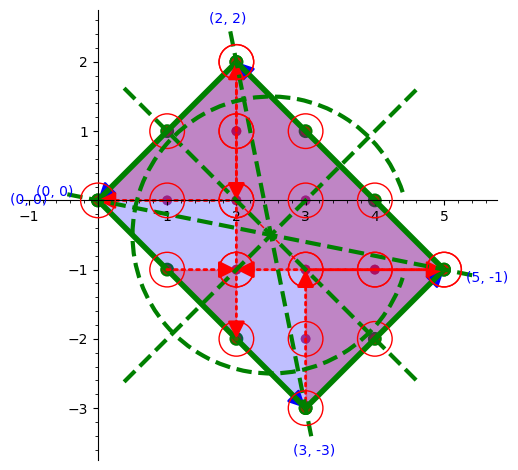

In [597]:
s1 = Sterk1()

s1.plot_IAS_ell(
    [2] + ([0]*15) + [2,4,6,4]
)

In [9]:
plt.clf()

example_ells = [2] + ([0]*15) + [2,4,6,4,0,4]
example_ells_poly = example_ells[0:15]
example_ells_surg = example_ells[16:20]
surgery_sizes = [ s/2 for s in example_ells[16:20] ]

scaled_vects, plot_vecs, surg_vecs = example_to_vecs(example_ells)

poly_pts = get_polytope_points(plot_vecs)

# plg, triangles = do_surgeries( surgery_sizes, s_edges, s_vecs)

# full_poly = sPolygon( poly_pts.values() )
# original_poly = full_poly
# full_edges = s_edges 
# cuts = []
s_edges = [
    (poly_pts["p_{0}"], poly_pts["p_{1}"]),
    (poly_pts["p_{4}"], poly_pts["p_{5}"]),
    (poly_pts["p_{8}"], poly_pts["p_{9}"]),
    (poly_pts["p_{12}"], poly_pts["p_{13}"]),
]
s_edges

[((0, 0), (3, -3)), ((3, -3), (5, -1)), ((5, -1), (2, 2)), ((2, 2), (0, 0))]

<Figure size 640x480 with 0 Axes>

Surgery 0: edge length and surgery size have the same parity.
Surgery 1: edge length and surgery size have the same parity.
Surgery 2: edge length and surgery size have the same parity.
Surgery 3: edge length and surgery size have the same parity.
Symmetry found that commutes with hemisphere involution: $(1, -3)$.


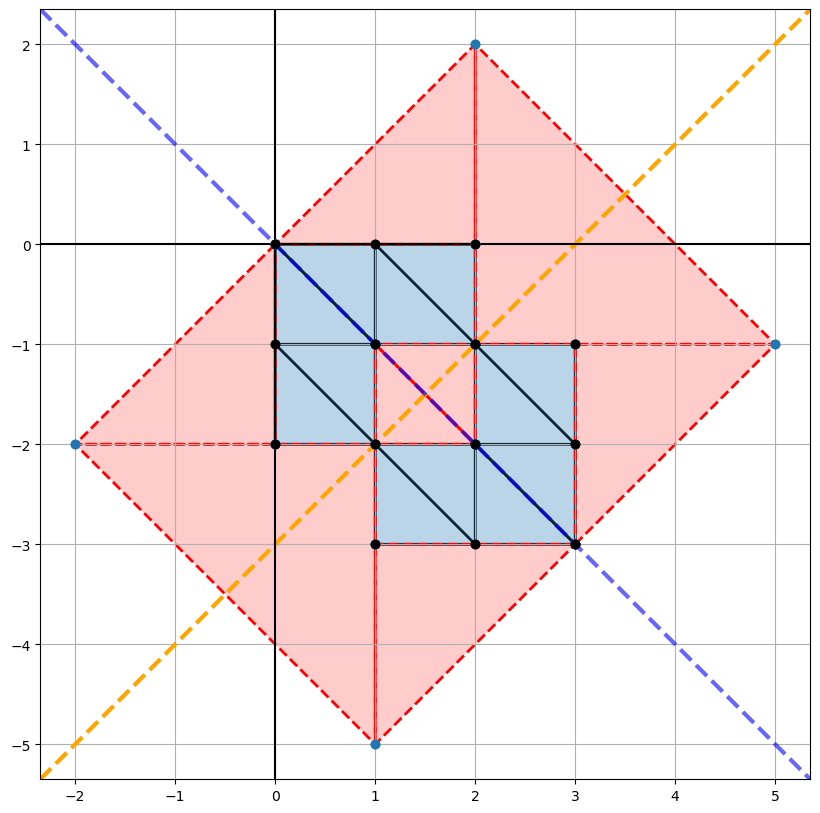

NameError: name 'my_eg1' is not defined

In [12]:
plt.rcParams["figure.figsize"] = (10, 10) # (w, h)


eg413 = [2] + ([0]*15) + [2,4,6,4,0,4]

pl1 = plot_IAS(eg413)
f1 = pl1.show()
f1
# pl1.clf()

pl2 = plot_IAS(my_eg1)
f2 = pl2.show()
f2
# plot_IAS( [1,1,1,1] ).show() 
#plot_IAS( [1,2,3,2] ).show() 
#plot_IAS( [1,2,1,2] ).show()
#plot_IAS( [2,1,2,1] ).show()

In [11]:
def plot_IAS(example_ells):
    plt.clf()

    # eg413 = [2] + ([0]*15) + [2,4,6,4,0,4]
    example_ells_poly = example_ells[0:15]
    example_ells_surg = example_ells[16:20]
    surgery_sizes = [ s/2 for s in example_ells[16:20] ]

    scaled_vects, plot_vecs, surg_vecs = example_to_vecs(example_ells)
    
    poly_pts = get_polytope_points(plot_vecs)
    s_edges = [
        (poly_pts["p_{0}"], poly_pts["p_{1}"]),
        (poly_pts["p_{4}"], poly_pts["p_{5}"]),
        (poly_pts["p_{8}"], poly_pts["p_{9}"]),
        (poly_pts["p_{12}"], poly_pts["p_{13}"]),
    ]
    plg, triangles = do_surgeries( surgery_sizes, s_edges, s_vecs)
    
    full_poly = sPolygon( poly_pts.values() )
    original_poly = full_poly
    full_edges = s_edges 
    cuts = []
    if len(triangles) > 0:
        t0 = triangles[0]
        poly_tris = [ sPolygon( t.vertices_list() ) for t in triangles]
        cuts += poly_tris
        cut_area = reduce(lambda a, b: a.union(b), poly_tris)
        remaining_poly = full_poly.difference(cut_area)
    else:
        remaining_poly = full_poly
        
    hemisphere_sym = (-1, 0)
    
    pt_cloud = []
    if remaining_poly.geom_type == "MultiPolygon":
        for geom in remaining_poly.geoms:
            xs, ys = geom.exterior.xy
            pts = list(zip(xs, ys))
            pt_cloud += [ vector(ZZ, v) for v in pts]
    else:
        xs, ys = remaining_poly.exterior.xy
        pts = list(zip(xs, ys))
        pt_cloud += [ vector(ZZ, v) for v in pts]
    
    sym_lines = list(find_symmetry_lines([ Point(x[0], x[1]) for x in pt_cloud ]))
    for l in sym_lines:
        if check_sym_commute( hemisphere_sym[0], hemisphere_sym[1], l[0], l[1] ):
            print(f"Symmetry found that commutes with hemisphere involution: ${l}$.")
        
    if len(sym_lines) == 1:
        l = sym_lines[0]
        plt.axline( (0,l[1]), slope=l[0], linewidth=3, linestyle="--", color="orange", label=f"$s_{0}$: $m={l[1]}, b={l[0]}$")
    elif len(sym_lines) >= 2:
        i = 0
        for a,b in itertools.combinations_with_replacement( sym_lines, 2 ):
            if a == b:
                continue
            else:
                if check_sym_commute( a[0], a[1], b[0], b[1] ):
                    print(f"Found commuting symmetries: $(m_1, b_1) = {a}, (m_2, b_2) = {b}$.")
                    plt.axline( (0,a[1]), slope=a[0], linewidth=3, linestyle="--", color="orange", label=f"$s_{i}$: $m={a[1]}, b={a[0]}$")
                    plt.axline( (0,b[1]), slope=b[0], linewidth=3, linestyle="--", color="orange")
                    i += 1
                else:
                    plt.axline( (0,a[1]), slope=a[0], linewidth=3, linestyle="--", alpha=0.6, label=f"s_{i}")
                    i += 1
                    plt.axline( (0,b[1]), slope=b[0], linewidth=3, linestyle="--", alpha=0.6, label=f"s_{i}")
                    i += 1
    
    plt.axvline(0, color="black")
    plt.axhline(0, color="black")
    plt.axline( (0,hemisphere_sym[1]), slope=hemisphere_sym[0], color="blue", linewidth=3, linestyle="--", alpha=0.6, label=f"Hemisphere: $m={hemisphere_sym[0]}, b={hemisphere_sym[1]}$")
    
    #plt.legend()
    
    ### Split region with line of symmetry
    region_split = False
    if len(sym_lines) > 0:
        split_sym = sym_lines[0]
        m = split_sym[0]
        b = split_sym[1]
        
        line = LineString([ (-2,b-2*m), (4,b+4*m) ])
        regions = list(split(remaining_poly, line).geoms)
        assert len(regions) == 2
        fund_region = regions[0]
        region_split = True
    else:
        fund_region = remaining_poly
    
    ### Get lattice points inside polygon
    perim_points = lmap(lambda x: vector(ZZ, x), shapely.get_coordinates(remaining_poly))
    llx = min( lmap(lambda x: x[0], perim_points) )
    lly = min( lmap(lambda x: x[1], perim_points) )
    urx = max( lmap(lambda x: x[0], perim_points) )
    ury = max( lmap(lambda x: x[1], perim_points) )
    
    points = MultiPoint( list( itertools.product( range(llx-1, urx+1), range(lly-1, ury+1) ) ) )
    points_in_fund_region = points.intersection(fund_region)
    
    nodes = lmap(lambda x: vector(ZZ, x), shapely.get_coordinates(points_in_fund_region))
    xy1 = np.array( nodes )
    
    ### Triangulate using *all* integral points in the polygon
    fund_region_tri = Delaunay(xy1)
    valid_simplices = [ [a,b,c] for a,b,c in fund_region_tri.simplices if fund_region.contains( sPolygon( (xy1[a], xy1[b], xy1[c]) ) ) ]
    
    ref_remaining_poly = []
    if remaining_poly.geom_type == "MultiPolygon":
        for geom in remaining_poly.geoms:
            xs, ys = geom.exterior.xy
            pts = list(zip(xs, ys))
            ref_pts = lmap(lambda p: ref_pt(p, hemisphere_sym[0], hemisphere_sym[1]), pts)
            ref_poly = sPolygon( ref_pts )
            ref_remaining_poly.append(ref_poly)
    else:
        xs, ys = remaining_poly.exterior.xy
        pts = list(zip(xs, ys))
        ref_pts = lmap(lambda p: ref_pt(p, hemisphere_sym[0], hemisphere_sym[1]), pts)
        ref_poly = sPolygon( ref_pts )
        ref_remaining_poly.append(ref_poly)
    
    total_poly = reduce(lambda a,b: a.union(b), ref_remaining_poly).union(remaining_poly)
    # shapely.plotting.plot_polygon( total_poly, alpha=0.05)
    
    ########## Triangulations
    
    # Fundamental triangulation
    plt.triplot(xy1[:, 0], xy1[:, 1], valid_simplices , 'bo-', lw=2, color="black")
    
    if region_split:
        split_sym_xys = np.array( lmap( lambda p: ref_pt(p, m, b), xy1 ) )
        plt.triplot(split_sym_xys[:, 0], split_sym_xys[:, 1], valid_simplices , 'bo-', lw=2, color="black")
    
    hemi_sym_xys = np.array( lmap( lambda p: ref_pt(p, hemisphere_sym[0], hemisphere_sym[1]), xy1 ) )
    plt.triplot(hemi_sym_xys[:, 0], hemi_sym_xys[:, 1], valid_simplices , 'bo-', lw=2, color="black")
    
    if region_split:
        hemi_split_sym_xys = np.array( lmap( lambda p: ref_pt(p, hemisphere_sym[0], hemisphere_sym[1]), split_sym_xys ) )
        plt.triplot(hemi_split_sym_xys[:, 0], hemi_split_sym_xys[:, 1], valid_simplices , 'bo-', lw=2, color="black")
    
    ############ IAS region
    
    shapely.plotting.plot_polygon( total_poly )
    
    for c in cuts:
        ref_c = sPolygon( lmap(lambda p: ref_pt(p, hemisphere_sym[0], hemisphere_sym[1]), shapely.get_coordinates( c )) )
        shapely.plotting.plot_polygon(c, fc=to_rgba("red", 0.2), linewidth=2, linestyle="--", zorder=1, ec=to_rgba("red", 1))
        shapely.plotting.plot_polygon(ref_c, fc=to_rgba("red", 0.2), linewidth=2, linestyle="--", zorder=1, ec=to_rgba("red", 1))
    
    
    ######### Points
    
    # Fundamental nodes
    shapely.plotting.plot_points( points_in_fund_region, color="black")
    
    if region_split:
        split_sym_ref_points = MultiPoint( lmap(lambda p: ref_pt(p, m, b), nodes) )
        shapely.plotting.plot_points( split_sym_ref_points, color="black")
    
    hemi_ref_points = MultiPoint( lmap(lambda p: ref_pt(p, hemisphere_sym[0], hemisphere_sym[1]), nodes) )
    shapely.plotting.plot_points( hemi_ref_points, color="black")
    
    if region_split:
        hemi_split_sym_ref_points = MultiPoint( lmap(lambda p: ref_pt(p, hemisphere_sym[0], hemisphere_sym[1]), shapely.get_coordinates(split_sym_ref_points)) )
        shapely.plotting.plot_points( hemi_split_sym_ref_points, color="black")
    
    ref_original_poly = sPolygon( lmap(lambda p: ref_pt(p, hemisphere_sym[0], hemisphere_sym[1]), shapely.get_coordinates(original_poly) ) )
    new_full_original_poly = ref_original_poly.union(original_poly)
    
    #shapely.plotting.plot_polygon( new_full_original_poly, color="gray", alpha=0.1)
    
    #plt.show()

    return plt

In [ ]:
load("~/gitclones/lines-of-symmetry/symmetry.py")

if not do_3d:
    fig, ax = plt.subplots()
    if remaining_poly.geom_type == "MultiPolygon":
        for geom in remaining_poly.geoms:
            xs, ys = geom.exterior.xy    
            ax.fill(xs, ys, alpha=0.25, fc='cyan', ec='none')
    else:    
        xs, ys = remaining_poly.exterior.xy
        ax.fill(xs, ys, alpha=0.25, fc='cyan', ec='none')

    # Triangles that were cut away
    if len(triangles) > 0:
        for t in poly_tris:
            xys = shapely.get_coordinates(t)
            ax.fill( *zip(*xys), color="red", alpha=0.25, edgecolor="red",linestyle="--", linewidth=3, zorder=100)
    for x in outer_edges:
        # Original polygon edges
        ax.annotate("", xytext=x[0], xy=x[1], 
                    arrowprops=dict(arrowstyle="->", color="blue", alpha=1, linestyle="dashed", linewidth=2),
                    zorder=1
                   )
    
    ax.grid(which="both", alpha=0.4)

################### 3d ################
else:
    z_lower = -0.05
    ax = plt.figure().add_subplot(projection='3d')

    # Grid at z=0
    xs, ys = np.meshgrid(range(xmin, xmax+1), range(ymin, ymax))
    zs = np.array( xs * [0] )
    ax.plot_wireframe(xs, ys, zs, color ='gray', alpha=0.2)
    
    # Triangles that were cut away
    if len(triangles) > 0:
        for t in poly_tris:
            xs, ys = shapely.get_coordinates(t)[:,0], shapely.get_coordinates(t)[:,1]
            zs = np.array( xs.size * [z_lower] )
            xyzs = list(zip(xs, ys, zs))
            ax.add_collection3d(Poly3DCollection([xyzs], alpha=0.25, color="red", linestyle="--"))
    
    for p1, p2 in outer_edges:
        x = p1[0]
        y = p1[1]
        z = z_lower
        xp = p2[0]
        yp = p2[1]
        zp = z_lower
        u = xp - x
        v = yp - y
        w = 0
        ax.quiver(
            x,y,z,
            u,v,w,
            color = 'blue', alpha = .5, lw = 2, arrow_length_ratio=0.05
            )

    # The actual remaining IAS area
    if remaining_poly.geom_type == "MultiPolygon":
        for geom in remaining_poly.geoms:
            xs, ys = geom.exterior.xy
            zs = np.array(xs).size * [0]
            xyzs = list(zip(xs, ys, zs))
            ax.add_collection3d(Poly3DCollection([xyzs], alpha=0.5, color="cyan"))
    else:    
        xs, ys = remaining_poly.exterior.xy
        # ax.fill(xs, ys, alpha=0.25, fc='cyan', ec='none')
        
    ax.set_proj_type('persp', focal_length=0.1)
    ax.view_init(elev=55., azim=-90)
    ax.grid(False)
    ax.set_zlim(-0.2, 0.2)


# Triangulation of remaining polygon.
ax.triplot(xy1[:, 0], xy1[:, 1], valid_simplices, 'bo-', lw=2, color="black")
ax.scatter(*zip(*nodes), color="blue", zorder=2)

xmin, xmax = (-2, 5)
ymin, ymax = (-5, 2)

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks(range(xmin,xmax))
ax.set_yticks(range(ymin, ymax))

ax.plot( [0, 0], [-5, 3], [0,0], color="black" )
ax.plot( [-2, 5], [0, 0], [0,0], color="black" )

ax.plot( [-2, 5], [2, -5], [0,0], color="blue", linestyle="--", linewidth=2) 

pts = [ Point(x[0], x[1]) for x in lmap(lambda x: x[0], s_edges) ]
sym_lines = find_symmetry_lines(pts)

# for l in sym_lines:
#     ax.axline( (0,l[1]), slope=l[0], linewidth=3, linestyle="--", color="orange")

plt.tight_layout()
plt.show()

# Manual Tests

Corners: [0, 9, 17, 8].


/tmp/ipykernel_836862/2365753406.py:69: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.figure().add_subplot(projection="3d")


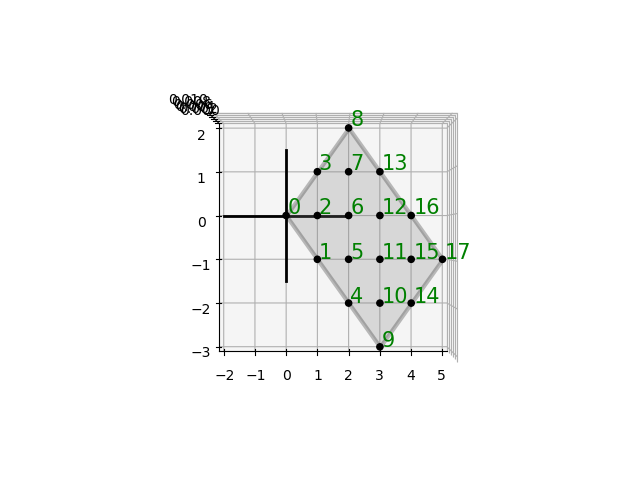

In [1288]:
#%matplotlib notebook

global full_poly
global point_lookups
global fig
global ax

def sPoly_int_pts(poly):
    bd_verts = lmap(lambda x: vector(ZZ, (x[0], x[1], 0)), shapely.get_coordinates(poly))
    int_pts = lmap(lambda x: vector(ZZ, x), Polyhedron(bd_verts).integral_points())
    int_pts.sort()
    return int_pts

def get_labeled_full_poly(full_poly_verts):
    full_poly = sPolygon(full_poly_verts)
    full_poly_points = sPoly_int_pts(full_poly)
    
    point_lookups = dict( list(zip( 
        range(len(full_poly_points)), 
        full_poly_points
    )))
    return full_poly, point_lookups

def reverse_pt_lookup(pt):
    p = vector(ZZ, pt)
    ls = [x for x in point_lookups.keys() if point_lookups[x] == p]
    if len(ls) > 0:
        return ls[0]
    else:
        raise ValueError(f"{p} not found.")

pverts = [(0,0,0), (3,-3,0), (5,-1,0), (2,2,0)]
full_poly, point_lookups = get_labeled_full_poly(pverts)

full_poly_corners = [ reverse_pt_lookup(p) for p in pverts ]

#full_poly_edges = ?


############## Plots

def init_plot_only_2d():
    plt.clf()
    global ax
    ax = plt.figure().add_subplot()
    ax.set_xlim(-2, 5)
    ax.set_ylim(-3, 2)
    ax.plot( [0, 0], [-1.5, 1.5], color="black", lw=2)
    ax.plot( [-2, 2], [0, 0], color="black", lw=2)
    # ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)

def init_plot_2d_strict():
    plt.clf()
    global ax
    global fig
    fig = plt.figure()
    ax = fig.add_subplot(111)
    # ax = plt.figure().add_subplot()
    ax.set_xlim(-2, 5)
    ax.set_ylim(-3, 2)
    # ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
    # ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
    # ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)
    # ax.view_init(90, -90, 0)
    
def init_plot_2d():
    plt.clf()
    global ax
    ax = plt.figure().add_subplot(projection="3d")
    ax.set_xlim(-2, 5)
    ax.set_ylim(-3, 2)
    ax.set_zlim(0, 0.01)
    ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
    ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
    # ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)
    ax.view_init(90, -90, 0)

def sPoly2d_to_3d_points(poly):
    return np.array( list(poly.exterior.xy) + [ np.zeros(len(poly.exterior.xy[0])) ] ).T

def plot_sPoly(poly, color="gray", dim=3):
    global ax
    polys = []
    if poly.geom_type == "MultiPolygon":
        for p in poly.geoms:
            polys.append(p)
    else:
        polys.append(poly)
        
    for each_poly in polys:
        if dim == 3:
            ax.add_collection3d(
                Poly3DCollection(
                    [sPoly2d_to_3d_points(each_poly)], 
                    alpha=0.25, color=color, ec="black", lw=3
            ))
        else:
            ax.add_patch(plt.Polygon(
                np.array( each_poly.exterior.xy ).T, 
                alpha=0.25, color=color, ec="black", lw=3
            ))

def plot_sPoly_pts(poly):
    pts = np.array( sPoly_int_pts(poly) )
    ax.scatter( 
        pts[:,0], 
        pts[:,1], 
        pts[:,2], 
        color="black" 
    )

def plot_point_lookups(lookup):
    for s in lookup:
        p = lookup[s]
        ax.text(
            p[0]+0.05, 
            p[1]+0.02, 
            p[2]+0.001, 
            s, color='green', size=15
        )


init_plot_2d()
plot_sPoly(full_poly)
plot_sPoly_pts(full_poly)
plot_point_lookups(point_lookups)
print(f"Corners: {full_poly_corners}.")

 Surgery 0 at points (1, 5, 4) = ((1, -1, 0), (2, -1, 0), (2, -2, 0)).
        Glue points: [(1, 4)] = [((1, -1, 0), (2, -2, 0))].
        
 Surgery 1 at points (14, 15, 17) = ((4, -2, 0), (4, -1, 0), (5, -1, 0)).
        Glue points: [(14, 17)] = [((4, -2, 0), (5, -1, 0))].
        
 Surgery 2 at points (16, 12, 13) = ((4, 0, 0), (3, 0, 0), (3, 1, 0)).
        Glue points: [(16, 13)] = [((4, 0, 0), (3, 1, 0))].
        
 Surgery 3 at points (3, 2, 0) = ((1, 1, 0), (1, 0, 0), (0, 0, 0)).
        Glue points: [(3, 0)] = [((1, 1, 0), (0, 0, 0))].
        


[None, None, None, None]

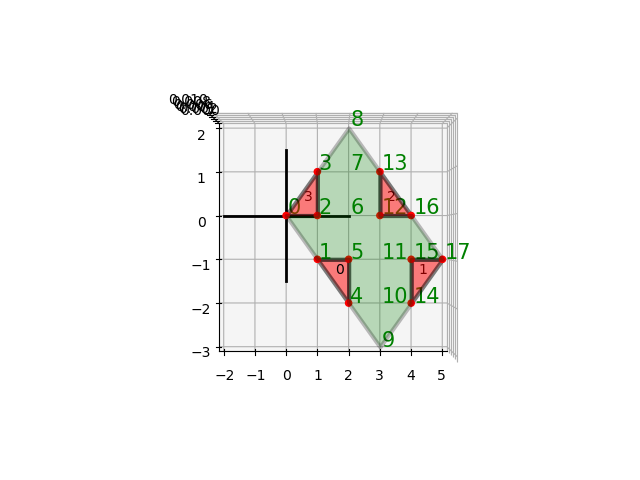

In [1245]:
def find_simplices_containing_point_by_index(simplices, n):
    return [ s for s in simplices.keys() if simplices[s].contains_point_by_index(n) ]

def find_simplices_containing_point_by_point(simplices, pt):
    return find_simplices_containing_point_by_index(simplices, reverse_pt_lookup(pt))

def inds_to_simplex_pts(ijk):
    p0 = point_lookups[ijk[0]]
    p1 = point_lookups[ijk[1]]
    p2 = point_lookups[ijk[2]]
    return np.array( [p0, p1, p2] )
        
class SurgerySimplex:
    def __init__(self, left, apex, right, label=None):
        self.left = left
        self.apex = apex
        self.right = right
        self.simplex = (left, apex, right)
        self.label = label

        self.left_point = point_lookups[left]
        self.apex_point = point_lookups[apex]
        self.right_point = point_lookups[right]
        self.simplex_points = (self.left_point, self.apex_point, self.right_point)

        self.xs = np.array( self.simplex_points )[:,0]
        self.ys = np.array( self.simplex_points )[:,1]
        self.zs = np.array( self.simplex_points )[:,2]

        self.center = sum( np.array(p) for p in self.simplex_points )/3

        self.polygon = sPolygon( [self.left_point, self.apex_point, self.right_point] )

        self.compute_primitive_bases()

        self.left_bd_pts = []
        self.right_bd_pts = []
        self.glue_pair_points = []
        for n in [0..self.surgery_size-1]:
            nth_left_pt = self.left_point + n*self.vl2
            self.left_bd_pts.append(nth_left_pt)
            nth_right_pt = self.right_point + n*self.vr1
            self.glue_pair_points.append( (nth_left_pt, nth_right_pt) )
            self.right_bd_pts.append(nth_right_pt)
        assert len(self.glue_pair_points) == self.surgery_size

        self.glue_pairs = lmap( 
            lambda x: ( reverse_pt_lookup(x[0]), reverse_pt_lookup(x[1]) ),
            self.glue_pair_points
        )
        self.left_bd = lmap( 
            reverse_pt_lookup,
            self.left_bd_pts
        )
        self.right_bd = lmap( 
            reverse_pt_lookup,
            self.right_bd_pts
        )
        assert len(self.glue_pairs) == self.surgery_size

        self.adjacents_computed = False


    def compute_primitive_bases(self):
        # Compute primitive basis vectors at each vertex
        self.vl1 = self.right_point - self.left_point
        self.vl2 = self.apex_point - self.left_point

        self.va1 = self.left_point - self.apex_point
        self.va2 = self.right_point - self.apex_point

        self.vr1 = self.apex_point - self.right_point
        self.vr2 = self.left_point - self.right_point

        self.surgery_size = self.vl2.norm()

        self.vl1 /= self.vl1.norm()
        self.vl2 /= self.vl2.norm()
        self.va1 /= self.va1.norm()
        self.va2 /= self.va2.norm()
        self.vr1 /= self.vr1.norm()
        self.vr2 /= self.vr2.norm()
        
    def __repr__(self):
        return f""" Surgery {self.label} at points {self.simplex} = {self.simplex_points}.
        Glue points: {self.glue_pairs} = {self.glue_pair_points}.
        """

    def relabel(self, label):
        self.label = label

    def plot(self, mirror=False):
        c = -1 if mirror else 1
        ax.add_collection3d(
            Poly3DCollection(
                [sPoly2d_to_3d_points(self.polygon)], 
                alpha=0.5, color="red", ec="black", lw=3
        ))        
        ax.text(
            self.center[0] - 0.1, 
            self.center[1], 
            self.center[2], 
            str(self.label), color='black'
        )
        ax.scatter( 
            self.xs, 
            self.ys, 
            self.zs, 
            color="red" 
        )


    def compute_all_adjacent_simplices(self, simplices):
        self.adjacent_left = {}
        self.adjacent_right = {}
        for i, (p, q) in enumerate(self.glue_pairs):
            left_adjacent = find_simplices_containing_point_by_index(simplices, p)
            self.adjacent_left[i] = left_adjacent
            right_adjacent = find_simplices_containing_point_by_index(simplices,q)
            self.adjacent_right[i] = right_adjacent
        assert len(self.adjacent_left.keys()) == len(self.adjacent_right.keys())
        self.adjacents_computed = True

    def get_apex_adjacent_simplices(self, simplices):
        return find_simplices_containing_point_by_index(simplices, self.apex)

    def get_apex(self, boost=None):
        if boost is None: boost = self.surgery_size
        return self.apex_point + vector([0,0,boost])
        
    def get_adjacent_simplices(self):
        if not self.adjacents_computed:
            raise ValueError("Run compute_all_adjacent_simplices(simplices) first.")
        return self.adjacent_left, self.adjacent_right

    def get_nth_adjacent_simplices(self, n):
        if not self.adjacents_computed:
            raise ValueError("Run compute_all_adjacent_simplices(simplices) first.")
        return self.adjacent_left[n], self.adjacent_right[n]


def get_surgery_simplices(sizes):
    surgeries = [ SurgerySimplex( x[0], x[1], x[2], i) for i,x in enumerate([
        (1,5,4),
        (14,15,17),
        (16,12,13),
        (3,2,0)
    ]) ]
    surgeries.sort(key = lambda s: s.label)
    return surgeries
    
def apply_cuts(poly, sizes=(1,1,1,1)):

    # Todo: generalize to cut sizes
    cuts = get_surgery_simplices(sizes)
    cut_polygons = [ s.polygon for s in cuts ]
    
    cut_area = reduce(lambda a, b: a.union(b), cut_polygons)
    remaining_poly = full_poly.difference(cut_area)
    return cut_area, remaining_poly, cuts

cut_area, remaining_poly, cuts = apply_cuts(full_poly, sizes=(1,1,1,1))

init_plot_2d()
[c.plot() for c in cuts]
plot_sPoly(remaining_poly, color="green")
# plot_sPoly_pts(full_poly)
plot_point_lookups(point_lookups)
[print(c) for c in cuts]

In [1246]:
class InternalSimplex:
    def __init__(self, p1, p2, p3, label=None):
        p1, p2, p3 = sorted([p1, p2, p3])
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.p = (p1, p2, p3)
        self.p_2d = (p1, p2)
        self.label=label
        self.lookup = point_lookups

        self.refresh_vertices(self.lookup)

        self.p1_neighbors = []
        self.p2_neighbors = []
        self.p3_neighbors = []

        self.p1_p2_edge_neighbors = []
        self.p2_p3_edge_neighbors = []
        self.p3_p1_edge_neighbors = []

        self.adjacents_computed = False

    def get_xs(self):
        self.refresh_vertices(self.lookup)
        return self.xs

    def get_ys(self):
        self.refresh_vertices(self.lookup)
        return self.ys

    def get_zs(self):
        self.refresh_vertices(self.lookup)
        return self.zs

    def refresh_vertices(self, lookup):
        self.lookup = lookup.copy()
        self.p1_point = self.lookup[self.p1]
        self.p2_point = self.lookup[self.p2]
        self.p3_point = self.lookup[self.p3]
        self.points = (self.p1_point, self.p2_point, self.p3_point)
        self.points_2d = tuple( map(tuple, np.array(self.points)[:,0:2] ) )

        self.xs = np.array( self.points )[:,0]
        self.ys = np.array( self.points )[:,1]
        self.zs = np.array( self.points )[:,2]

        self.center = sum( np.array(p) for p in self.points )/3

        self.polygon = sPolygon( [self.p1_point, self.p2_point, self.p3_point] )

    def __repr__(self):
        self.refresh_vertices(self.lookup)
        return(f"""Simplex {self.label} with points {self.p} = {self.points}.""")

    def contains_point_by_index(self, n):
        return self.p1 == n or self.p2 == n or self.p3 == n

    def contains_point_by_coordinates(self, pt):
        ind = reverse_pt_lookup[pt]
        return self.contains_point_by_index(ind)

    def update_vertex(self, old_pt_index, new_pt_index, new_lookup):
        new_point = new_lookup[new_pt_index]
        found_pt = False
        
        if self.p1 == old_pt_index:
            found_pt = True
            self.p1 = new_pt_index
            self.p = (new_pt_index, self.p2, self.p3)
            
            self.p1_point = new_point
            self.points = (new_point, self.p2_point, self.p3_point)
            
        if self.p2 == old_pt_index:
            found_pt = True
            self.p2 = new_pt_index
            self.p = (self.p1, new_pt_index, self.p3)
            
            self.p2_point = new_point
            self.points = (self.p1_point, new_point, self.p3_point)
            
        if self.p3 == old_pt_index:
            found_pt = True
            self.p3 = new_pt_index
            self.p = (self.p1, self.p2, new_pt_index)
        
            self.p3_point = new_point
            self.points = (self.p1_point, self.p2_point, new_point)
        if not found_pt:
            raise ValueError(f"Point {old_pt_index} = {new_point} is not in this simplex. {self.p}")
        self.lookup = new_lookup.copy()
        self.refresh_vertices(new_lookup)
        assert old_pt_index not in self.lookup.keys()
        assert new_pt_index in self.lookup.keys()
        return True

    def compute_all_adjacent_simplices(self, simplices):
        self.refresh_vertices(self.lookup)
        self.p1_neighbors = find_simplices_containing_point_by_index(simplices, self.p1)
        self.p2_neighbors = find_simplices_containing_point_by_index(simplices, self.p2)
        self.p3_neighbors = find_simplices_containing_point_by_index(simplices, self.p3)
        
        self.adjacents_computed = True

    def plot(self, color="None", mirror=False, dim=3):
        c = -1 if mirror else 1
        pts = np.array(  (self.get_xs(), self.get_ys(), c * self.get_zs() ) ).T
        if dim == 3:
            ax.add_collection3d(
                Poly3DCollection(
                    [  pts ], 
                    alpha=0.25, color=color, ec="blue", lw=3, hatch="/"
            ))
            ax.text(
                self.center[0] -0.1, 
                self.center[1] -0.1, 
                c * self.center[2], 
                str(self.label), color='black'
            )
            ax.scatter( 
                self.get_xs(),
                self.get_ys(),
                c * self.get_zs(),
                color="black" 
            )
        elif dim == 2:
            ax.add_patch(plt.Polygon(
                self.points_2d, 
                alpha=0.25, color=color, ec="blue", lw=3, hatch="/"
            ))
            ax.text(
                self.center[0] -0.1, 
                self.center[1] -0.1, 
                str(self.label), color='black'
            )
            ax.scatter( 
                self.get_xs(),
                self.get_ys(),
                color="black" 
            )

        

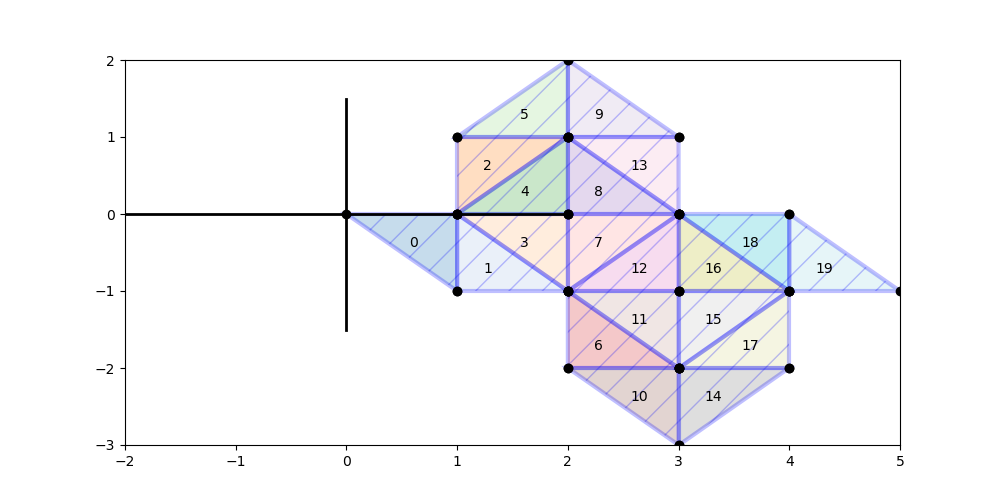

In [2218]:
def poly_int_pts(poly):
    x1, y1, x2, y2 = full_poly.bounds
    xs, ys = np.meshgrid( [x1..x2], [y1..y2] ) 
    full_poly_int_points = MultiPoint( np.vstack( [xs.ravel(), ys.ravel() ] ).T )
    poly_int_points = full_poly_int_points.intersection( poly )

    poly_int_points_list = shapely.get_coordinates(poly_int_points)
    return np.array( 
        list( poly_int_points_list.T) + 
        [ np.zeros( len( poly_int_points_list.T[0] ) ) ] 
    ).T

def simplex_cmp(s1, s2):
    p0, p1, p2 = sum( lmap(lambda i: point_lookups[i], s1) )/3
    q0, q1, q2 = sum( lmap(lambda i: point_lookups[i], s2) )/3
    if p0 < q0:
        return -1
    elif p0 > q0:
        return 1
    elif p0 == q0:
        if p1 < q1:
            return -1
        elif p1 > q1:
            return 1
        elif p1 == q1:
            if p2 < q2:
                return -1
            elif p2 > q2:
                return 1
            elif p2 == q2:
                return 0
                
from functools import cmp_to_key
simplex_cmp_key = cmp_to_key(simplex_cmp)

global poly_triangulation
    
def get_labeled_linked_simplices(poly):
    global poly_triangulation
    poly_int_points_list = poly_int_pts( poly )
        
    poly_triangulation = Delaunay(
        poly_int_points_list[:,0:2]
    )
    
    valid_simplices = [ 
        [a,b,c] for a,b,c in poly_triangulation.simplices if 
        poly.contains( 
            sPolygon( 
                (poly_int_points_list[a], 
                 poly_int_points_list[b], 
                 poly_int_points_list[c]
                )
            ) ) 
    ]
    valid_simplices.sort(key=simplex_cmp_key)
    
    
    valid_simplices_linked = dict()
    for i, simplex in enumerate(valid_simplices):
        ind_p1 = reverse_pt_lookup( poly_int_points_list[ simplex[0] ] )
        ind_p2 = reverse_pt_lookup( poly_int_points_list[ simplex[1] ] )
        ind_p3 = reverse_pt_lookup( poly_int_points_list[ simplex[2] ] )
        p1, p2, p3 = sorted([ind_p1, ind_p2, ind_p3])
        valid_simplices_linked[i] = InternalSimplex( p1, p2, p3, i)
    return valid_simplices_linked

def plot_simplices(simps, mirror=False, dim=3):
    cmap = plt.get_cmap('tab20')
    color_step = 1 / len(simps)
    for i, (lab, s) in enumerate( simplices.items() ):
        color = cmap(s.label*color_step)
        s.plot(color, mirror=mirror, dim=dim)

def plot_all_int_points():
    ax.scatter(
        cut_poly_int_points_list_z0[:,0], 
        cut_poly_int_points_list_z0[:,1], 
        cut_poly_int_points_list_z0[:,2],
        color="green"
    )

int_pts = poly_int_pts(remaining_poly)
simplices = get_labeled_linked_simplices(remaining_poly)

init_plot_only_2d()

plot_simplices(simplices, mirror=False, dim=2)

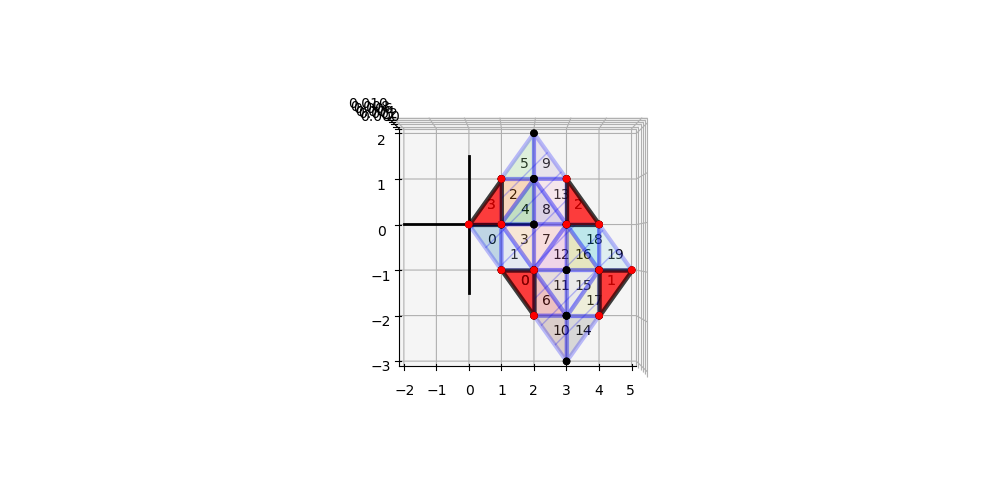

In [2221]:
init_plot_2d()
[c.plot() for c in cuts]
plot_simplices(simplices, mirror=False)
# plot_point_lookups(point_lookups)
[c.plot() for c in cuts]
# plot_point_lookups(point_lookups)
plt.show()

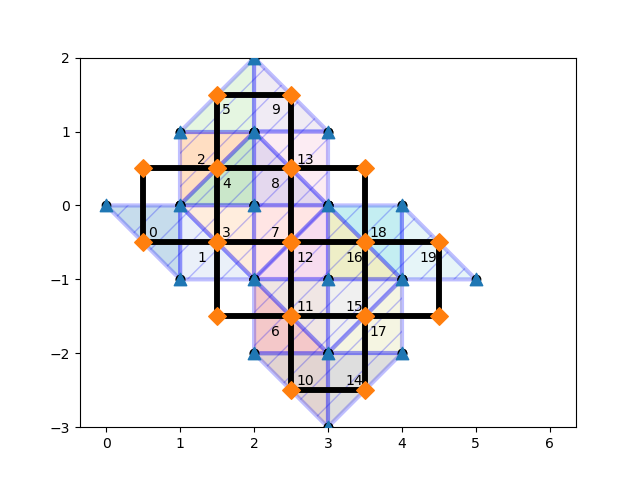

In [1251]:
plt.clf()

ax = plt.figure().add_subplot()

tri = poly_triangulation

p = tri.points[tri.simplices]

# Triangle vertices
A = p[:,0,:].T
B = p[:,1,:].T
C = p[:,2,:].T

# See http://en.wikipedia.org/wiki/Circumscribed_circle#Circumscribed_circles_of_triangles
# The following is just a direct transcription of the formula there
a = A - C
b = B - C

def dot2(u, v):
    return u[0]*v[0] + u[1]*v[1]

def cross2(u, v, w):
    """u x (v x w)"""
    return dot2(u, w)*v - dot2(u, v)*w

def ncross2(u, v):
    """|| u x v ||^2"""
    return sq2(u)*sq2(v) - dot2(u, v)**2

def sq2(u):
    return dot2(u, u)

cc = cross2(sq2(a) * b - sq2(b) * a, a, b) / (2*ncross2(a, b)) + C

# Grab the Voronoi edges
vc = cc[:,tri.neighbors]
vc[:,tri.neighbors == -1] = np.nan # edges at infinity, plotting those would need more work...

lines = []
lines.extend(zip(cc.T, vc[:,:,0].T))
lines.extend(zip(cc.T, vc[:,:,1].T))
lines.extend(zip(cc.T, vc[:,:,2].T))

# Plot it
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

lines = LineCollection(lines, edgecolor='k', lw=4, zorder=1)

plot_simplices(simplices, mirror=False, dim=2)
ax.add_collection(lines)

ax.scatter(
    tri.points[:,0],
    tri.points[:,1],
    s = 80,
    marker = "^",
    zorder = 10
)
ax.scatter(
    cc[0],
    cc[1],
    s=80,
    marker = "D",
    zorder = 10
)

plt.axis('equal')
plt.xlim(0, 6)
plt.ylim(-3, 2)

plt.show()


In [1252]:
def init_plot_3d():
    import gc
    plt.close("all")
    gc.collect();
    
    plt.clf()
    global ax
    ax = plt.figure().add_subplot(projection='3d')
    ax.set_xlim(-2, 5)
    ax.set_ylim(-3, 2)
    ax.set_zlim(0, 1)
    ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
    ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
    ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)
    ax.view_init(60, -90, 0)


All simplices are distinct.


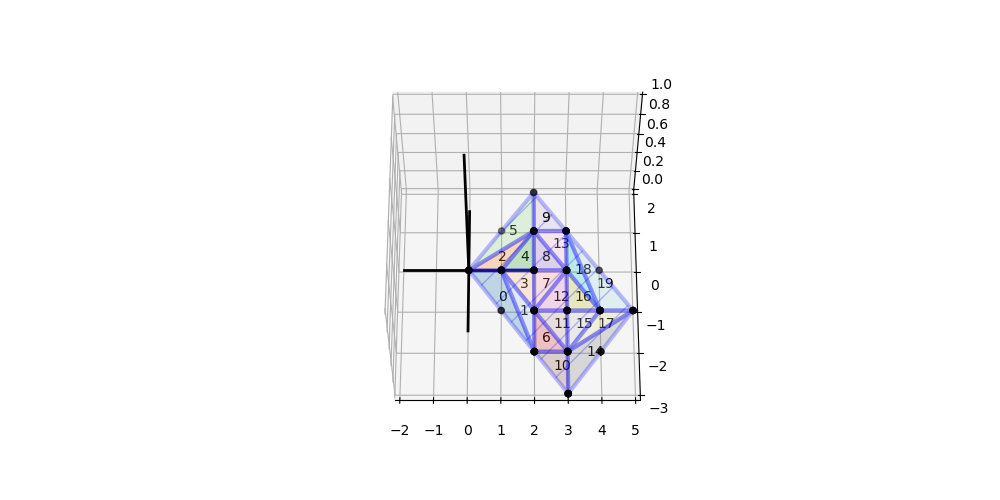

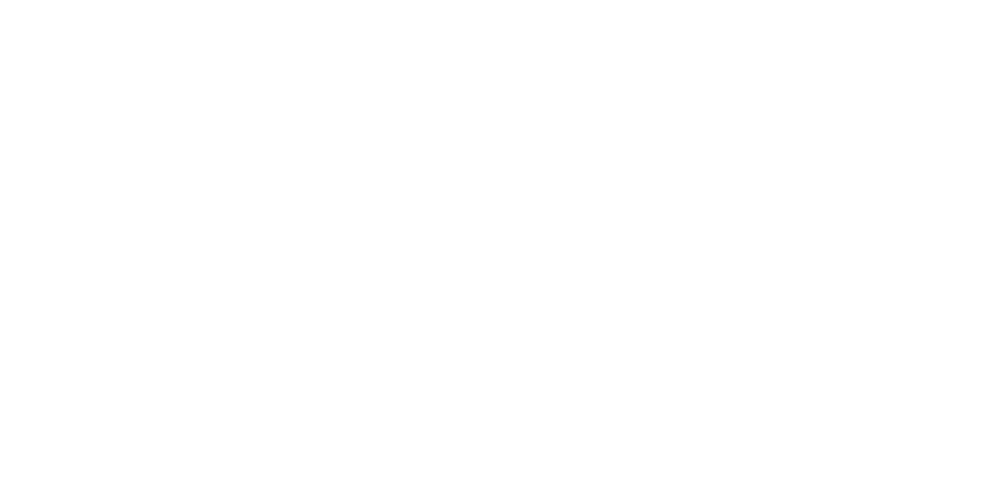

In [2222]:
def do_surgeries(cuts, debug=False):
    
    for i, c in enumerate(cuts):
        surgery_name = surgery_names[i]
        modified_cuts.remove(c)
        c.compute_all_adjacent_simplices(modified_simplices)
        if debug: print(f"Performing {c.surgery_size} gluing(s).")
        
        for n in [0..c.surgery_size-1]:
            
            l, r = c.get_nth_adjacent_simplices(n)
            
            l_pt, r_pt = c.left_bd[n], c.right_bd[n]
            
            if len(l) == 0 and len(r) == 0:
                if debug: print(f"\tSurgery step {n}: no simplices contain {l_pt} or {r_pt}")
            
            if debug: print(f"\tSurgery step {n}: gluing {l_pt} ----> {r_pt}")
            if debug: print(f"\tLeft adjacent simplices: {l}.")
            if debug: print(f"\tRight adjacent simplices: {r}.")
    
            r_pt_coords = modified_point_lookups[r_pt]
            del modified_point_lookups[l_pt]
            del modified_point_lookups[r_pt]
            new_key = f"{surgery_name}{n}({l_pt}, {r_pt})"
            modified_point_lookups[new_key] = r_pt_coords
            
    
            for sl in l:
                if debug: print(f"\t\tReplacing point {l_pt} in simplex {sl} with {new_key}")
                if debug: print(f"\t\tBefore: {modified_simplices[sl]}")
                modified_simplices[sl].update_vertex(l_pt, new_key, modified_point_lookups)
                if debug: print(f"\t\tAfter: {modified_simplices[sl]}")
                if debug: print("\t\t----------------------------")
            for sr in r:
                if debug: print(f"\t\tLeaving point {r_pt} in simplex {sr}")
                if debug: print(f"\t\tBefore: {modified_simplices[sr]}")
                modified_simplices[sr].update_vertex(r_pt, new_key, modified_point_lookups)
                if debug: print(f"\t\tAfter: {modified_simplices[sl]}")
                if debug: print("\t\t----------------------------")
    
        new_apex_pt = c.get_apex(0)
        new_apex_key = f"{surgery_name}{c.surgery_size}({c.apex})"
        del modified_point_lookups[c.apex]
        modified_point_lookups[new_apex_key] = new_apex_pt
    
        if debug: print("Continuing with apex modification")
        for s in  c.get_apex_adjacent_simplices(modified_simplices):
            if debug: print(f"\t\tReplacing point {c.apex} in simplex {s} with {new_apex_key}")
            if debug: print(f"\t\tBefore: {modified_simplices[s]}")
            modified_simplices[s].update_vertex(c.apex, new_apex_key, modified_point_lookups)
            if debug: print(f"\t\tAfter: {modified_simplices[s]}")
            if debug: print("\t\t----------------------------")


def get_broken_simplices():
    all_point_triples = [x.p for i, x in modified_simplices.items()]
    counts = collections.Counter(all_point_triples).items()
    offenders = []
    for label, count in [(item, c) for item, c in counts if c > 1]:
        offending_simplices = [x for i, x in modified_simplices.items() if x.p == label ]
        offenders.append((label, offending_simplices) )
    if len(offenders) == 0:
        print("All simplices are distinct.")
    else:
        print("Found overlapping simplices")
        return offenders


simplices = get_labeled_linked_simplices(remaining_poly)
_, _, cuts = apply_cuts(full_poly, sizes=(1,1,1,1))



modified_cuts = cuts.copy()
modified_simplices = simplices.copy()
modified_point_lookups = point_lookups.copy()
surgery_names = ["A", "B", "C", "D"]

do_surgeries(cuts)

get_broken_simplices()

modified_points_projected = False

init_plot_3d()
[c.plot() for c in modified_cuts]
plot_simplices(modified_simplices)
plot_sPoly_pts(full_poly)
# plot_point_lookups()
plt.show()

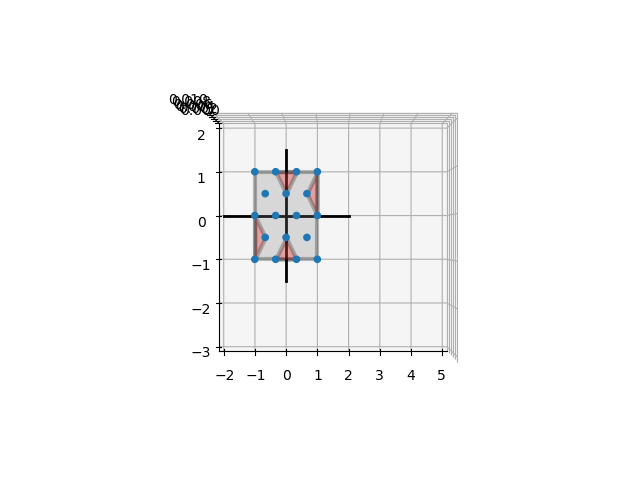

In [1254]:
def sPoly_to_3d_coords(poly):
    return matrix(QQ, [ poly.exterior.xy[0], poly.exterior.xy[1], [0] * len(poly.exterior.xy[0]) ]  )

def matrix_to_multipolygon(mat):
    return shapely.MultiPolygon([
        [ x ] for x in [ matrix(QQ, x.T) for x in mat]
    ])
    
def apply_affine_transformation(A, v, poly):
    if not hasattr(poly, "geom_type"):
        return(
            A * poly + matrix(QQ, [list(v)]  * len(poly[0])  ).T 
        )    
    if poly.geom_type != "MultiPolygon":
        return(
            A * sPoly_to_3d_coords(poly) + 
            matrix(QQ, [list(v)]  * len(poly.exterior.xy[0]) ).T 
        )       

    result = []
    for each_poly in poly.geoms:
        result.append(
            A * sPoly_to_3d_coords(each_poly) + 
            matrix(QQ, [list(v)]  * len(each_poly.exterior.xy[0]) ).T 
        )
    return result

def plot_points(mat):
    mat = matrix(mat)
    num_pts = max( mat.dimensions() )
    if mat.dimensions()[0] != num_pts:
        mat = mat.T
    ax.scatter(
        mat[:,0],
        mat[:,1],
        mat[:,2]
    )

A2 = matrix(ZZ, 2, [1,-1,1,1])/2 
B2 = matrix(QQ, 2, [2/3, 0, 0, 1] ) 
T2 = B2 * A2
               
A3 = matrix(ZZ, 3, [1,-1,0 ,1,1,0, 0,0,0])/2 
B3 = matrix(QQ, 3, [2/3,0,0, 0,1,0, 0,0,0]) 
T3 = B3 * A3

rot_full_poly = apply_affine_transformation(T3, [-1,-1, 0], full_poly)
rot_cut_poly = apply_affine_transformation(T3, [-1,-1,0], cut_area)

int_pts = matrix( sPoly_int_pts( full_poly) ).T
rot_int_pts = apply_affine_transformation(T3, [-1,-1,0], int_pts)

init_plot_2d()
plot_sPoly( sPolygon( rot_full_poly.T ) )
plot_sPoly( matrix_to_multipolygon(rot_cut_poly), color="red" )
plot_points(rot_int_pts)

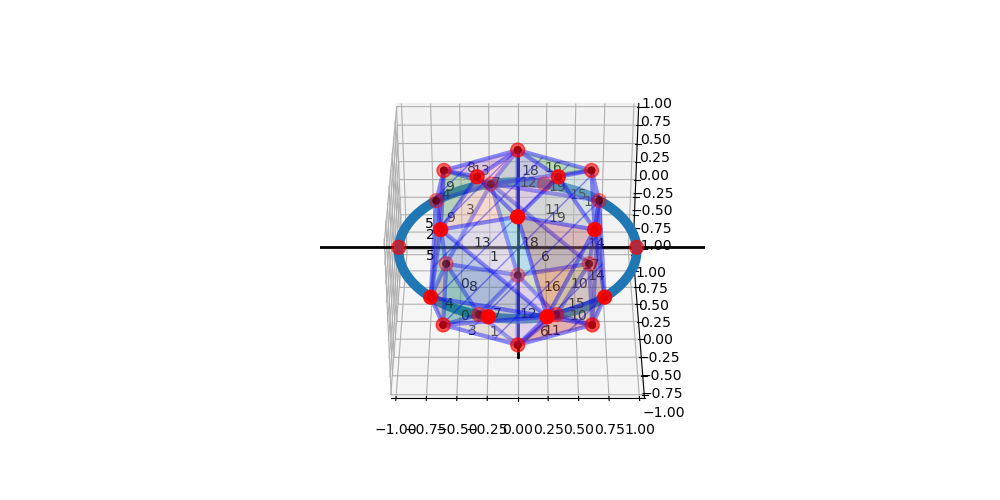

In [2225]:
def plot_first_quadrant_zoom():
    plt.clf()
    global ax
    ax = plt.figure().add_subplot(projection='3d')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
    ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
    # ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)
    ax.view_init(35, -90, 0)
    
def apply_projection(mat):
    if type(mat) is list:
        return [ apply_projection(matrix(x)) for x in mat ]
        
    p = np.array(mat.T)

    a = p[:,0] * np.sqrt( 1 - (1/2)*p[:,1]^2)
    b = p[:,1] * np.sqrt( 1 - (1/2)*p[:,0]^2)
    c = p[:,2]
    return np.array( list(zip(a,b,c)) )

def sphere_lift(mat):
    if type(mat) is list:
        return [ sphere_lift(x) for x in mat ]
        
    mat = np.array(mat)
    X = mat[:,0]
    Y = mat[:,1]
    Z = np.sqrt( np.clip(1 - X**2 - Y**2, 0, 1) )
    return np.array( list(zip(X,Y,Z)) )

def plot_points_3d(mat, mirror=False):
    mat = matrix(mat)
    num_pts = max( mat.dimensions() )
    if mat.dimensions()[0] != num_pts:
        mat = mat.T
    ax.scatter(
        mat[:,0],
        mat[:,1],
        mat[:,2],
        s = 100,
        color="red"
    )
    if mirror:
        ax.scatter(
        mat[:,0],
        mat[:,1],
        -1*mat[:,2],
        s = 100,
        color="red"
    )

def plot_sphere_3d(wireframe = False, samples=100):
    u = np.linspace(0, 2 * np.pi, samples)
    v = np.linspace(0, np.pi, samples)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='blue', alpha=0.1, lw=3)
    if wireframe:
        u = np.linspace(0, 2 * np.pi, samples/10)
        v = np.linspace(0, np.pi, samples/10)
        x = np.outer(np.cos(u), np.sin(v))
        y = np.outer(np.sin(u), np.sin(v))
        z = np.outer(np.ones(np.size(u)), np.cos(v))
        ax.plot_wireframe(x, y, z, color="blue", alpha=0)

def plot_equator_3d():
    t = np.linspace(0,np.pi*2,100)
    ax.plot(np.cos(t), np.sin(t), linewidth=7)


new_poly = sphere_lift( apply_projection(rot_full_poly) )
new_cut_poly = sphere_lift( apply_projection(rot_cut_poly) )
new_int_pts = sphere_lift( apply_projection(rot_int_pts) )

if not modified_points_projected:
    for i, (lab, pt) in enumerate( modified_point_lookups.items()):
        modified_point_lookups[lab] = tuple( 
            sphere_lift( apply_projection( 
            apply_affine_transformation(T3, [-1,-1,0], matrix(pt).T )
        ))[0])
    modified_points_projected = True

for i, (lab, s) in enumerate( modified_simplices.items() ):
    s.refresh_vertices(modified_point_lookups)

plot_first_quadrant_zoom()
# for t in new_cut_poly:
#     ax.add_collection3d(Poly3DCollection([t], alpha=0.5, color="red", ec="red"))
plot_simplices(modified_simplices)
plot_simplices(modified_simplices, mirror=True)
# plot_sphere_3d()
plot_equator_3d()

# plot_point_lookups(modified_point_lookups)
all_new_pts = matrix(RR, 0, 3)
for x,y,z in new_int_pts:
    if z != 0:
        all_new_pts = all_new_pts.stack( vector( [x,y,-z] ) )        
    all_new_pts = all_new_pts.stack( vector( [x,y,z] ) )

plot_points_3d(all_new_pts)

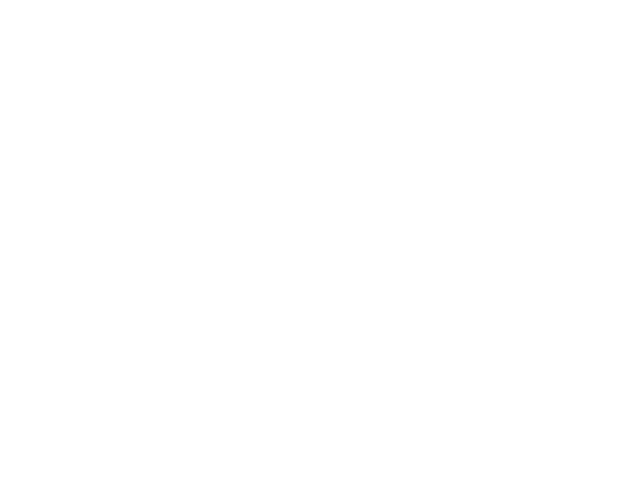

In [1257]:
plt.figure().clear()
plt.close()
plt.cla()
plt.clf()
plt.show()

# Misc New

In [570]:
all_new_pts = []
for x,y,z in new_int_pts:
    if z != 0:
        all_new_pts.append( [x,y,-z] )        
    all_new_pts.append( [x,y,z] )
    
# all_new_pts

NameError: name 'new_int_pts' is not defined

In [571]:
# set input data
points = np.array([[0, 0, 1], [0, 0, -1], [1, 0, 0],
                   [0, 1, 0], [0, -1, 0], [-1, 0, 0], ])

points = np.array( all_new_pts )

radius = 1
center = np.array([0, 0, 0])
sv = SphericalVoronoi(points, radius, center)

#sort vertices (optional, helpful for plotting)
sv.sort_vertices_of_regions()
t_vals = np.linspace(0, 1, 2000)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the unit sphere for reference (optional)
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x, y, z, color='y', alpha=0.1)

# plot generator points
# ax.scatter(points[:, 0], points[:, 1], points[:, 2], c='b')
plot_points_3d(all_new_pts)

# plot Voronoi vertices
ax.scatter(
    sv.vertices[:, 0], 
    sv.vertices[:, 1], 
    sv.vertices[:, 2],
    c='black'
)

# indicate Voronoi regions (as Euclidean polygons)
for region in sv.regions:
   n = len(region)
   for i in range(n):
       start = sv.vertices[region][i]
       end = sv.vertices[region][(i + 1) % n]
       result = geometric_slerp(start, end, t_vals)
       ax.plot(result[..., 0],
               result[..., 1],
               result[..., 2],
               c='black')
ax.azim = 10
ax.elev = 40
fig.set_size_inches(4, 4)

plot_simplices(modified_simplices)
plot_simplices(modified_simplices, mirror=True)
plt.show()

IndexError: tuple index out of range

In [572]:


    



def convert_to_rational_polyhedron(poly):
    p_t = Polyhedron( lmap(lambda x: vector(ZZ, x), (3*poly).vertices() ) )
    p_tt = Polyhedron( 
        lmap(lambda x: 9*x, 
             lmap(lambda x: vector(x) - vector( p_t.centroid() ), 
                  p_t.vertices() ) 
            )
    )
    return p_tt

In [573]:
ref_pt_by_points((3,0), (5,-1), (2,2) )

(4, 1)

In [574]:
known_toric_varieties = {}

P2 = ToricVariety(
    Fan2d([ (1,0), (0,1), (-1,-1) ]), 
    coordinate_names = ["r0", "r1", "r2"]
)
Bl1_P2 = blowup(P2, 2)
Bl2_P2 = blowup(Bl1_P2, 1)
Bl3_P2 = blowup(Bl2_P2, 0)
known_toric_varieties.update({
    "P2": P2,
    "Bl1_P2": Bl1_P2,
    "Bl2_P2": Bl2_P2,
    "Bl3_P2": Bl3_P2
})

P1xP1 = ToricVariety(
    Fan2d([ (1,0), (0,1), (-1,0), (0,-1) ]), 
    coordinate_names = ["r0", "r1", "r2", "r3"]
)
Bl1_P1xP1 = blowup(P1xP1, 3)
Bl2_P1xP1 = blowup(Bl1_P1xP1, 2)
Bl3_P1xP1 = blowup(Bl2_P1xP1, 1)
Bl4_P1xP1 = blowup(Bl3_P1xP1, 0)
known_toric_varieties.update({
    "P1xP1": P1xP1,
    "Bl1_P1xP1": Bl1_P1xP1,
    "Bl2_P1xP1": Bl2_P1xP1,
    "Bl3_P1xP1": Bl3_P1xP1,
    "Bl4_P1xP1": Bl4_P1xP1
})

def Fn(n):
    return ToricVariety( 
        Fan2d([ (0,-1), (1,0), (0,1), (-n, 1) ]),
        coordinate_names = ["r0", "r1", "r2", "r3"]
    )

for i in [1..10]:
    exec(f"F{i} = Fn({i})")
    exec(f"Bl1_F{i} = blowup(F{i}, 3)")
    exec(f"Bl2_F{i} = blowup(Bl1_F{i}, 2)")
    exec(f"Bl3_F{i} = blowup(Bl2_F{i}, 1)")
    exec(f"Bl4_F{i} = blowup(Bl3_F{i}, 0)")
    exec(f"""
known_toric_varieties.update({{
    "F{i}": F{i},
    "Bl1_F{i}": Bl1_F{i},
    "Bl2_F{i}": Bl2_F{i},
    "Bl3_F{i}": Bl3_F{i},
    "Bl4_F{i}": Bl4_F{i}
}})
    """)

latex_names = dict({
    "P2": "\\mathbb{P}^2",
    "Bl1_P2": "\\mathrm{Bl}_1 \\mathbb{P}^2",
    "Bl2_P2": "\\mathrm{Bl}_2 \\mathbb{P}^2",
    "Bl3_P2": "\\mathrm{Bl}_3 \\mathbb{P}^2",
    "P1xP1": "\\mathbb{P}^1 \\times \\mathbb{P}^1",
    "Bl2_P1xP1": "\\mathrm{Bl}_2 (\\mathbb{P}^1 \\times \\mathbb{P}^1)",
    "Bl3_P1xP1": "\\mathrm{Bl}_3 (\\mathbb{P}^1 \\times \\mathbb{P}^1)",
    "Unknown": "???"
})

known_toric_varieties.update({
    "dP6": toric_varieties.dP6(),
    "dP7": toric_varieties.dP7(),
    "dP8": toric_varieties.dP8()
})

def identify_toric_variety(X):
    for _, (name, variety) in enumerate( known_toric_varieties.items()):
        if variety.fan().is_isomorphic( X.fan() ):
            return name
    return "Unknown"
    
class DualCell():
    
    def __repr__(self):
        if self.is_unbounded:
            return(f"Voronoi cell {self.label} near ? with {len(self.segment_indices)} line segments")
        else:
            return(
                f"Voronoi cell {self.label} near {lmap(round, self.polygonal_cell.centroid())} with {len(self.segment_indices)} line segments." + 
            "\n" + self.polygonal_cell.__repr__() 
            )
        
    def __init__(self, segment_indices, an_IAS, label):
        self.label = label
        self.IAS = an_IAS
        
        self.coords = self.IAS.triangulation.points[self.label]
                
        self.segment_indices = segment_indices
        self.segments = lmap(lambda x: self.IAS.line_segment_obj_lookup[x], segment_indices)
        
        self.all_surrounding_nodes = set( reduce(
            lambda a,b: a+b, 
            [list(x) for x in list(self.segment_indices)]
        ) ) 
        self.unbounded_nodes = set([i for i in self.all_surrounding_nodes if is_unbounded_node(i)])
        self.bounded_nodes = self.all_surrounding_nodes.difference(self.unbounded_nodes)

        self.is_unbounded = len(self.unbounded_nodes) > 0
        if len(self.all_surrounding_nodes) <= 1:
            print(f"Less than 1 node in cell {self.label}, skipping building cell for now.")
            self.polygonal_cell = None
        else:
            polygon_coords = lmap(
                lambda x: self.IAS.voronoi_vertex_coord_lookup[x], 
                self.all_surrounding_nodes
            )
            self.polygonal_cell = PolygonalCell(polygon_coords, self.label)

    def adjacent_nodes(self):
        this_node = vector(ZZ, self.IAS.triangulation.points[self.label])
        adjacent_nodes = list( 
            self.IAS.lattice_point_adjacency_graph[self.label].keys() 
        )
        return adjacent_nodes

    def star(self):
        this_node = vector(ZZ, self.IAS.triangulation.points[self.label])
        star_vectors = lmap(lambda v: 
                            (vector(ZZ, v) - this_node), 
                            self.IAS.triangulation.points[ np.array( 
                                self.adjacent_nodes()) 
                                ] 
                        )
        
        newpts = []
        if self.label in [0,8,9,17]: #on corner
            if self.label == 0:
                print("0")
            elif self.label == 8:
                print("8")
            elif self.label == 17:
                print("17")
            elif self.label == 9:
                print("9")
            #newpts = lmap( lambda v: ref_pt(v, m, b), star_vectors )
            return star_vectors + newpts
        elif self.label in [1,4,14,16,13,3]:
            p1 = None
            q1 = None
            if self.label in [1,4]:
                p1 = (0,0)
                q1 = (3,-3)
            elif self.label in [14]:
                p1 = (3,-3)
                q1 = (5,-1)
            elif self.label in [13, 16]:
                p1 = (5,-1)
                q1 = (2,2)
            elif self.label in [3]:
                p1 = (2,2)
                q1 = (0,0)
            newpts = lmap(lambda w: vector(w) - vector(this_node), 
                              lmap( lambda v: 
                                    ref_pt_by_points( vector(v) + vector(this_node), p1, q1 ), 
                                    star_vectors 
                                 )
                             )
            new_vecs = star_vectors + newpts
            for v in new_vecs:
                v.set_immutable()
            return list(set( new_vecs ))
        else:
            return star_vectors

    def plot_fan(self):
        sage.geometry.toric_plotter.options(
            mode = "generators",
            show_rays = False,
            show_generators = True,
            show_walls = True,
            # ray_color = "black",
            generator_color = "black",
            point_size = 120,
            ray_thickness = 1,
            generator_thickness = 2.5,
            wall_alpha = 0.85,
            show_lattice = False,
            wall_zorder=-10
        )
        fig_center = self.coords
        adjacent_nodes = self.adjacent_nodes()
        star_vectors = self.star()
        print(f"Plotting {len(star_vectors)} vectors.: {star_vectors}")
        this_fan = Fan2d( star_vectors )
        
        labels = []
        for v in verts:
            ls = [str(i) for i, rs in enumerate(this_fan.cones()[2])  if v in this_fan.cones()[2][i] ] 
            labels.append( f"$\\sigma_{{ { ' '.join(ls) } }}$" )
        result = this_fan.plot() 
        x0, y0 = fig_center[0]-0.87, fig_center[1]-1  # bottom-left corner of Fig2 in Fig1
        width, height = 2, 2  # size of Fig2
        bbox = Bbox.from_bounds(x0, y0, width, height)
        trans = ax.transData
        inset_ax = fig.add_axes(bbox.transformed(trans + fig.transFigure.inverted()))
        inset_ax.set_xlim(-1, 1)
        inset_ax.set_ylim(-1, 1)
        inset_ax.patch.set_visible(False) # Hide the background of the second axes
        inset_ax.set_axis_off()
        inset_ax.axis('equal')
        return result.matplotlib(figure=fig, sub=inset_ax), this_fan

    def plot_fan_manual(self, rescale=False):
        adjacent_nodes = self.adjacent_nodes()
        star_vectors = lmap(
            lambda v: 0.9 * v, 
            self.star( ) 
        )
        
        plot_list_vector_2d_strict( 
            star_vectors,
            origin = vector(ZZ, self.IAS.triangulation.points[self.label]),
            alpha = 0.8,
            color = "blue"
        )
        # labels = []
        # for v in verts:
        #     ls = [str(i) for i, rs in enumerate(f.cones()[2])  if v in f.cones()[2][i] ] 
        #     labels.append( f"$\\sigma_{{ { ' '.join(ls) } }}$" )
        m = 1
        if rescale:
            ax.set_xlim(-m, m)
            ax.set_ylim(-m, m)
        plot_list_of_2d_points( 
            lmap(vector, self.IAS.triangulation.points[ np.array( adjacent_nodes ) ]),
            size = 15, lw=2,
            marker='o', facecolors='none', edgecolors='green'
            )

    def fan(self):
        return Fan2d( self.star() )
        
    def toric_variety(self):
        return ToricVariety( self.fan() )
        
    def print_toric_summary(self):
        X = self.toric_variety()
        HH = X.cohomology_ring()
        K = HH( X.K() )
        print(f"Smooth: {X.is_smooth()}")
        print(f"Only quotient singularities: {X.is_orbifold()}")
        print(f"K = {K}")
        print(f"K^2 = {X.integrate( K^2 )}")
        print(f"Dimension of X^sing: {X.dimension_singularities()}")
        print(f"Dimension of Aut(X): {X.Aut_dimension()}")
        print(f"Euler characteristic: {X.chi()}")        


    def is_isomorphic(self, other):
        return self.fan().is_isomorphic( other.fan() )

    def plot_2d_strict(self, vector_segments=True, **kwargs):
        if self.polygonal_cell is not None:
            if self.is_unbounded:
                self.polygonal_cell.plot_2d_strict(color="red", alpha=0.1, hatch="/", **kwargs)
            else:
                self.polygonal_cell.plot_2d_strict(color="blue", alpha=0.25, **kwargs)
        if vector_segments: 
            for s in self.segments:
                s.plot_2d_strict(fontsize=4, withlabels=False, alpha=0.5)
        
        # ax.text(
        #         self.label_pos[0], self.label_pos[1],
        #         self.label,
        #         size=20
        #     )
        
class IASTriangulation:

    def __init__(self, 
                 line_segment_obj_lookup,
                 voronoi_vertex_coord_lookup,
                 triangulation
                ):

        self.line_segment_obj_lookup = line_segment_obj_lookup
        self.voronoi_vertex_coord_lookup = voronoi_vertex_coord_lookup
        
        self.triangulation = triangulation
        self.lattice_points = triangulation.points
        self.voronoi_centers = triangulation.barycenters
        self.simplices = triangulation.simplices
        self.voronoi_cells = {}
        self.toric_ids = {}

        G = nx.Graph()
        self.node_labels = set( reduce(lambda a,b: list(a) + list(b), self.simplices) )
        G.add_nodes_from( 
            self.node_labels
        )
        
        for path in lmap(lambda t: list(t) + [t[0]], self.simplices):
            nx.add_path(G, list(path))
        
        self.edge_labels = dict( G.edges() )
        for e in G.edges():
            self.edge_labels[e] = str(e)

        self.lattice_point_adjacency_graph = G


    def plot_star(self, i):
        return self.voronoi_cells[i].plot_fan_manual()

    def plot_polygon(self, i, vector_segments=False):
        return self.voronoi_cells[i].plot_2d_strict(vector_segments)

    def toric_summary(self):
        self.identify_toric_varieties()
        rows = [
            ["Id", "Iso", "Complete?", "Smooth?", "Orbifold?", 
             "$K$", "$K^2$", "$\\mathrm{dim} X^{\\mathrm{sing}}$", 
             "$\\mathrm{dim} \\mathrm{Aut}(X)$", "$\\chi$"]
        ]
        for i in self.toric_ids.keys():
            X = self.toric_variety(i, plot=False)
            HH_X = X.cohomology_ring()
            K_X = HH_X( X.K() )
            rows.append(lmap(lambda x: str(x), [
                i,
                f"${latex_names[ self.toric_ids[i] ]}$",
                "✔" if X.is_complete() else "",
                "✔" if X.is_smooth() else "",
                "✔" if X.is_orbifold() else "",
                f"${latex(K_X)}$",
                X.integrate( K_X^2 ) if X.is_complete() else "?",
                "✘" if X.dimension_singularities() == -1 else X.dimension_singularities(),
                X.Aut_dimension() if X.is_complete() else "?",
                X.chi()
            ]))
        return table(rows, frame=True)

    def toric_variety(self, i, plot=False):
        if type(i) == list:
            varieties = []
            for j in i:
                varieties.append( self.toric_variety(j) )
            return varieties
        if i not in self.toric_ids.keys():
            self.identify_toric_varieties()
        # print(f"Isomorphic to {self.toric_ids[i]}.")
        if plot:
            self.voronoi_cells[i].print_toric_summary()
            self.plot_star(i)
            self.plot_polygon(i)
            t = ax.text(
                self.voronoi_cells[i].coords[0] + 0.05,
                self.voronoi_cells[i].coords[1] + 0.05,
                f"${ latex_names[ self.toric_ids[i] ] }$",
                color = "black",
                size=15
            )
            t.set_bbox({
                "facecolor": "white",
                "alpha": 1,
                "edgecolor": "white"
            })

        return self.voronoi_cells[i].toric_variety()
        
    def integral_point_neighbors(self, i):
        return self.integral_point_adjacency_graph.neighbors(i)

    def simplex_neighbors(self, s):
        return delauny.neighbors[s]

    def simplices_containing(self, integral_pt):
        return [i for i, x in enumerate(self.triangulation.simplices) if integral_pt in x]

    def identify_toric_varieties(self):
        self.toric_ids = {}
        for _, (label, v) in enumerate( self.voronoi_cells.items() ):
            self.toric_ids[v.label] = identify_toric_variety(
                v.toric_variety() )
        return self.toric_ids
        
    def plot_adjacency_graph(self):
        labels = []
        
        plt.clf()
        fig, ax = plt.subplots( figsize=(10,10) )
        plt.axis("off")
        # pos = pos=nx.spring_layout(G)
        nx.draw(
            G, self.points, ax=ax,
            with_labels=True, 
            edge_color = "black", width=1, linewidths=1,
            node_size=500, node_color="pink", alpha=0.9
        )
        
        nx.draw_networkx_edge_labels(
            G, pos, ax=ax,
            edge_labels=labels,
            font_color='red'
        )
        
        plt.show()
        
    def plot_background(self, rescale=False):
        if rescale:
            ax.set_xlim(0,5)
            ax.set_ylim(-3,2)
        
        ax.triplot(
            self.triangulation.points[:,0],
            self.triangulation.points[:,1],
            self.triangulation.simplices,
            alpha = 0.5,
            color = "gray",
            zorder = 1
        )
    
        xmid = self.triangulation.points[self.triangulation.simplices].mean(axis=1)[:,0]
        ymid = self.triangulation.points[self.triangulation.simplices].mean(axis=1)[:,1]
        x0 = 0
        y0 = 0
        zfaces = np.exp(-0.01 * ((xmid - x0) * (xmid - x0) +
                                 (ymid - y0) * (ymid - y0)))
        
        ax.tripcolor(
            self.triangulation.points[:, 0], 
            self.triangulation.points[:, 1], 
            self.triangulation.simplices, 
            zfaces, edgecolors='black', alpha=0.25
        )
        
        plot_list_of_2d_points( 
            list(lmap(tuple, self.triangulation.points) ), 
            color=(0, 0.0, 1, 0.5), size=50, 
            labels = range(len(self.triangulation.points))
        )
        
        plot_list_of_2d_points( 
            list(lmap(tuple, self.triangulation.barycenters) ), 
            color=(1, 0, 0, 0.5), size=70, 
            labels = range(len(self.triangulation.barycenters)) 
        )

    def plot(self):
        pass

NameError: name 'blowup' is not defined

In [575]:
def plot_list_vector_2d_strict(vecs, origin=(0,0), color="blue", alpha=0.8, lw=1):
     ax.quiver(
            [origin[0]] * len(vecs),
            [origin[1]] * len(vecs),
            np.array(vecs)[:,0],
            np.array(vecs)[:,1],
            color=color, angles='xy', scale_units='xy', scale=1, alpha=alpha, width=0.006,
        )
    
def plot_list_of_2d_points(points, color="black", size=20, alpha=0.8, labels=None, **kwargs):
    ax.scatter(
        np.array(points)[:,0],
        np.array(points)[:,1],
        color=color,
        s=size,
        alpha=alpha,
        **kwargs
    )
    if labels is not None:
        for i, l in enumerate(points):
            ax.text(
                l[0] + 0.05,
                l[1] + 0.05,
                labels[i],
                color = color,
                alpha=1
            )



In [1264]:
points = np.array( int_pts[0:2,:] ).T
triangulation = Delaunay(points)

# Needs triangulation from voronoi(points)
barycenters = np.array( lmap( 
    lambda t: Polyhedron(vertices=t).centroid(),
    triangulation.points[triangulation.simplices]
))

triangulation.barycenters = barycenters

unbounded_point_norm = 1000

def get_unbounded_point(i, j):
    unused_inds = list( set([0, 1, 2]).difference( set([j]) ) )
    neighbor_inds = triangulation.neighbors[i]

    l_neighbor_simplex_ind = neighbor_inds[ unused_inds[0] ]
    r_neighbor_simplex_ind = neighbor_inds[ unused_inds[1] ]

    l_center = vector( barycenters[l_neighbor_simplex_ind] )
    center = vector( barycenters[i] )
    r_center = vector( barycenters[r_neighbor_simplex_ind] )

    center_to_left = vector(l_center - center).normalized()
    center_to_right = vector(r_center - center).normalized()

    toward_int = vector(center_to_left + center_to_right).normalized()
    toward_ext = -1 * toward_int
    
    new_pt = center + unbounded_point_norm * toward_ext
    return( new_pt )

inf_point_lookup = {}
new_inf_pts = {}
new_ind = len(barycenters)

for i, triangle in enumerate(triangulation.simplices):
        center = barycenters[i]
        for j, neighbor in enumerate(triangulation.neighbors[i]):
            if neighbor == -1:
                print(f"Found in simplex {i}={triangle}, neighbor {j} of {delauny.neighbors[i]}")
                new_inf_pt = get_unbounded_point(i, j)
                new_inf_pts[new_ind] = new_inf_pt
                inf_point_lookup[i] = new_ind
                new_ind += 1
                
new_voronoi_vertices = np.vstack((
    barycenters, 
    np.array(list( new_inf_pts.values() ))
))

voronoi_vertex_coord_lookup = dict( zip( 
    range(len(new_voronoi_vertices)), 
    lmap(vector, new_voronoi_vertices) 
))

Found in simplex 0=[14 10  9], neighbor 1 of [ 1 -1 10]
Found in simplex 1=[10  4  9], neighbor 0 of [-1  0 15]
Found in simplex 2=[15 14 17], neighbor 0 of [-1  3 10]
Found in simplex 3=[16 15 17], neighbor 1 of [ 2 -1 23]
Found in simplex 4=[1 2 0], neighbor 1 of [ 5 -1 12]
Found in simplex 5=[2 3 0], neighbor 0 of [-1  4 17]
Found in simplex 6=[5 1 4], neighbor 0 of [-1 15 12]
Found in simplex 7=[ 7 13  8], neighbor 0 of [-1  8 21]
Found in simplex 8=[3 7 8], neighbor 1 of [ 7 -1 17]
Found in simplex 9=[13 12 16], neighbor 1 of [23 -1 21]


In [1849]:
max_norm = unbounded_point_norm/2
max_bounded_node_index = len(barycenters)

def is_unbounded_node(i):
    v = new_voronoi_vertices[i]
    return vector(v).norm() >= max_norm

def is_unbounded_edge(e):
    return is_unbounded_node(e[0]) or is_unbounded_node(e[1])
    
def get_line_edges_for_cell(p_j):
    simplices_containing_p = [i for i, x in enumerate(triangulation.simplices) if p_j in x]
    comb_neigh_simplices = list( itertools.combinations( simplices_containing_p, 2) )

    line_edges_for_cell = set()    
    for p,q in comb_neigh_simplices:
        if p in triangulation.neighbors[q] and q in triangulation.neighbors[p]:
            line_edges_for_cell.add( (p, q) )
    for s in simplices_containing_p:
        if -1 in triangulation.neighbors[s]:
            inf_neighbor_index = list( triangulation.neighbors[s] ).index(-1)
            i, j = set([0,1,2]).difference(set([inf_neighbor_index]))
            if triangulation.neighbors[s][i] in simplices_containing_p and triangulation.neighbors[s][j] in simplices_containing_p:
                continue
            else:
                q = inf_point_lookup[s]
                line_edges_for_cell.add( (s, q) )
        
    return(line_edges_for_cell)

In [2057]:
line_edge_assignment_lookup = {}
for i, p in enumerate(new_voronoi_vertices):
    line_edge_assignment_lookup[i] = get_line_edges_for_cell(i)

all_edges = reduce(lambda a,b: a.union(b), line_edge_assignment_lookup.values() )

unbounded_edges = set()
for l in line_edge_assignment_lookup.values():
    for edge in l:
        if is_unbounded_node(edge[0]) or is_unbounded_node(edge[1]):
            unbounded_edges.add(edge)

bounded_edges = all_edges.difference(inf_edges)

new_cells = {}
# for i, (label, line_edges) in enumerate( line_edge_assignment_lookup.items() ):
#     es = list(line_edges)
#     surrounding_nodes = list( set( reduce(
#         lambda a,b: a+b, 
#         [list(x) for x in es]
#     ) ) )
#     # surrounding_nodes = [i for i in surrounding_nodes if not is_unbounded_node(i)]
#     surrounding_nodes_coords = lmap(lambda x: new_voronoi_vertices[x], surrounding_nodes)
#     if len(surrounding_nodes) <= 1:
#         print(f"Cell {i} has only 1 surrounding node. Skipping.")
#         continue
#     ch = ConvexHull(surrounding_nodes_coords)
#     this_poly = sPolygon( ch.points[ ch.vertices ] )
#     new_cells[i] = this_poly

# line_edge_assignment_lookup

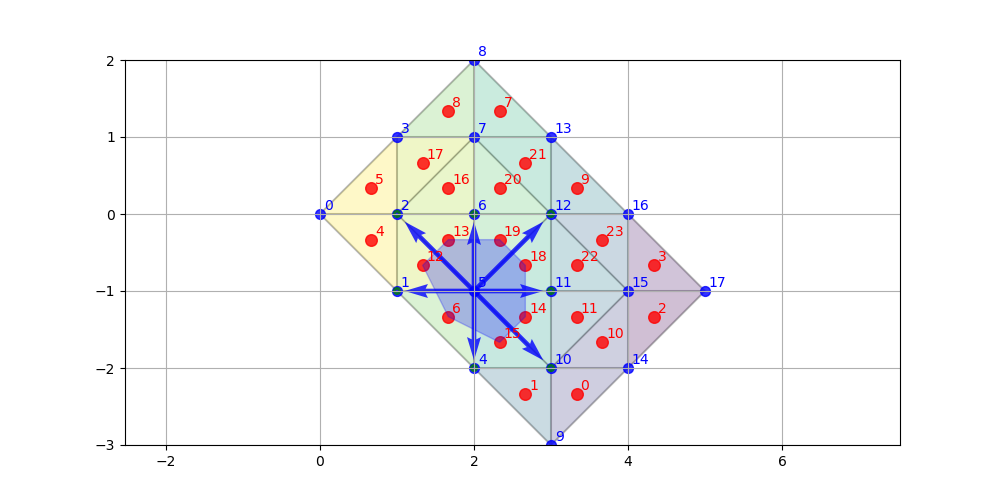

In [2300]:
def get_voronoi_cells():
    line_edge_assignment_lookup = {}
    for i, p in enumerate(triangulation.points):
        line_edge_assignment_lookup[i] = get_line_edges_for_cell(i)
    
    all_edges = reduce(lambda a,b: a.union(b), line_edge_assignment_lookup.values() )
    
    unbounded_edges = set()
    for l in line_edge_assignment_lookup.values():
        for edge in l:
            if is_unbounded_node(edge[0]) or is_unbounded_node(edge[1]):
                unbounded_edges.add(edge)
    
    bounded_edges = all_edges.difference(inf_edges)
    
    new_cells = {}
    for i, (label, line_edges) in enumerate( line_edge_assignment_lookup.items() ):
        es = list(line_edges)
        surrounding_nodes = list( set( reduce(
            lambda a,b: a+b, 
            [list(x) for x in es]
        ) ) )
        # surrounding_nodes = [i for i in surrounding_nodes if not is_unbounded_node(i)]
        surrounding_nodes_coords = lmap(lambda x: new_voronoi_vertices[x], surrounding_nodes)
        if len(surrounding_nodes) <= 1:
            print(f"Cell {i} has only 1 surrounding node. Skipping.")
            continue
        ch = ConvexHull(surrounding_nodes_coords)
        this_poly = sPolygon( ch.points[ ch.vertices ] )
        new_cells[i] = this_poly
    
    line_segment_obj_lookup = {}
    for e in all_edges:
        P = LineSegment( 
            new_voronoi_vertices[e[0]], new_voronoi_vertices[e[1]], label=e,
            is_unbounded = is_unbounded_edge(e)
        )
        line_segment_obj_lookup[e] = P

    # this_IAS = IASTriangulation( line_segment_obj_lookup, voronoi_vertex_coord_lookup, triangulation )

    this_IAS = IASTriangulation(line_segment_obj_lookup, voronoi_vertex_coord_lookup, triangulation)
    
    for i, (label, line_edges) in enumerate( line_edge_assignment_lookup.items() ):
        cell = DualCell(
            line_edges, 
            this_IAS,
            label
        )
        this_IAS.voronoi_cells[i] = cell
    return(this_IAS)
    


this_IAS = get_voronoi_cells()

init_plot_2d_strict()
ax.set_xlim(0, 5)
ax.set_ylim(-3, 2)
ax.axis('equal')


this_IAS.plot_background(rescale=True)
this_IAS.plot_polygon(5)
# voronoi_cells[5].plot_fan(triangulation, G) 
this_IAS.plot_star(5)

plt.show()
# for v in voronoi_cells.values():
    # v.plot_fan(triangulation, G, rescale=False) 


In [2301]:
from IPython.display import display, HTML


this_IAS.toric_summary() 



0
8
9
17
0
8
9
17


┌────┬────────────────────────────────────────────────────┬───────────┬─────────┬───────────┬───────────────────────────────────────────────────────────────┬───────┬──────────────────────────────────┬────────────────────────────────┬────────┐
│ Id | Iso                                                | Complete? | Smooth? | Orbifold? | $K$                                                           | $K^2$ | $\mathrm{dim} X^{\mathrm{sing}}$ | $\mathrm{dim} \mathrm{Aut}(X)$ | $\chi$ |
├────┼────────────────────────────────────────────────────┼───────────┼─────────┼───────────┼───────────────────────────────────────────────────────────────┼───────┼──────────────────────────────────┼────────────────────────────────┼────────┤
│ 0  | $???$                                              |           | ✔       | ✔         | $\left[ 0 \right]$                                            | ?     | ✘                                | ?                              | 0      |
├────┼────────────────────────────────────────────────────┼───────────┼─────────┼───────────┼───────────────────────────────────────────────────────────────┼───────┼──────────────────────────────────┼────────────────────────────────┼────────┤
│ 1  | $\mathrm{Bl}_3 \mathbb{P}^2$                       | ✔         | ✔       | ✔         | $\left[ -2 z_{2} - z_{3} - z_{4} - 2 z_{5} \right]$           | 6     | ✘                                | 2                              | 6      |
├────┼────────────────────────────────────────────────────┼───────────┼─────────┼───────────┼───────────────────────────────────────────────────────────────┼───────┼──────────────────────────────────┼────────────────────────────────┼────────┤
│ 2  | $\mathrm{Bl}_2 (\mathbb{P}^1 \times \mathbb{P}^1)$ | ✔         | ✔       | ✔         | $\left[ -2 z_{2} - z_{3} - 2 z_{4} - 3 z_{5} \right]$         | 6     | ✘                                | 3                              | 6      |
├────┼────────────────────────────────────────────────────┼───────────┼─────────┼───────────┼───────────────────────────────────────────────────────────────┼───────┼──────────────────────────────────┼────────────────────────────────┼────────┤
│ 3  | $\mathrm{Bl}_3 \mathbb{P}^2$                       | ✔         | ✔       | ✔         | $\left[ -2 z_{2} + z_{3} - 3 z_{4} - 2 z_{5} \right]$         | 6     | ✘                                | 2                              | 6      |
├────┼────────────────────────────────────────────────────┼───────────┼─────────┼───────────┼───────────────────────────────────────────────────────────────┼───────┼──────────────────────────────────┼────────────────────────────────┼────────┤
│ 4  | $\mathrm{Bl}_3 \mathbb{P}^2$                       | ✔         | ✔       | ✔         | $\left[ -2 z_{2} - z_{3} - z_{4} - 2 z_{5} \right]$           | 6     | ✘                                | 2                              | 6      |
├────┼────────────────────────────────────────────────────┼───────────┼─────────┼───────────┼───────────────────────────────────────────────────────────────┼───────┼──────────────────────────────────┼────────────────────────────────┼────────┤
│ 5  | $\mathrm{Bl}_3 (\mathbb{P}^1 \times \mathbb{P}^1)$ | ✔         | ✔       | ✔         | $\left[ -z_{2} - 2 z_{3} - z_{4} - 2 z_{5} - 3 z_{6} \right]$ | 5     | ✘                                | 2                              | 7      |
├────┼────────────────────────────────────────────────────┼───────────┼─────────┼───────────┼───────────────────────────────────────────────────────────────┼───────┼──────────────────────────────────┼────────────────────────────────┼────────┤
│ 6  | $\mathbb{P}^1 \times \mathbb{P}^1$                 | ✔         | ✔       | ✔         | $\left[ -2 z_{2} - 2 z_{3} \right]$                           | 8     | ✘                                | 6                              | 4      |
├────┼────────────────────────────────────────────────────┼───────────┼─────────┼───────────┼───────────────────

In [2165]:
X = this_IAS.toric_variety(2, plot=False)
HH_X = X.cohomology_ring()
K_X = HH_X( X.K() )
rows =         rows = ["Id", "Complete?", "Smooth?", "Quotient singularities?", "K", "K^2", "dim X^sing", "dim Aut(X)", "chi"]

rows.append([
    f"Cell {i} = {this_IAS.toric_ids[2]}",
    X.is_complete(),
    X.is_smooth(),
    X.is_orbifold(),
    K_X,
    X.integrate( K_X^2 ) if X.is_complete() else "Non-compact",
    X.dimension_singularities(),
    X.Aut_dimension(),
    X.chi()
])

Isomorphic to Bl3_P2.
Smooth: True
Only quotient singularities: True
K = [-2*z2 - z3 - z4 - 2*z5]
K^2 = 6
Dimension of X^sing: -1
Dimension of Aut(X): 2
Euler characteristic: 6
Isomorphic to Bl2_P1xP1.
Smooth: True
Only quotient singularities: True
K = [-2*z2 - z3 - 2*z4 - 3*z5]
K^2 = 6
Dimension of X^sing: -1
Dimension of Aut(X): 3
Euler characteristic: 6
Isomorphic to Bl3_P2.
Smooth: True
Only quotient singularities: True
K = [-2*z2 + z3 - 3*z4 - 2*z5]
K^2 = 6
Dimension of X^sing: -1
Dimension of Aut(X): 2
Euler characteristic: 6
Isomorphic to Bl3_P2.
Smooth: True
Only quotient singularities: True
K = [-2*z2 - z3 - z4 - 2*z5]
K^2 = 6
Dimension of X^sing: -1
Dimension of Aut(X): 2
Euler characteristic: 6
Isomorphic to P1xP1.
Smooth: True
Only quotient singularities: True
K = [-2*z2 - 2*z3]
K^2 = 8
Dimension of X^sing: -1
Dimension of Aut(X): 6
Euler characteristic: 4
Isomorphic to Bl2_P1xP1.
Smooth: True
Only quotient singularities: True
K = [-2*z2 - z3 - 2*z4 - 3*z5]
K^2 = 6
Dimensio

[2-d toric variety covered by 6 affine patches,
 2-d toric variety covered by 6 affine patches,
 2-d toric variety covered by 6 affine patches,
 2-d toric variety covered by 6 affine patches,
 2-d toric variety covered by 4 affine patches,
 2-d toric variety covered by 6 affine patches]

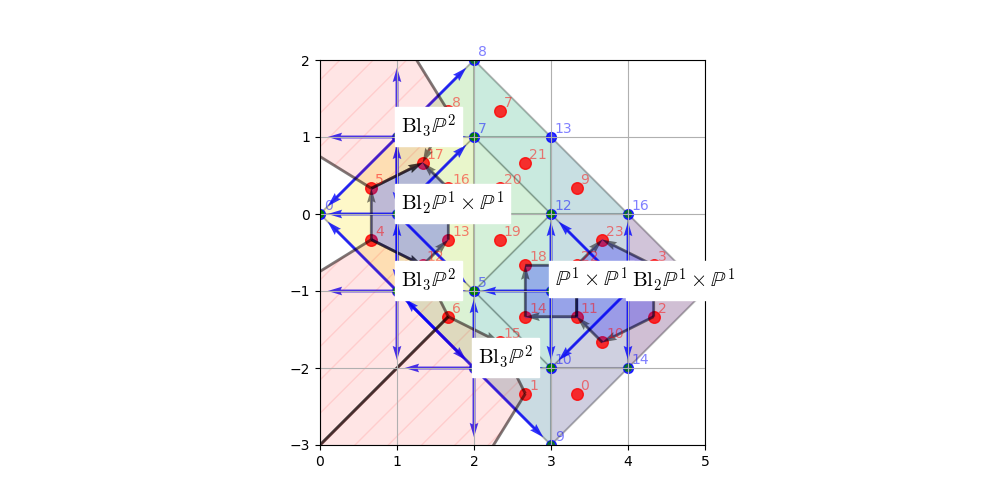

In [2088]:
plt.rcParams['figure.figsize'] = [10, 5]
init_plot_2d_strict()
this_IAS.plot_background(rescale=True)
this_IAS.toric_variety([1,2,3,4,11,15])

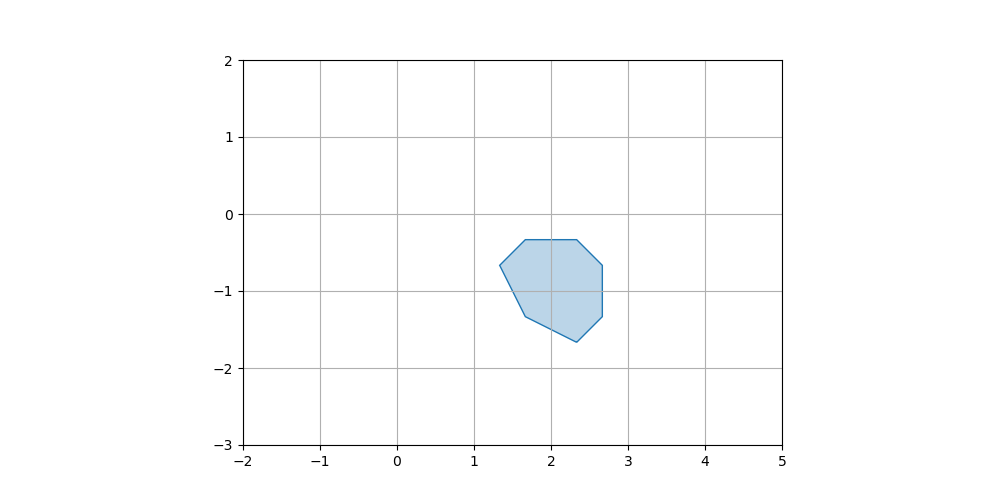

In [2230]:
init_plot_2d_strict()
this_IAS.voronoi_cells[5].polygonal_cell.plot_2d_strict()

In [577]:


known_toric_varieties = {}

P2 = ToricVariety(
    Fan2d([ (1,0), (0,1), (-1,-1) ]), 
    coordinate_names = ["r0", "r1", "r2"]
)
Bl1_P2 = blowup(P2, 2)
Bl2_P2 = blowup(Bl1_P2, 1)
Bl3_P2 = blowup(Bl2_P2, 0)
known_toric_varieties.update({
    "P2": P2,
    "Bl1_P2": Bl1_P2,
    "Bl2_P2": Bl2_P2,
    "Bl3_P2": Bl3_P2
})

P1xP1 = ToricVariety(
    Fan2d([ (1,0), (0,1), (-1,0), (0,-1) ]), 
    coordinate_names = ["r0", "r1", "r2", "r3"]
)
Bl1_P1xP1 = blowup(P1xP1, 3)
Bl2_P1xP1 = blowup(Bl1_P1xP1, 2)
Bl3_P1xP1 = blowup(Bl2_P1xP1, 1)
Bl4_P1xP1 = blowup(Bl3_P1xP1, 0)
known_toric_varieties.update({
    "P1xP1": P1xP1,
    "Bl1_P1xP1": Bl1_P1xP1,
    "Bl2_P1xP1": Bl2_P1xP1,
    "Bl3_P1xP1": Bl3_P1xP1,
    "Bl4_P1xP1": Bl4_P1xP1
})

def Fn(n):
    return ToricVariety( 
        Fan2d([ (0,-1), (1,0), (0,1), (-n, 1) ]),
        coordinate_names = ["r0", "r1", "r2", "r3"]
    )

for i in [1..10]:
    exec(f"F{i} = Fn({i})")
    exec(f"Bl1_F{i} = blowup(F{i}, 3)")
    exec(f"Bl2_F{i} = blowup(Bl1_F{i}, 2)")
    exec(f"Bl3_F{i} = blowup(Bl2_F{i}, 1)")
    exec(f"Bl4_F{i} = blowup(Bl3_F{i}, 0)")
    exec(f"""
known_toric_varieties.update({{
    "F{i}": F{i},
    "Bl1_F{i}": Bl1_F{i},
    "Bl2_F{i}": Bl2_F{i},
    "Bl3_F{i}": Bl3_F{i},
    "Bl4_F{i}": Bl4_F{i}
}})
    """)

known_toric_varieties.update({
    "dP6": toric_varieties.dP6(),
    "dP7": toric_varieties.dP7(),
    "dP8": toric_varieties.dP8()
})

def identify_toric_variety(X):
    for _, (name, variety) in enumerate( known_toric_varieties.items()):
        if variety.fan().is_isomorphic( X.fan() ):
            return name
    return "Unknown"

In dot2pgfconv init


In [578]:
X = v5.toric_variety(triangulation, G)
X.plot()



identify_toric_variety(X)

AttributeError: 'sage.modules.vector_integer_dense.Vector_integer_dense' object has no attribute 'toric_variety'

In [579]:
X.is_smooth()

NameError: name 'X' is not defined

In [1218]:


def get_all_endpoints_ind(v_cell):
    return list(set(np.array( [list(l) for l in c] ).flatten()))

def get_all_endpoints_coord(v_cell):
    return reduce(lambda a,b: list(a)+list(b), 
            lmap(lambda x: np.array(x).T, lmap(lambda x: segments[x].xy, c))
        )

def get_internal_vertices(v_cell):
    endpoints = get_all_endpoints_ind(v_cell)
    

def get_approx_uniq_pts( arr ):
    new_arr = []
    for i, x in enumerate(arr):
        is_new = True
        for j, y in enumerate(new_arr):
            if (vector(x) - vector(y)).norm() < 1/100:
                is_new = False
                break

        if is_new: new_arr.append(x)
    return new_arr



<Figure size 640x480 with 0 Axes>

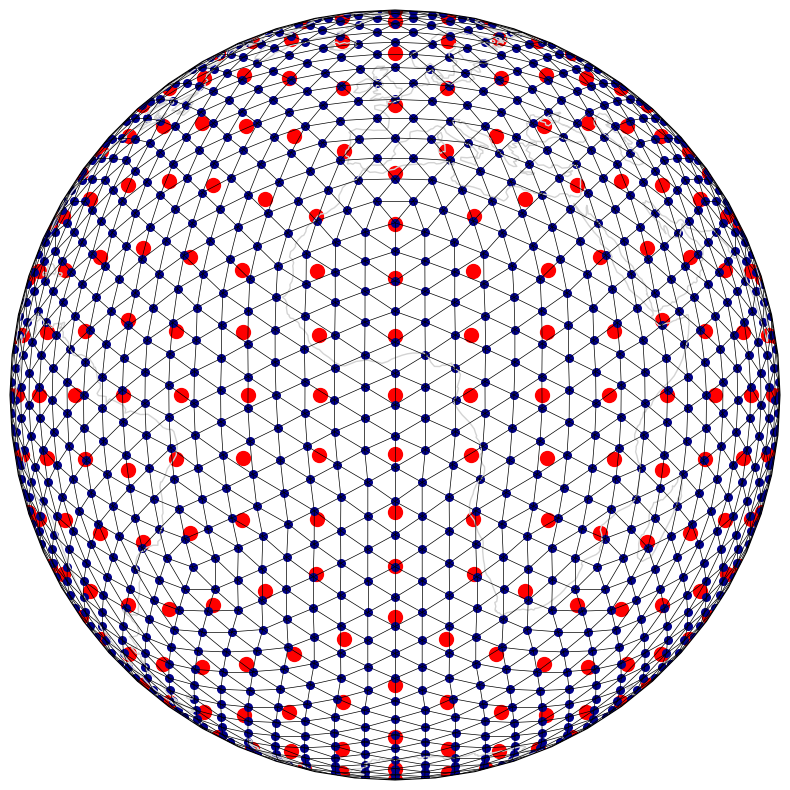

In [216]:
plt.clf()

cmesh = stripy.spherical_meshes.triangulated_cube_mesh(refinement_levels=3)
fmesh = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=3, include_face_points=True)



%matplotlib inline



def mesh_fig(mesh, meshR, name):

    fig = plt.figure(figsize=(10, 10), facecolor="none")
    ax  = plt.subplot(111, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=0.0, globe=None))
    ax.coastlines(color="lightgrey")
    ax.set_global()

    generator = mesh
    refined   = meshR

    lons0 = np.degrees(generator.lons)
    lats0 = np.degrees(generator.lats)

    lonsR = np.degrees(refined.lons)
    latsR = np.degrees(refined.lats)

    lst = generator.lst
    lptr = generator.lptr


    ax.scatter(lons0, lats0, color="Red",
                marker="o", s=100.0, transform=ccrs.PlateCarree())

    ax.scatter(lonsR, latsR, color="DarkBlue",
                marker="o", s=30.0, transform=ccrs.PlateCarree())

    segs = refined.identify_segments()

    for s1, s2 in segs:
        ax.plot( [lonsR[s1], lonsR[s2]],
                 [latsR[s1], latsR[s2]], 
                 linewidth=0.5, color="black", transform=ccrs.Geodetic())

    # fig.savefig(name, dpi=250, transparent=True)
    
    return

mesh_fig(cmesh,  fmesh, "Two grids" )




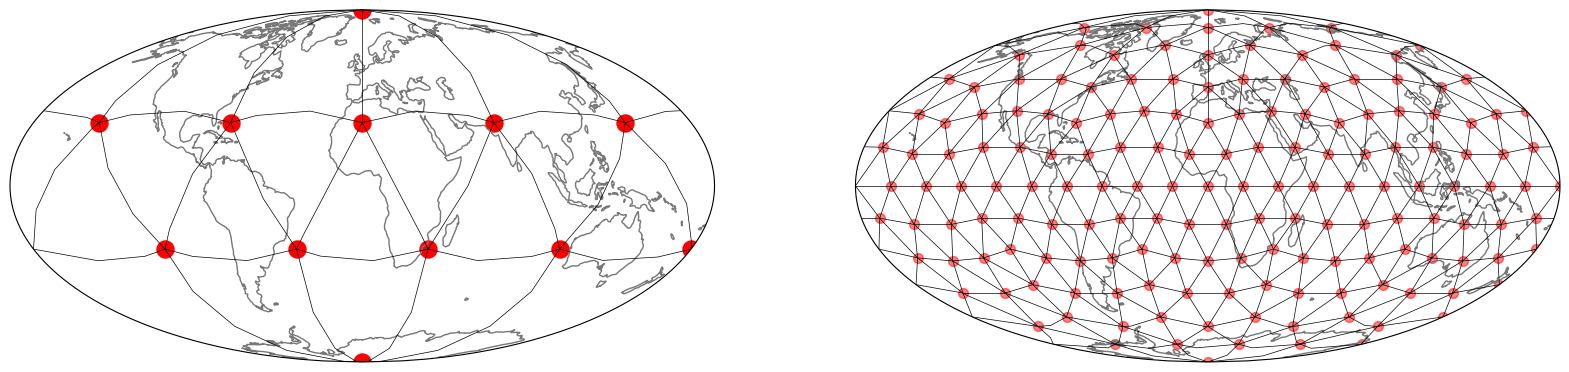

In [1]:
%matplotlib inline

# import gdal
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import stripy

vertices_LatLonDeg = np.array(
                               [[ 90,         0.0 ],
                                [ 26.57,      0.0 ],
                                [-26.57,     36.0 ],
                                [ 26.57,     72.0 ],
                                [-26.57,    108.0 ],
                                [ 26.57,    144.0 ],
                                [-26.57,    180.0 ],
                                [ 26.57,    360.0-72.0 ],
                                [-26.57,    360.0-36.0 ],
                                [ 26.57,    360.0-144.0 ],
                                [-26.57,    360.0-108.0 ],
                                [-90,         0.0 ]])


vertices_lat = np.radians(vertices_LatLonDeg.T[0])
vertices_lon = np.radians(vertices_LatLonDeg.T[1])

spherical_triangulation = stripy.sTriangulation(lons=vertices_lon, lats=vertices_lat)


refined_spherical_triangulation = stripy.sTriangulation(lons=vertices_lon, lats=vertices_lat, refinement_levels=2)



fig = plt.figure(figsize=(20, 10), facecolor="none")
    
ax  = plt.subplot(121, projection=ccrs.Mollweide(central_longitude=0.0, globe=None))
ax.coastlines(color="#777777")
ax.set_global()

ax2 = plt.subplot(122, projection=ccrs.Mollweide(central_longitude=0.0,  globe=None))
ax2.coastlines(color="#777777")
ax2.set_global()

## Plot the vertices and the edges for the original isocahedron

lons = np.degrees(spherical_triangulation.lons)
lats = np.degrees(spherical_triangulation.lats)

ax.scatter(lons, lats, color="Red",
                 marker="o", s=150.0, transform=ccrs.PlateCarree())

segs = spherical_triangulation.identify_segments()

for s1, s2 in segs:
    ax.plot( [lons[s1], lons[s2]],
             [lats[s1], lats[s2]], 
              linewidth=0.5, color="black", transform=ccrs.Geodetic())


## Plot the vertices and the edges for the refined isocahedron

lons = np.degrees(refined_spherical_triangulation.lons)
lats = np.degrees(refined_spherical_triangulation.lats)

ax2.scatter(lons, lats, color="Red", alpha=0.5,
                 marker="o", s=50.0, transform=ccrs.PlateCarree())


segs = refined_spherical_triangulation.identify_segments()

for s1, s2 in segs:
    ax2.plot( [lons[s1], lons[s2]],
              [lats[s1], lats[s2]], 
              linewidth=0.5, color="black", transform=ccrs.Geodetic())



/home/dzack/gitclones/sage/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)


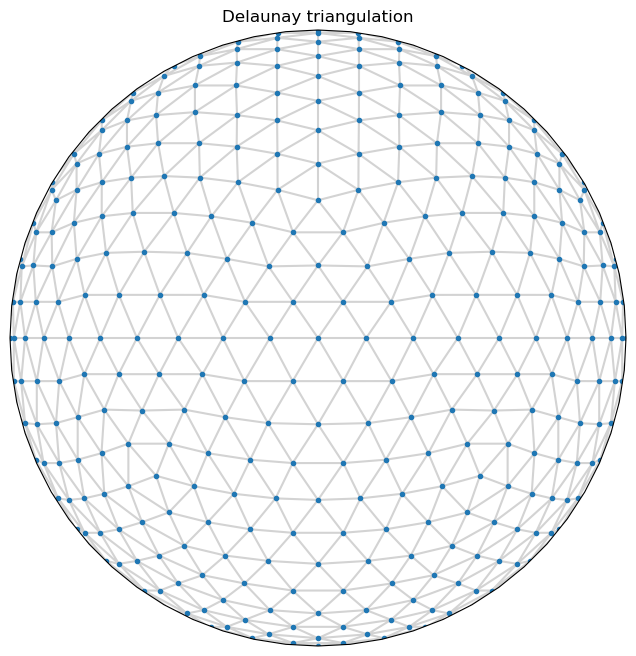

/home/dzack/gitclones/sage/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/shapely/creation.py:218: RuntimeWarning: invalid value encountered in linestrings
  return lib.linestrings(coords, np.intc(handle_nan), out=out, **kwargs)


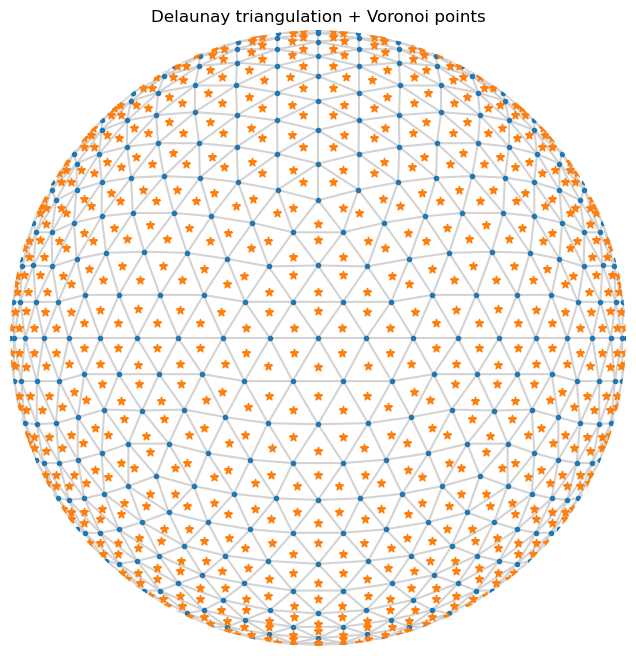

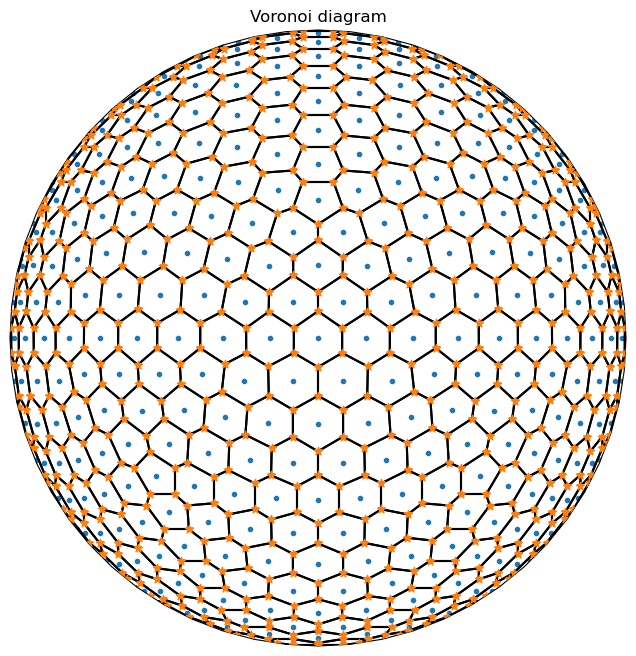

In [15]:
mesh = stripy.spherical_meshes.icosahedral_mesh(refinement_levels=3)

proj_map = ccrs.Orthographic()
proj_flat = ccrs.PlateCarree()


lons = np.degrees(mesh.lons)
lats = np.degrees(mesh.lats)


fig = plt.figure(figsize=(10, 8), facecolor="none")
ax = fig.add_subplot(111, projection=proj_map, title="Delaunay triangulation")

ax.triplot(lons, lats, mesh.simplices, c='LightGrey', zorder=1, transform=proj_flat)
ax.scatter(lons, lats, c='C0', marker='.', zorder=2, transform=proj_flat)

plt.show()

vor_lons, vor_lats = mesh.voronoi_points()
vlons = np.degrees(vor_lons)
vlats = np.degrees(vor_lats)


fig = plt.figure(figsize=(10, 8), facecolor="none")
ax = fig.add_subplot(111, projection=proj_map, title="Delaunay triangulation + Voronoi points")

ax.axis('off')
ax.triplot(lons, lats, mesh.simplices, c='LightGrey', zorder=1, transform=proj_flat)
ax.scatter(lons, lats, c='C0', marker='.', zorder=2, transform=proj_flat)
ax.scatter(vlons, vlats, c='C1', marker='*', zorder=3, transform=proj_flat)

plt.show()

neighbours = mesh.neighbour_simplices()

circumcentres = np.column_stack([vlons, vlats])
voronoi_edges = circumcentres[neighbours]
voronoi_edges[neighbours == -1] = np.nan # remove edges at infinity


lines = []
lines.extend(zip(circumcentres, voronoi_edges[:,0,:]))
lines.extend(zip(circumcentres, voronoi_edges[:,1,:]))
lines.extend(zip(circumcentres, voronoi_edges[:,2,:]))

from matplotlib.collections import LineCollection

linesC = LineCollection(lines, edgecolor='k', transform=proj_flat)

fig = plt.figure(figsize=(10, 8), facecolor="none")
ax = fig.add_subplot(111, projection=proj_map, title='Voronoi diagram')

ax.scatter(lons, lats, c='C0', marker='.', zorder=2, transform=proj_flat)
ax.scatter(vlons, vlats, c='C1', marker='*', zorder=3, transform=proj_flat)
ax.add_collection(linesC)

plt.show()

vor_lons, vor_lats, regions = mesh.voronoi_points_and_regions()

linesC = LineCollection(lines, edgecolor='k', transform=proj_flat)

fig = plt.figure(figsize=(10, 8), facecolor="none")
ax = fig.add_subplot(111, projection=proj_map, title='Voronoi diagram')

ax.scatter(lons, lats, c='C0', marker='.', zorder=2, transform=proj_flat)
ax.scatter(vlons, vlats, c='C1', marker='*', zorder=3, transform=proj_flat)
ax.add_collection(linesC)

# highlight specific region
r = 1
region = regions[r]

# iterate through region and connect up the points
for i in range(len(region)):
    i0 = region[i - 1]
    i1 = region[i]

    ilon = [vlons[i0], vlons[i1]]
    ilat = [vlats[i0], vlats[i1]]
    ax.plot(ilon, ilat, c='r', linewidth=5, transform=proj_flat)


plt.show()


In [35]:
pts = np.random.rand(100, 3)
pts /= np.sqrt((pts ** 2).sum(-1))[..., np.newaxis]

def to_spherical(p):
    x = p[0]
    y=p[1]
    z=p[2]
    r = float(sqrt(x * x + y * y + z * z))
    theta = float(acos(z / r))  # to degrees
    phi = float(atan2(y, x))
    return r, theta, phi


vertices_spherical = np.apply_along_axis(to_spherical, 1, pts)

In [ ]:
?stripy.sTriangulation


vertices_lon = np.radians(vertices_spherical.T[0])
vertices_lat = np.radians(vertices_spherical.T[1])

spherical_triangulation = stripy.sTriangulation(lons=vertices_lon, lats=vertices_lat, permute=True)

# Build the graph
graph: List[Node] = []
for i in range(spherical_triangulation.npoints):
    node = Node(name=f'{vertices_spherical.T[0][i]}, {vertices_spherical.T[1][i]}',
                lon=spherical_triangulation.lons[i],
                lat=spherical_triangulation.lats[i])
    graph.append(node)

segs = spherical_triangulation.identify_segments()

for s1, s2 in segs:
    graph[s1].add_neighbor(graph[s2])

return graph


In [1]:


# Create a sphere
r = 0.3
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]

x = r * sin(phi) * cos(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(phi)

mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(400, 300))
mlab.clf()
# Represent spherical harmonics on the surface of the sphere
for n in range(1, 6):
    for m in range(n):
        s = sph_harm(m, n, theta, phi).real

        mlab.mesh(x - m, y - n, z, scalars=s, colormap='jet')

        s[s < 0] *= 0.97

        s /= s.max()
        mlab.mesh(s * x - m, s * y - n, s * z + 1.3,
                  scalars=s, colormap='Spectral')

mlab.view(90, 70, 6.2, (-1.3, -2.9, 0.25))
mlab.show()


ModuleNotFoundError: No module named 'mayavi'

In [8]:



colors = vtkNamedColors()
# Set the background color.
bkg = map(lambda x: x / 255.0, [26, 51, 102, 255])
# colors.SetColor("BackgroundColor", 26, 51, 102, 255)

# This creates a polygonal cylinder model with eight circumferential
# facets.
cylinder = vtkCylinderSource()
cylinder.SetResolution(8)

# The mapper is responsible for pushing the geometry into the graphics
# library. It may also do color mapping, if scalars or other
# attributes are defined.
cylinderMapper = vtkPolyDataMapper()
cylinderMapper.SetInputConnection(cylinder.GetOutputPort())

# The actor is a grouping mechanism: besides the geometry (mapper), it
# also has a property, transformation matrix, and/or texture map.
# Here we set its color and rotate it -22.5 degrees.
cylinderActor = vtkActor()
cylinderActor.SetMapper(cylinderMapper)
cylinderActor.GetProperty().SetColor(colors.GetColor3d("Tomato"))
cylinderActor.RotateX(30.0)
cylinderActor.RotateY(-45.0)

# Create the graphics structure. The renderer renders into the render
# window. The render window interactor captures mouse events and will
# perform appropriate camera or actor manipulation depending on the
# nature of the events.
ren = vtkRenderer()
renWin = vtkRenderWindow()
renWin.AddRenderer(ren)
iren = vtkRenderWindowInteractor()
iren.SetRenderWindow(renWin)

# Add the actors to the renderer, set the background and size
ren.AddActor(cylinderActor)
# ren.SetBackground(colors.GetColor3d("BackgroundColor"))
renWin.SetSize(300, 300)
renWin.SetWindowName('CylinderExample')

# This allows the interactor to initalize itself. It has to be
# called before an event loop.
iren.Initialize()

# We'll zoom in a little by accessing the camera and invoking a "Zoom"
# method on it.
ren.ResetCamera()
ren.GetActiveCamera().Zoom(1.5)
renWin.Render()

# Start the event loop.
iren.Start()



In [9]:
iren.GetRenderWindow().Finalize()  # equivalent: renWin.Finalize()
iren.TerminateApp()
del renWin, iren


In [18]:
!jupyter labextension enable init_cell

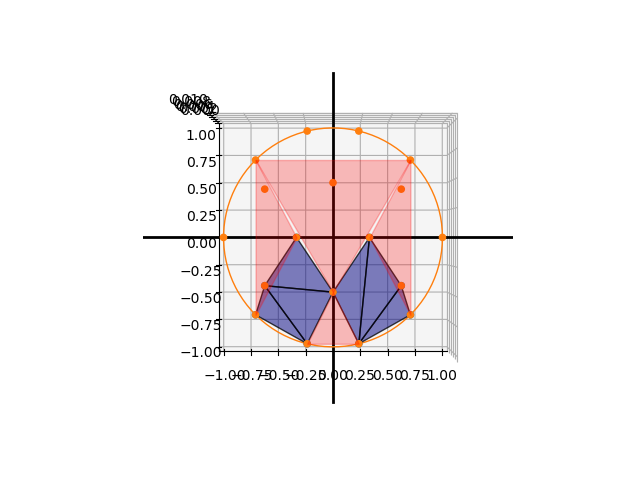

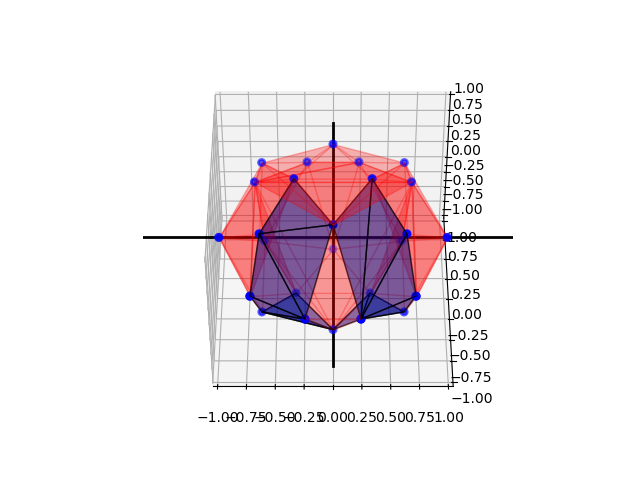

In [83]:

plt.clf()
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
# ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)
ax.view_init(45, -90, 0)

all_int_pts_X = new_rot_all_int_pts[:,0] 
all_int_pts_Y = new_rot_all_int_pts[:,1] 
all_int_pts_Z = np.sqrt( np.clip(1 - all_int_pts_X**2 - all_int_pts_Y**2, 0, 1) )
all_int_pts_XYZ = np.array( list(zip( all_int_pts_X, all_int_pts_Y, all_int_pts_Z )) )
ax.scatter(all_int_pts_X, all_int_pts_Y, all_int_pts_Z, lw=2, color="blue")
ax.scatter(all_int_pts_X, all_int_pts_Y, -1* all_int_pts_Z, lw=2, color="blue")

fund_region_valid_simplices_X = new_int_pts[:,0]
fund_region_valid_simplices_Y = new_int_pts[:,1]
fund_region_valid_simplices_Z = np.sqrt( np.clip(1 - fund_region_valid_simplices_X**2 - fund_region_valid_simplices_Y**2, 0, 1) )
fund_region_valid_simplices_XYZ = np.array( list(zip( 
    fund_region_valid_simplices_X,
    fund_region_valid_simplices_Y,
    fund_region_valid_simplices_Z
)))

ax.plot_trisurf(
    fund_region_valid_simplices_X,
    fund_region_valid_simplices_Y,
    fund_region_valid_simplices_Z,
    triangles=fund_region_valid_simplices, 
    ec=(0,0,0,0.75), fc=(0,0,0.5,0.5)
    )

ax.plot_trisurf(
    fund_region_valid_simplices_X,
    fund_region_valid_simplices_Y,
    -1 * fund_region_valid_simplices_Z,
    triangles=fund_region_valid_simplices, 
    ec=(0,0,0,0.75), fc=(0,0,0.5,0.5)
    )

for t in new_triangle_int_verts:
    X = t[:,0]
    Y = t[:,1]
    Z = np.sqrt( np.clip(1 - X**2 - Y**2, 0, 1) )
    t_xyz = np.array(list(zip(X,Y,Z)))
    t_m_xyz = np.array(list(zip(X,Y,-1*Z)))
    if len(t_xyz) == 3:
        ax.add_collection3d(Poly3DCollection([t_xyz], alpha=0.15, color="red", ec="red"))
        ax.add_collection3d(Poly3DCollection([t_m_xyz], alpha=0.15, color="red", ec="red"))
        continue
    hull = ConvexHull( t_xyz )
    for simplex in hull.simplices:
        ax.add_collection3d(Poly3DCollection([t_xyz[simplex]], alpha=0.15, color="red", ec="red"))
        ax.add_collection3d(Poly3DCollection([t_m_xyz[simplex]], alpha=0.15, color="red", ec="red"))


plt.show()

Simplex contains surg1 [-0.23570226 -0.97182532  0.        ]: 
Point 0 in [[-0.23570226 -0.97182532  0.        ]
 [-0.62360956 -0.44095855  0.64549722]
 [-0.70710678 -0.70710678  0.        ]]
Simplex contains surg1 [-0.23570226 -0.97182532  0.        ]: 
Point 2 in [[ 0.         -0.5         0.8660254 ]
 [-0.62360956 -0.44095855  0.64549722]
 [-0.23570226 -0.97182532  0.        ]]


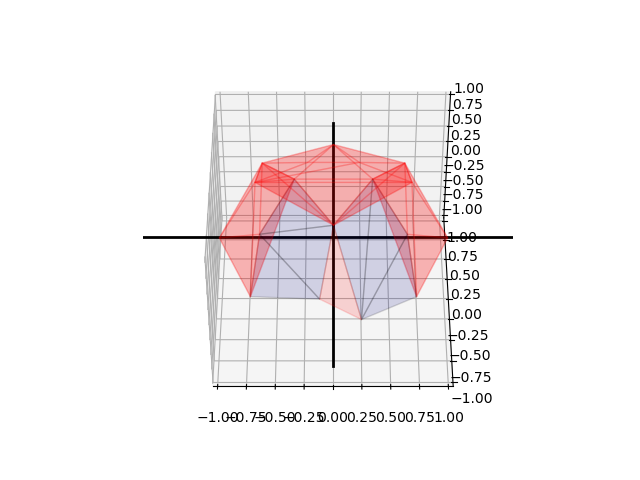

In [84]:
plt.clf()
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
# ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)
ax.view_init(45, -90, 0)

tolerance = 1/100
t0 = new_rot_triangles[0]
t0

surg_1 = t0[0]
surg_2 = t0[1]

new_vertex = (surg_1 + surg_2)/2

three = Set([0,1,2])
new_valid_simplices = []
for simplices in fund_region_valid_simplices:
    simplex = fund_region_valid_simplices_XYZ[simplices]
    contains_surg = False
    for i, pt in enumerate(simplex):
        if np.linalg.norm( surg_1 - pt ) <= tolerance:
            contains_surg = True
            print(f"Simplex contains surg1 {surg_1}: \nPoint {i} in {simplex}") 
            keep_pts = simplex.copy()
            keep_pts[i] = new_vertex
            new_valid_simplices.append(keep_pts)
            break
        elif np.linalg.norm( surg_2 - pt ) <= tolerance:
            contains_surg = True
            print(f"Simplex contains surg2 {surg_2}: \nPoint {i} in {simplex}")
            keep_pts = s_pts.copy()
            keep_pts[i] = new_vertex
            new_valid_simplices.append(keep_pts)
            break
    if not contains_surg:
        new_valid_simplices.append(simplex)
        
for simplex in new_valid_simplices:
    ax.add_collection3d(
        Poly3DCollection([simplex], alpha=0.15, ec=(0,0,0,0.75), fc=(0,0,0.5,0.5) ))

updated_triangle_int_verts = []
for t in new_triangle_int_verts:
    X = t[:,0]
    Y = t[:,1]
    Z = np.sqrt( np.clip(1 - X**2 - Y**2, 0, 1) )
    t_xyz = np.array(list(zip(X,Y,Z)))
    contains_surgery = False
    new_polyhedron = []
    for i, pt in enumerate(t_xyz):
        if np.linalg.norm(pt - surg_1) < tolerance or np.linalg.norm(pt - surg_2) < tolerance:
            contains_surgery = True
        else:
            new_polyhedron.append(pt)
    if contains_surgery:
        new_polyhedron.append(new_vertex)
    new_polyhedron = np.array(new_polyhedron)
    updated_triangle_int_verts.append(new_polyhedron)


for list_pts in updated_triangle_int_verts:
    if len(list_pts) == 3:
        ax.add_collection3d(Poly3DCollection([list_pts], alpha=0.15, color="red", ec="red"))
        continue
    hull = ConvexHull( list_pts )
    for simplex in hull.simplices:
        ax.add_collection3d(Poly3DCollection([list_pts[simplex]], alpha=0.15, color="red", ec="red"))

plt.show()

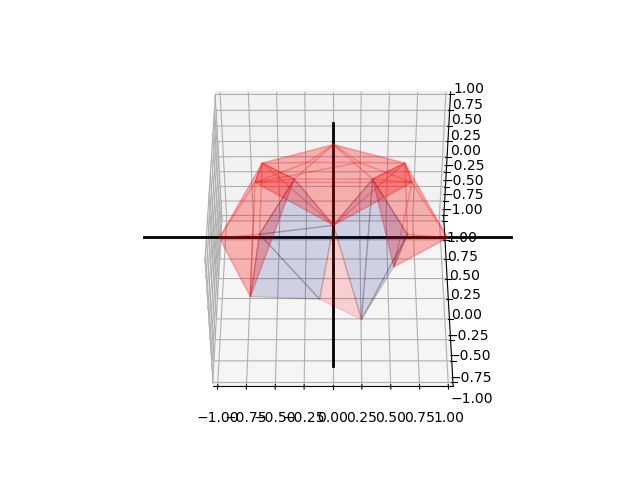

In [85]:
plt.clf()
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
# ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)
ax.view_init(45, -90, 0)

tolerance = 1/100
t1 = new_rot_triangles[1]

surg_1 = t1[0]
surg_2 = t1[1]

new_vertex = (surg_1 + surg_2)/2

new_valid_simplices2 = []
for simplex in new_valid_simplices:
    contains_surg = False
    for i, pt in enumerate(simplex):
        if np.linalg.norm( surg_1 - pt ) <= tolerance or np.linalg.norm(surg_2 - pt) <= tolerance:
            contains_surg = True
            keep_pts = simplex.copy()
            keep_pts[i] = new_vertex
            new_valid_simplices2.append(keep_pts)
            break
    if not contains_surg:
        new_valid_simplices2.append(simplex)
        
for simplex in new_valid_simplices2:
    ax.add_collection3d(
        Poly3DCollection([simplex], alpha=0.15, ec=(0,0,0,0.75), fc=(0,0,0.5,0.5) ))

updated_triangle_int_verts2 = []
for t_xyz in updated_triangle_int_verts:
    contains_surgery = False
    new_polyhedron = []
    for i, pt in enumerate(t_xyz):
        if np.linalg.norm(pt - surg_1) < tolerance or np.linalg.norm(pt - surg_2) < tolerance:
            contains_surgery = True
        else:
            new_polyhedron.append(pt)
    if contains_surgery:
        new_polyhedron.append(new_vertex)
    new_polyhedron = np.array(new_polyhedron)
    updated_triangle_int_verts2.append(new_polyhedron)


for list_pts in updated_triangle_int_verts2:
    if len(list_pts) == 3:
        ax.add_collection3d(Poly3DCollection([list_pts], alpha=0.15, color="red", ec="red"))
        continue
    hull = ConvexHull( list_pts )
    for simplex in hull.simplices:
        ax.add_collection3d(Poly3DCollection([list_pts[simplex]], alpha=0.15, color="red", ec="red"))

plt.show()

[[ 1.00000000e+00  7.85046229e-17  0.00000000e+00]
 [ 6.23609564e-01 -4.40958552e-01  6.45497224e-01]
 [ 3.33333333e-01  0.00000000e+00  9.42809042e-01]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.23609564e-01  4.40958552e-01  6.45497224e-01]
 [ 1.00000000e+00  7.85046229e-17  0.00000000e+00]]
[[ 0.00000000e+00 -5.00000000e-01  8.66025404e-01]
 [-3.33333333e-01  0.00000000e+00  9.42809042e-01]
 [-6.23609564e-01  4.40958552e-01  6.45497224e-01]
 [-7.85046229e-17  1.00000000e+00  0.00000000e+00]
 [ 3.33333333e-01  0.00000000e+00  9.42809042e-01]
 [ 0.00000000e+00  5.00000000e-01  8.66025404e-01]
 [-2.35702260e-01  9.71825316e-01  0.00000000e+00]
 [ 6.23609564e-01  4.40958552e-01  6.45497224e-01]
 [ 2.35702260e-01  9.71825316e-01  0.00000000e+00]
 [ 1.00000000e+00  7.85046229e-17  0.00000000e+00]]
[[-1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-6.23609564e-01 -4.40958552e-01  6.45497224e-01]
 [-1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.33333333e-01  0.00000000

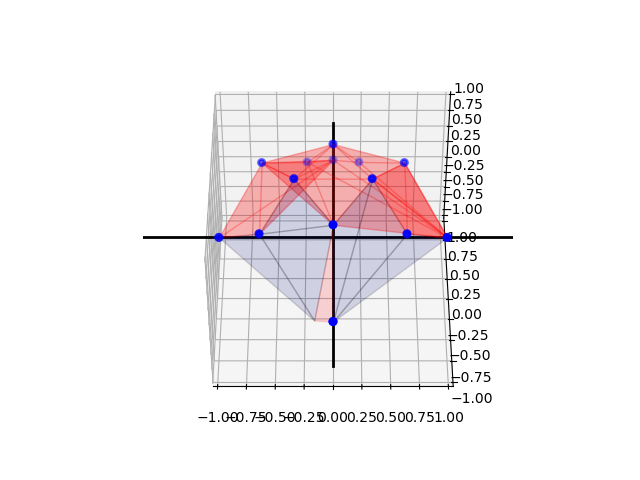

In [104]:
plt.clf()
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
# ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)
ax.view_init(45, -90, 0)

tolerance = 1/100

valid_simplices = new_valid_simplices
cut_polyhedra = updated_triangle_int_verts
integral_points = all_int_pts_XYZ 

for ti in new_rot_triangles:

    surg_1 = ti[0]
    surg_2 = ti[2]
    
    new_vertex = (surg_1 + surg_2)/2
    new_vertex = new_vertex/np.linalg.norm(new_vertex)
    
    new_valid_simplices_temp = []
    for simplex in valid_simplices:
        simplex_temp = []
        for i, pt in enumerate(simplex):
            if np.linalg.norm(surg_1 - pt)  < tolerance or np.linalg.norm(surg_2 - pt) < tolerance:
                simplex_temp.append(new_vertex)
            else:
                simplex_temp.append(pt)
        if len(simplex_temp) > 2:
            simplex_temp = np.array(simplex_temp)
            simplex_temp /= np.sqrt((simplex_temp ** 2).sum(-1))[..., np.newaxis]
            new_valid_simplices_temp.append(simplex_temp)
    valid_simplices = new_valid_simplices_temp.copy()
    
    cut_polyhedra_temp = []
    for t_xyz in cut_polyhedra:
        new_polyhedron = []
        for i, pt in enumerate(t_xyz):
            if np.linalg.norm(pt - surg_1) < tolerance or np.linalg.norm(pt - surg_2) < tolerance:
                new_polyhedron.append(new_vertex)
            else:
                new_polyhedron.append(pt)
        if len(new_polyhedron) > 2:
            new_polyhedron = np.array(new_polyhedron)
            new_polyhedron /= np.sqrt((new_polyhedron ** 2).sum(-1))[..., np.newaxis]
            cut_polyhedra_temp.append(np.array(new_polyhedron))
    cut_polyhedra = cut_polyhedra_temp.copy()

    integral_points_temp = []
    for pt in integral_points:
        if np.linalg.norm(pt - surg_1) < tolerance or np.linalg.norm(pt - surg_2) < tolerance:
            integral_points_temp.append(new_vertex)
        else:
            pt = pt / np.linalg.norm(pt)
            integral_points_temp.append(pt)
    integral_points = list(Set( integral_points_temp.copy() ))


prune_polyhedra = False

if prune_polyhedra:
    temp_integral_points = []
    temp_cut_polyhedra = []
    for list_pts in cut_polyhedra:
        if len(list_pts) == 3: 
            temp_cut_polyhedra.append(list_pts)
            continue
        if len(list_pts) <= 2:
            raise ValueError("Found a bigon")
        hull = ConvexHull( list_pts )
        temp_polyhedron = []
        for simplex in hull.simplices:
            found_edge_to_contract = False
            for pt in simplex:
                pt_in_valid = False
                actually_replaced = False
                for valid_simplex in valid_simplices:
                    for q_pt in valid_simplex:
                        if np.linalg.norm(q_pt - pt) < tolerance:
                            pt_in_valid = True
                            break

                if pt_in_valid:
                    continue
                else:
                    found_edge_to_contract = True
                    
                # Now pt is not on the edge of an IAS piece, so contract p <--> q1
                # where q2 <---> p <---> q1
                q1, q2 = [x for x in simplex if np.linalg.norm(q - pt) < tolerance]
                new_vert = np.array( (pt+q1)/2 )
                for valid_simplex in valid_simplices:
                    for i, x in enumerate(valid_simplex):
                        if np.linalg.norm(x - q1) < tolerance or np.linalg.norm(x-pt) < tolerance:
                            valid_simplex[i] = new_vert
                break
            if not found_edge_to_contract:
                for p in simplex:
                    temp_polyhedron.append(p)
                    temp_integral_points.append(p)
                        
        if len(temp_polyhedron) > 2:
            temp_cut_polyhedra.append(temp_polyhedron)
    
    integral_points = temp_integral_points.copy()
    cut_polyhedra = temp_cut_polyhedra.copy()
            
for list_pts in cut_polyhedra:
    if len(list_pts) == 3:
        ax.add_collection3d(Poly3DCollection([list_pts], alpha=0.15, color="red", ec="red"))
        continue
    print(list_pts)
    hull = ConvexHull( list_pts )
    for simplex in hull.simplices:
        ax.add_collection3d(Poly3DCollection([list_pts[simplex]], alpha=0.15, color="red", ec="red"))


for simplex in valid_simplices:
        ax.add_collection3d(
            Poly3DCollection([simplex], alpha=0.15, ec=(0,0,0,0.75), fc=(0,0,0.5,0.5) ))

integral_points = np.array(integral_points)

ax.scatter(integral_points[:,0], integral_points[:,1], integral_points[:,2], lw=2, color="blue")

plt.show()

In [100]:
list_pts = cut_polyhedra[1]
hull = ConvexHull( list_pts )
temp_polyhedron = []
for simplex in hull.simplices:
    print(simplex)
    for p,q in itertools.combinations( simplex, 2 ):
        print(p, q)

[1 0 2]
1 0
1 2
0 2
[4 0 2]
4 0
4 2
0 2
[4 1 2]
4 1
4 2
1 2
[4 1 0]
4 1
4 0
1 0


In [ ]:
# ax.scatter( 
#     fund_region_integral_pts[:,0], 
#     fund_region_integral_pts[:,1], 
#     [0] * len(fund_region_integral_pts),
#     color="black",
#     linewidth=5
# )

# ax.plot_trisurf(
#     fund_region_integral_pts[:,0], fund_region_integral_pts[:,1], [0]*len(fund_region_integral_pts),
#     triangles=fund_region_tri.simplices, 
#     ec=(0,0,0,0.5), fc=(0,0,0,0.5)
#     )



# ax.plot_trisurf(
#     S1.flatten(), S2.flatten(), S3.flatten(),
#     triangles=tri.simplices, 
#     ec=(0,0,0.5,0.5), fc=(0,0,0,0)
#     )
# ax.plot_trisurf(
#     S1.flatten(), S2.flatten(), -1 * S3.flatten(),
#     triangles=tri.simplices, 
#     ec=(0,0,0.5,0.5), fc=(0,0,0,0)
#     )
# ax.scatter(S1.flatten(), S2.flatten(), S3.flatten(), color="red", alpha=0.45)
# ax.scatter(S1.flatten(), S2.flatten(), -1*S3.flatten(), color="red", alpha=0.45)

#ax.view_init(elev=90, azim=-90, roll=0)

# shift_xs = (xyzs[:,0]/10) * 2 * np.pi - np.pi
# shift_ys = (xyzs[:,1]/10) * np.pi - np.pi/2
# shift_zs = xyzs[:,2]
# shift_xyzs = np.array( [shift_xs, shift_ys, shift_zs] ).T
# # ax.add_collection3d(Poly3DCollection([shift_xyzs], alpha=0.5, color="cyan", ec="black"))

# shift_integral_points_xs = fund_region_integral_pts[:,0]/10 * 2 * np.pi - np.pi
# shift_integral_points_ys = fund_region_integral_pts[:,1]/10 * np.pi - np.pi/2
# shift_integral_points_zs = [0] * len(fund_region_integral_pts)
# ax.scatter( 
#     shift_integral_points_xs,
#     shift_integral_points_ys,
#     shift_integral_points_zs,
#     color="black",
#     linewidth=2
# )

# ax.plot_trisurf(
#     shift_integral_points_xs, shift_integral_points_ys, shift_integral_points_zs,
#     triangles=fund_region_valid_simplices, 
#     ec=(0,0,0,1), fc=(1,0,0,1)
#     )

# # sphere parametrization
# PS1 = np.cos(shift_integral_points_xs) * np.sin(shift_integral_points_ys)
# PS2 = np.sin(shift_integral_points_xs) * np.sin(shift_integral_points_ys)
# PS3 = np.cos(shift_integral_points_ys)
# ax.plot_trisurf(
#     PS1.flatten(), PS2.flatten(), PS3.flatten(),
#     triangles=fund_region_valid_simplices,
#     ec=(0,0,0,1), fc=(0,1,1,0.5),
# )

# ax.scatter(
#     PS1.flatten(),
#     PS2.flatten(),
#     PS3.flatten(),
#     color="black",
#     alpha=0.35,
#     linewidth=2,
#     zorder=10
# )

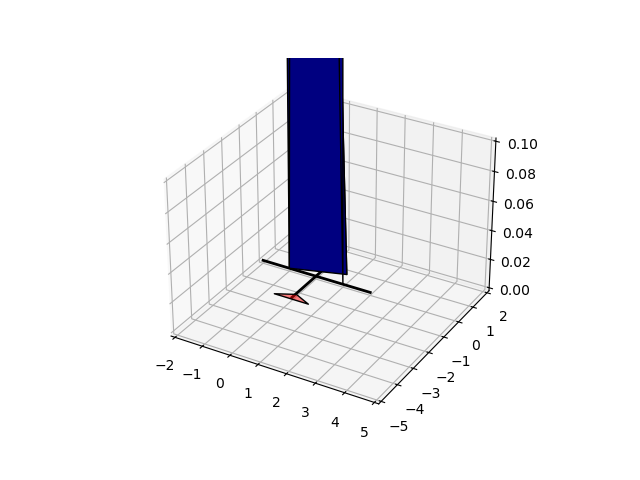

In [102]:
plt.clf()

ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-2, 5)
ax.set_ylim(-5, 2)
ax.set_zlim(0, 0.1)
ax.plot( [0, 0], [-1.5, 1.5], [0, 0], color="black", lw=2)
ax.plot( [-2, 2], [0, 0], [0, 0], color="black", lw=2)
# ax.plot( [0, 0], [0, 0], [0, 1.25], color="black", lw=2)

PS1 = (np.cos(shift_integral_points_xs) * np.sin(shift_integral_points_ys)).flatten()
PS2 = (np.sin(shift_integral_points_xs) * np.sin(shift_integral_points_ys)).flatten()
PS3 = (np.cos(shift_integral_points_ys)).flatten()

for i, t in enumerate(fund_region_valid_simplices):
    ax.plot_trisurf(
        PS1, 
        PS2, 
        PS3,
        triangles=[t], 
        ec=(0,0,0,1), fc=(0,0,0.5,1), 
    )

# ax.plot_trisurf(
#     PS1, PS2, PS3,
#     triangles=fund_region_valid_simplices,
#     ec=(0,0,0,1), fc=(0,1,1,0.1), zorder=0
# )

cut_simplices_verts = np.array([
    (4,0,0), (5,1,0), (6,0,0),
    (10,4,0), (8,6,0), (10,8,0),
    (8,10,0), (5,7,0), (2,10,0),
    (0,5,0), (2,3,0), (0,1,0)
])

cut_simplices = [
    [0,1,2],
    [3,4,5],
    [6,7,8],
    [9,10,11]
]

x1 = cut_simplices_verts[:, 0]/10 * 2 * np.pi - np.pi
y1 = cut_simplices_verts[:, 1]/10 * np.pi - np.pi/2
z1 = cut_simplices_verts[:, 2]

ax.plot_trisurf(
    x1, 
    y1, 
    z1,
    triangles=cut_simplices[0:1], 
    ec=(0,0,0,1), fc=(1,0,0,0.5), 
    )

qS1 = np.cos(x1) * np.sin(y1)
qS2 = np.sin(x1) * np.sin(y1)
qS3 = np.cos(y1)

# ax.plot_trisurf(
#     qS1.flatten(), qS2.flatten(), qS3.flatten(),
#     triangles=cut_simplices[0:1],
#     ec=(0,0,0,1), fc=(1,0,0,1),
# )

# ax.plot_trisurf(
#     shift_integral_points_xs, shift_integral_points_ys, shift_integral_points_zs,
#     triangles=fund_region_valid_simplices, 
#     ec=(0,0,0,1), fc=(1,0,0,0.5), 
#     )
plt.show()

In [87]:
for p in list(zip(x1, y1, z1))[0:3]:
    print(p)

(-0.6283185307179586, -1.5707963267948966, 0)
(0.0, -1.2566370614359172, 0)
(0.6283185307179586, -1.5707963267948966, 0)


In [89]:
for p in list(zip(qS1, qS2, qS3))[0:3]:
    print(p)

cut_simplices[0:1]

(-0.8090169943749475, 0.5877852522924731, 6.123233995736766e-17)
(-0.9510565162951535, -0.0, 0.30901699437494745)
(-0.8090169943749475, -0.5877852522924731, 6.123233995736766e-17)


[[0, 1, 2]]

In [60]:
# domain parametrization
U = np.linspace(-np.pi, np.pi, k)
V = np.linspace(-1/2 * np.pi, 1/2 * np.pi, k)
[X, Y] = np.meshgrid(U, V)

# sphere parametrization
S1 = np.cos(X) * np.sin(Y)
S2 = np.sin(X) * np.sin(Y)
S3 = np.cos(Y)

# triangulate the points in [0,2pi] x [0,pi]
tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)

# ax.triplot(S1.flatten(), S2.flatten(), tri.simplices)
# ax.scatter(S1.flatten(),S2.flatten(), color="red")

array([[ 4,  0,  0],
       [ 5,  1,  0],
       [ 6,  0,  0],
       [10,  4,  0],
       [ 8,  6,  0],
       [10,  8,  0],
       [ 8, 10,  0],
       [ 5,  7,  0],
       [ 2, 10,  0],
       [ 0,  5,  0],
       [ 2,  3,  0],
       [ 0,  1,  0]])

In [ ]:
import numpy as np
from colour import Color
from mayavi import mlab

# t = np.linspace(0, 4 * np.pi, 20)

# x = np.sin(2 * t)
# y = np.cos(t)
# z = np.cos(2 * t)
# s = 2 + np.sin(t)

# mlab.points3d(x, y, z, s, colormap="copper", scale_factor=.25)
# mlab.show()

# U = np.linspace(0, 2 * np.pi, k)
# V = np.linspace(0, np.pi, k)
# [X, Y] = np.meshgrid(U, V)

# t = np.linspace(-2, 3, 10)
# x, y, z = np.meshgrid( t,t,t )
# r = np.sqrt(x ** 2 + y ** 2 + z ** 4)
# u = y * np.sin(r) / (r + 0.001)
# v = -x * np.sin(r) / (r + 0.001)
# w = np.zeros_like(z)
# obj = mlab.quiver3d(x, y, z, u, v, w, line_width=2, scale_factor=1)
# mlab.show()


# pi = np.pi
# cos = np.cos
# sin = np.sin
# dphi, dtheta = pi / 5.0, pi / 5.0
# # [phi, theta] = np.mgrid[0:pi + dphi * 1.5:dphi,
# #                         0:2 * pi + dtheta * 1.5:dtheta]

# [phi, theta] = np.meshgrid( 
#     np.linspace(0, pi + dphi * 1.5, round( (pi + dphi * 1.5)/dphi ) ), 
#     np.linspace(0, 2 * pi + dtheta * 1.5, round( (2 * pi + dtheta * 1.5)/dtheta) ) 
# )
# m0 = 4
# m1 = 3
# m2 = 2
# m3 = 3
# m4 = 6
# m5 = 2
# m6 = 6
# m7 = 4
# r = sin(m0 * phi) ** m1 + cos(m2 * phi) ** m3 + \
#     sin(m4 * theta) ** m5 + cos(m6 * theta) ** m7
# x = r * sin(phi) * cos(theta)
# y = r * cos(phi)
# z = r * sin(phi) * sin(theta)

# m = mlab.mesh(x, y, z, colormap="bone")
mlab.show()

n = 8
t = np.linspace(-np.pi, np.pi, n)
z = np.exp(1j * t)
x = z.real.copy()
y = z.imag.copy()
z = np.zeros_like(x)

triangles = [(0, i, i + 1) for i in range(1, n)]
x = np.r_[0, x]
y = np.r_[0, y]
z = np.r_[1, z]
t = np.r_[0, t]

m = mlab.triangular_mesh(x, y, z, triangles, scalars=t)
mlab.show()


In [ ]:

squar = pv.Polygon(n_sides=4, radius=8, fill=False)
squar = squar.rotate_z(45, inplace=False)
circ0 = pv.Polygon(center=(2, 3, 0), n_sides=30, radius=1)
circ1 = pv.Polygon(center=(-2, -3, 0), n_sides=30, radius=1)
comb = circ0 + circ1 + squar
tess = comb.delaunay_2d(edge_source=comb)
tess.plot(cpos='xy', show_edges=True)


In [ ]:
plot(comb)

In [ ]:
# refl = lambda m: 1/(1+m^2) * Matrix(ZZ, 2, [1-m^2, 2*m, 2*m, m^2-1])

M1 = refl(-1)

g = plot_ias(plot_vecs, surg_vecs)

#g += arrow( (0,0), (5,-1))
#g.show(gridlines=True)
# g = surgery_triangle(g, (1,-1), (2,-1), (2,-2))
# print("----------------")

# g = surgery_triangle(g, (3,-3), (3,-2), (4,-2))
# g = surgery_triangle(g, (4,-2), (4,-1), (5,-1))
# print("----------------")


# g = surgery_triangle(g, (5,-1), (4,-1), (4,0))
# g = surgery_triangle(g, (4,0), (3,0), (3,1))
# g = surgery_triangle(g, (3,1), (2,1), (2,2))
# print("----------------")

# g = surgery_triangle(g, (2,2), (2,1), (1,1))
# g = surgery_triangle(g, (1,1), (1,0), (0,0))
# print("----------------")

g.show(gridlines=True)

In [ ]:
[ 1+vector(z).norm()^2 for z in xy]

In [ ]:
display( del_tri1.simplices )

display( xy1, len(xy1) )

display( [ ( xy1[a], xy1[b], xy1[c]) for a,b,c in del_tri1.simplices ] )

In [ ]:



v_list1 = [ [0,0], [2,0], [2,-1], [1,-1], [1,-2], [0,-2] ]
v_list2  = [ [3,-3], [3,-1], [2,-1], [2,-2], [1,-2], [1,-3] ]
P1 = Polyhedron( v_list1 + v_list2 )
xy1 = np.array( P1.integral_points() )

outline = sPolygon( v_list1 ).union(sPolygon( v_list2 ))

del_tri1 = Delaunay(xy1)

valid_simplices = [ [a,b,c] for a,b,c in del_tri1.simplices if outline.contains( sPolygon( (xy1[a], xy1[b], xy1[c]) ) ) ]

fig, ax = plt.subplots()

g.matplotlib(figure=fig, sub=ax)

for geom in outline.geoms:
    xs, ys = geom.exterior.xy    
    ax.fill(xs, ys, alpha=0.25, fc='cyan', ec='none')

ax.triplot(xy1[:, 0], xy1[:, 1], valid_simplices, 'bo-', lw=1, color="gray")

plt.show()

In [2545]:


v_list1 = [ [0,0], [2,0], [2,-1], [1,-1], [1,-2], [0,-2] ]
v_list2  = [ [3,-3], [3,-1], [2,-1], [2,-2], [1,-2], [1,-3] ]
P1 = Polyhedron( v_list1 + v_list2 )
xy1 = np.array( P1.integral_points() )

# vertex_list = [ [0,0], [2,0], [2,-1], [1,-1], [1,-2], [0,-2] ]
# P = Polyhedron(vertex_list)
# P.integral_points()

# xy = np.array( P.integral_points() )
# x = xy[:, 0]
# y = xy[:, 1]
#triang = tri.Triangulation(x, y)

del_tri = Delaunay(xy)
centers = np.sum(xy[del_tri.simplices], axis=1, dtype='int')/3.0
w=2
h=2
colors = np.array([ 1/ ((2*w+x)*(2*h+y)) for x,y in xy])


#fig1, ax1 = plt.subplots()
#ax1.set_aspect('equal')

fig, ax = plt.subplots()

outline = sPolygon(vertex_list)
# mask = [
#     not outline.contains(sPolygon(zip(x[tri], y[tri])))
#     for tri in triang.get_masked_triangles()
# ]
# triang.set_mask(mask)

#ax.triplot(triang, 'bo-', lw=1, color="green")




outline = sPolygon( v_list1 ).union(sPolygon( v_list2 ))

del_tri1 = Delaunay(xy1)

valid_simplices = [ [a,b,c] for a,b,c in del_tri1.simplices if outline.contains( sPolygon( (xy1[a], xy1[b], xy1[c]) ) ) ]

fig, ax = plt.subplots()

w,h = (2,2)
colors = np.array([ 1/ ((2*w+x)*(2*h+y)) for x,y in xy1])


ax.tripcolor(xy1[:, 0], xy1[:, 1], valid_simplices, colors, edgecolors='black', alpha=0.3, shading="gouraud")

valid_simplices = [ [a,b,c] for a,b,c in del_tri.simplices if outline.contains( sPolygon( (xy[a], xy[b], xy[c]) ) ) ]

ax.tripcolor(x, y, valid_simplices, colors, edgecolors='black', alpha=0.3, shading="gouraud")
#plt.gca().set_aspect('equal')


# x = [1, 2, 3, 4, 5]
# y = [1, 2, 3, 4, 5]
# ax.plot(x, y)
c = circle((1,1),3)
g.matplotlib(figure=fig, sub=ax)
#P.plot().matplotlib(figure=fig,sub=ax)
plt.show()


NameError: name 'xy' is not defined

In [ ]:
[ (a,b,c) for a,b,c in del_tri.simplices if outline.contains( sPolygon( (xy[a], xy[b], xy[c]) ) ) ]

In [ ]:


xy = np.array( P.integral_points() )
x = xy[:, 0]
y = xy[:, 1]
tri = Delaunay(P.integral_points())


centers = np.sum(xy[tri.simplices], axis=1, dtype='int')/3.0

w=2
h=2
colors = np.array([ 1/ ((2*w+x)*(2*h+y)) for x,y in xy])

plt.tripcolor(x, y, tri.simplices.copy(), colors, edgecolors='black', alpha=0.4, shading="gouraud")
plt.gca().set_aspect('equal')
plt.show()


In [ ]:
base_l = (0,0)
apex = (0,1)
base_r = (1,0)
P1 = Polyhedron( [ base_l, apex, base_r ] )
P2 = Polyhedron( [ base_l, (2,2), base_r ] )

#show( P.volume() * 2 )
#show( (vector(base_l) - vector(base_r)).norm() * sqrt(2)/2 )
P1.plot(alpha=0.2) + P2.plot(alpha=0.2, color="blue") + P1.intersection(P2).plot(alpha=0.2, color="red")

P12 = P1.union(P2)

P1 = polygon( [ base_l, apex, base_r ] )
P2 = polygon( [ base_l, (2,2), base_r ] )
P1.un

In [ ]:
vertex_list = [ [0,0], [2,0], [2,-1], [1,-1], [1,-2], [0,-2] ]
P = Polyhedron(vertex_list)
P.integral_points()

points = PointConfiguration(P.integral_points())
#ponts = points.restrict_to_fine_triangulations()
#points.triangulate().plot(axes=True)
[show(x.plot()) for x in points.triangulations() ]

In [ ]:
?np.degrees

/home/dzack/gitclones/sage/local/var/lib/sage/venv-python3.11.1/lib/python3.11/site-packages/traitlets/traitlets.py:1387: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


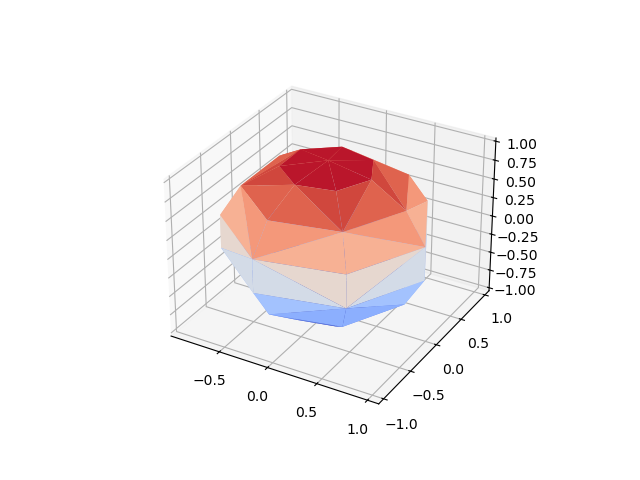

In [210]:


ax = plt.figure().add_subplot(projection='3d')


def triangulateSphere(ax, k=30, cmap=cm.magma):
  
    # domain parametrization
    U = np.linspace(0, 2 * np.pi, k)
    V = np.linspace(0, np.pi, k)
    [X, Y] = np.meshgrid(U, V)

    # sphere parametrization
    S1 = np.cos(X) * np.sin(Y)
    S2 = np.sin(X) * np.sin(Y)
    S3 = np.cos(Y)

    # triangulate the points in [0,2pi] x [0,pi]
    tri = Delaunay(np.array([X.flatten(), Y.flatten()]).T)
    
    # plot the sphere
    ax.plot_trisurf(
        S1.flatten(), S2.flatten(), S3.flatten(),
        triangles=tri.simplices, cmap=sns.color_palette("coolwarm", as_cmap=True)
    )
    
triangulateSphere(ax, 8)
plt.show()

#sns.color_palette()

In [ ]:
def zoom_factory(ax,base_scale = 2.):
    def zoom_fun(event):
        # get the current x and y limits
        cur_xlim = ax.get_xlim()
        cur_ylim = ax.get_ylim()
        cur_xrange = (cur_xlim[1] - cur_xlim[0])*.5
        cur_yrange = (cur_ylim[1] - cur_ylim[0])*.5
        xdata = event.xdata # get event x location
        ydata = event.ydata # get event y location
        if event.button == 'up':
            # deal with zoom in
            scale_factor = 1/base_scale
        elif event.button == 'down':
            # deal with zoom out
            scale_factor = base_scale
        else:
            # deal with something that should never happen
            scale_factor = 1
            print(event.button)
        # set new limits
        ax.set_xlim([xdata - cur_xrange*scale_factor,
                     xdata + cur_xrange*scale_factor])
        ax.set_ylim([ydata - cur_yrange*scale_factor,
                     ydata + cur_yrange*scale_factor])
        plt.draw() # force re-draw
        
    fig = ax.get_figure() # get the figure of interest
    # attach the call back
    fig.canvas.mpl_connect('scroll_event',zoom_fun)

    #return the function
    return zoom_fun
        
